In [337]:
from sklearn.preprocessing import StandardScaler
from pandas.core.frame import DataFrame
from collections import Counter

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [338]:
def data(file):
    X = pd.read_excel(file, sheet_name='Common Data Sheet', skiprows=3, nrows=5, usecols='C:CP')
    X.rename(columns = {X.columns[0]:'id'}, inplace = True)
    X = X.set_index('id')
#     X = X.fillna(0)

    y = pd.read_excel(file, sheet_name='Common Data Sheet', skiprows=13, nrows=47, usecols='C:CP', thousands=',')
    y.rename(columns = {y.columns[0]:'id'}, inplace = True)
    y = y.set_index('id')
#     y = y.fillna(0)
    
    return X, y

In [339]:
file = '../data_v2/DB(R0_H_R1 211012).xlsx'
X, y = data(file)
X

A1     A2     A3     A4     A5     A6     A7     A8     B9    B10  ...  \
id                                                                        ...   
X1  226.0  226.0  226.0  226.0  226.0  224.5  178.0  229.0  285.4  285.4  ...   
X2  219.0  219.0  219.0  215.0  215.0  213.0  170.0  223.0  274.4  274.4  ...   
X3   36.6   36.6   36.6   36.6   36.6   36.0   28.0   36.6   43.4   43.4  ...   
X4   22.2   22.2   22.2   22.2   22.2   22.3   17.7   23.6   26.0   26.0  ...   
X5   11.8   11.8   11.8   11.8   11.8   11.7   10.2   12.2   12.5   12.5  ...   

      F82    F83    F84    F85    F86    F87    F88    F89    F90    F91  
id                                                                        
X1  336.0  333.0  336.0  336.0  336.0  336.0  336.0  336.0  277.0  336.0  
X2  325.0  320.0  330.0  330.0  330.0  330.0  330.0  330.0  264.5  330.0  
X3   60.0   60.0   60.0   60.0   60.0   60.0   60.0   60.0   46.0   60.0  
X4   29.5   30.5   30.5   29.5   30.5   30.5   29.5   29.5   22.9   29.5  
X5   21.6   22.5   22.5   21.6   22.5   22.5   21.6   21.6   14.9   21.7  

[5 rows x 91 columns]

In [340]:
y

A1     A2     A3       A4       A5       A6       A7       A8      B9  \
id                                                                              
Y1    5714   5842   5841   5960.9   5908.3   5845.0   3413.8   5638.0    9198   
Y2    5044   5167   5399   5143.0   5139.0   5255.0   3744.5   6021.0    7900   
Y3    4942   4932   5076   5062.0   5058.8   4635.0   2940.3   5604.0    8795   
Y4    8123   8058   7564   8704.0   8218.0   7729.0   5955.7   9256.0   11672   
Y5       0      0      0      0.0      0.0      0.0      0.0      0.0    3389   
Y6       0      0      0      0.0      0.0      0.0      0.0      0.0       0   
Y7       0      0      0      0.0      0.0      0.0      0.0      0.0       0   
Y8       0      0      0      0.0      0.0      0.0      0.0      0.0       0   
Y9    2599   2456   2688   2556.0   2544.0   2652.0   2687.9   2380.5    3903   
Y10   1421   1144   1264    896.0    869.1    902.0    683.1   1175.8    2214   
Y11    214    183    238    259.0    253.0     55.0    365.9    248.4     342   
Y12   5274   5857   6171   6348.0   6616.0   5766.1   5178.3   6105.2   11486   
Y13   1558   1274   1127   1868.0   1733.2   2311.7    524.5   1044.3    2744   
Y14    513    486    474    533.0    512.8    534.8    536.0    461.9     930   
Y15   1226   1372   1254   1398.0   1473.0   1395.6   1421.0   1244.1    2362   
Y16   4014   1997   3618   2487.0   2241.8   2397.0    958.6   2123.2    6596   
Y17    878    464    423    496.0    446.0    417.0    314.9    394.6    1368   
Y18    732    496    464    470.0    463.0    468.0    570.1    413.2     526   
Y19   1259    969   1071   1182.0   1450.8   1044.0    198.5   1250.4    1330   
Y20  12263  13025  12461  11822.0  11847.6  12921.0   9129.0  15665.8   29117   
Y21   1413   1378   1437   1138.0   1483.6   1473.0   1147.6   2010.4    3903   
Y22    648    646   1537   1312.0   2223.0    804.0    856.7    744.0    3785   
Y23   6031   4390   4813   3932.0   4125.2   3829.0   2046.3   4223.7   12760   
Y24    622    605    598    513.0    844.5    386.0    403.6    647.8    1406   
Y25  39878  39686  39535  38975.0  37351.4  38524.0  20218.4  40278.7       0   
Y26      0      0      0      0.0      0.0      0.0      0.0      0.0       0   
Y27      0      0      0      0.0      0.0      0.0      0.0      0.0       0   
Y28      0      0      0      0.0      0.0      0.0      0.0      0.0       0   
Y29      0      0      0      0.0      0.0      0.0      0.0      0.0       0   
Y30      0      0      0      0.0      0.0      0.0      0.0      0.0   19621   
Y31      0      0      0      0.0      0.0      0.0      0.0      0.0   37415   
Y32      0      0      0      0.0      0.0      0.0      0.0      0.0   28088   
Y33      0      0      0      0.0      0.0      0.0      0.0      0.0       0   
Y34      0      0      0      0.0      0.0      0.0      0.0      0.0       0   
Y35  81268  80678  81726  83166.0  82911.8  78679.0  40910.7  89129.8       0   
Y36  19867  19714  19713  18703.0  18736.1  18401.0   9603.5  21891.3       0   
Y37      0      0      0      0.0      0.0      0.0      0.0      0.0       0   
Y38  54871  56709  56769  59057.0  58867.7  59467.0  32537.2  60264.4  138381   
Y39   6583   6852   6766   7073.0   7085.0   7146.0   4466.1   8837.5    8513   
Y40   3629   3664   3274   4426.0   4381.0   2798.0      0.0   3893.9    9685   
Y41    768    702    759   1132.0    257.0    544.0    467.6   1121.7     785   
Y42   6944   7836   6412   4047.0   7272.0   1786.0   4196.1   7059.6     300   
Y43      0      0      0      0.0      0.0      0.0      0.0      0.0   17635   
Y44      0      0    300      0.0      0.0      0.0      0.0    197.5       0   
Y45    652    636    705    610.0    574.0    527.0    361.2    542.2    1504   
Y46   6789   6766   5099   9532.0   7681.5  10146.3   7408.0   7352.8    9529   
Y47    522    381   1473    602.0    565.0    757.2    494.5    660.4    1197   

          B10  ...       F82       F83

In [341]:
row, col = y.shape
row

47

In [342]:
col

91

In [343]:
# bar graph 그리는 함수
def barplot_noun(df, figsize, palette, title):
    # 그림 사이즈 설정
    plt.figure(figsize=figsize) 
    
    splot = sns.barplot(data=df, palette=palette, ci=None)
    
    plt.title(title, fontsize=20)
    plt.xlabel("Sample Data", size=15, labelpad=10)
    plt.xticks(fontsize=12) 
    plt.xticks(rotation=90) # x축에 출력되는 라벨 회전 
    plt.ylabel("Value", size=15)
    plt.yticks(fontsize=12)
    
    sns.despine(left=True)        
    splot.grid(False)
    splot.tick_params(bottom=True, left=False)

<ipython-input-343-e53113033fd7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=figsize)


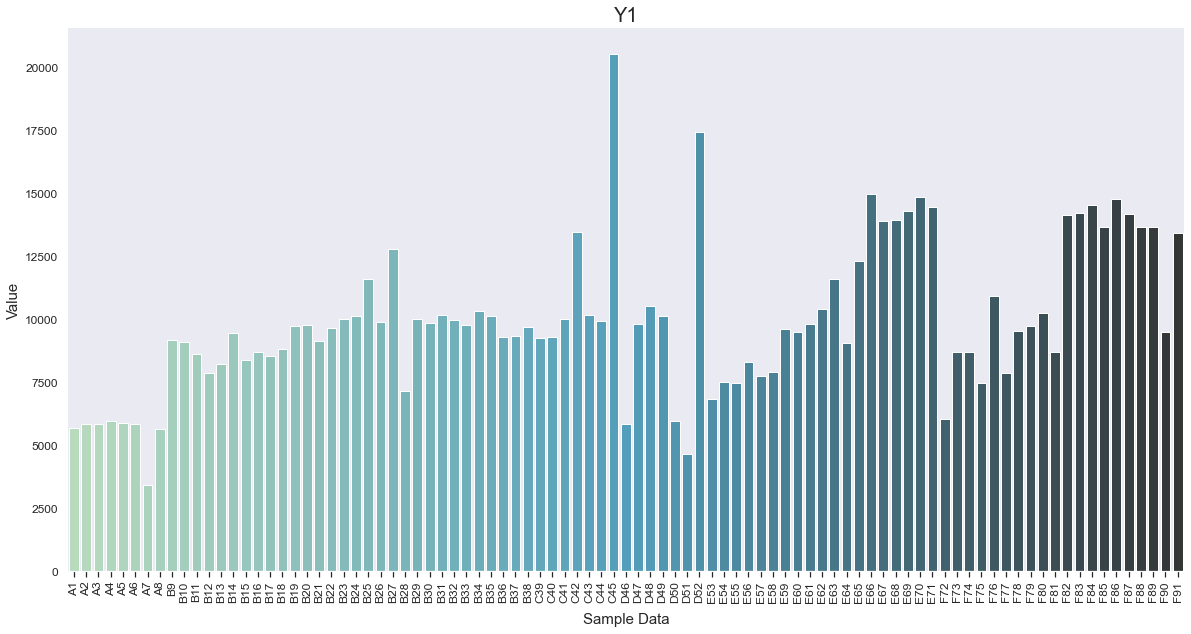

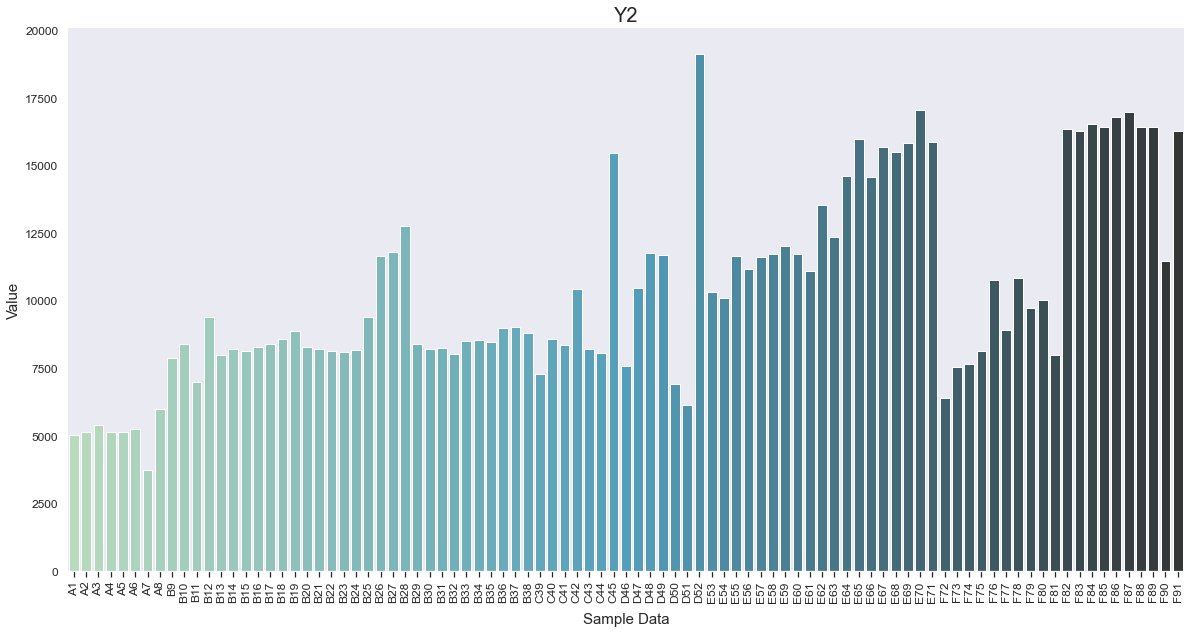

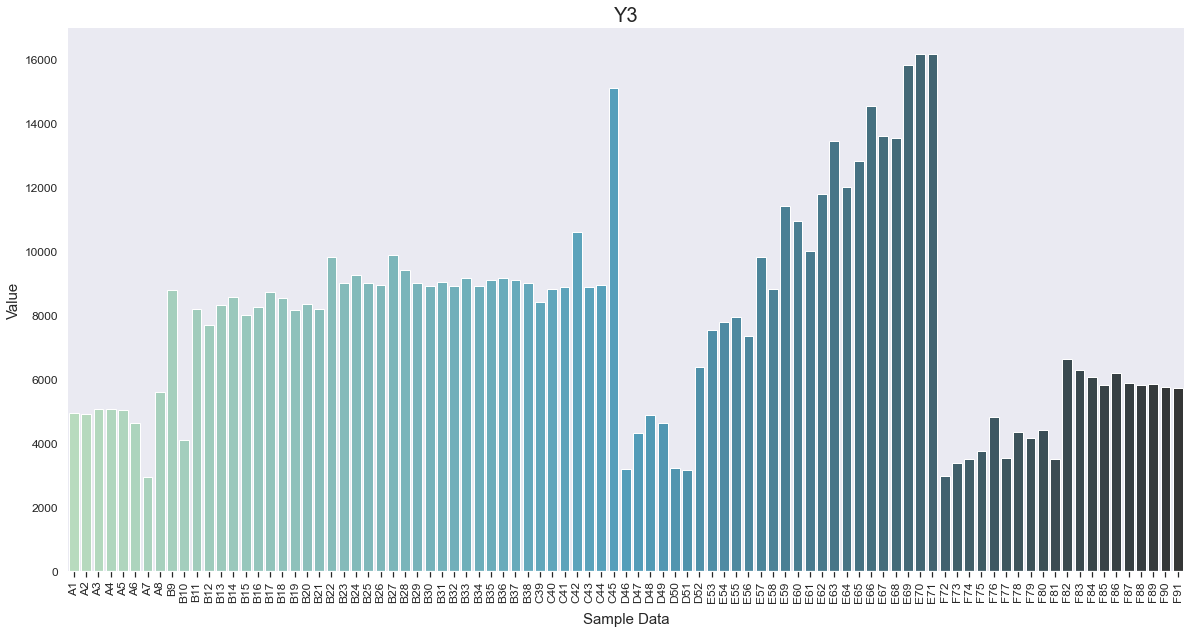

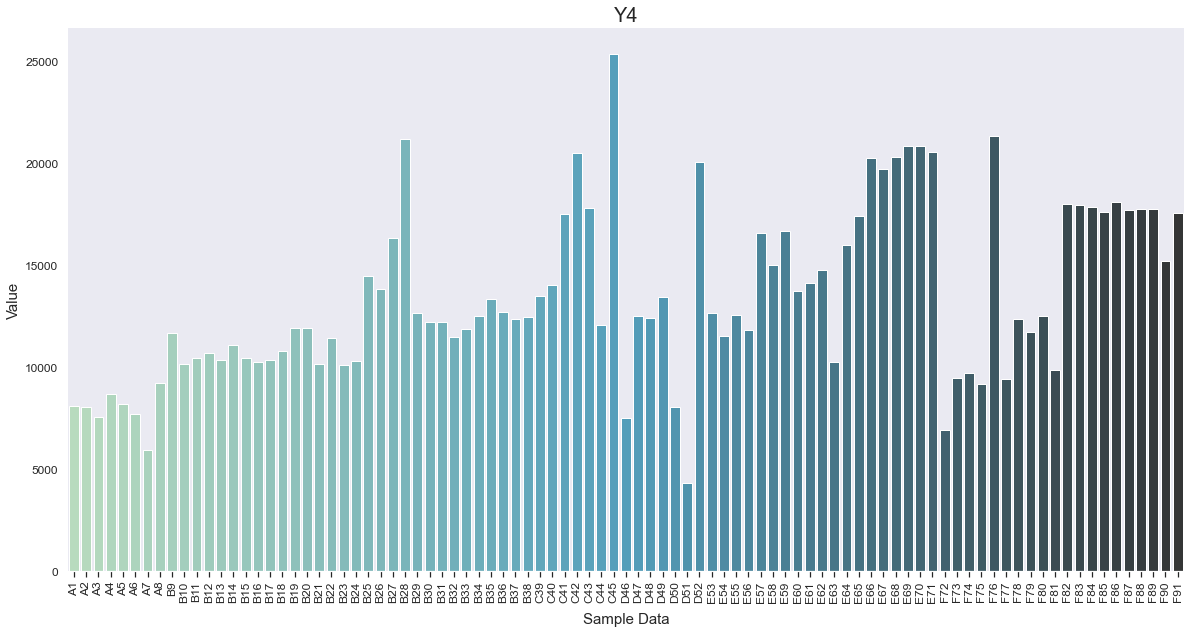

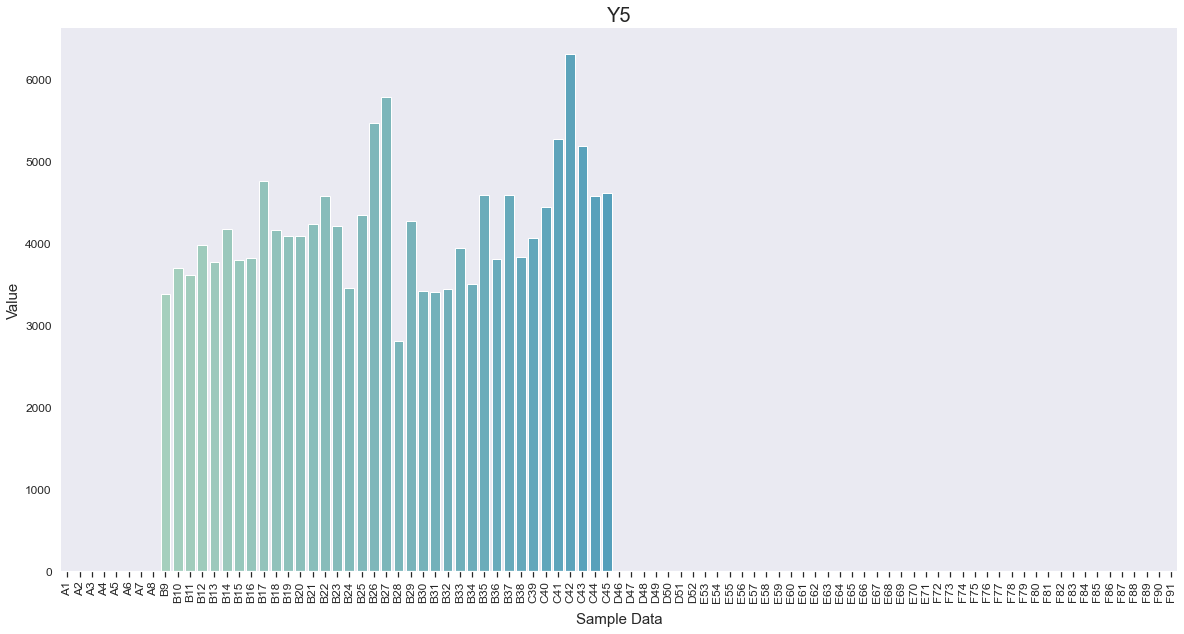

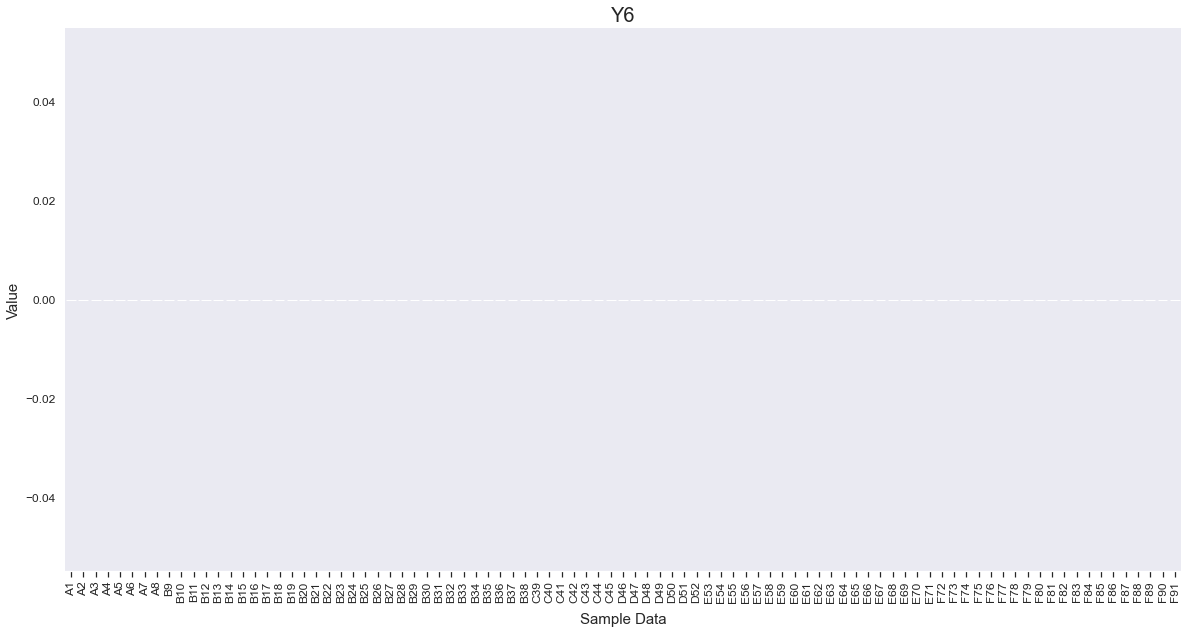

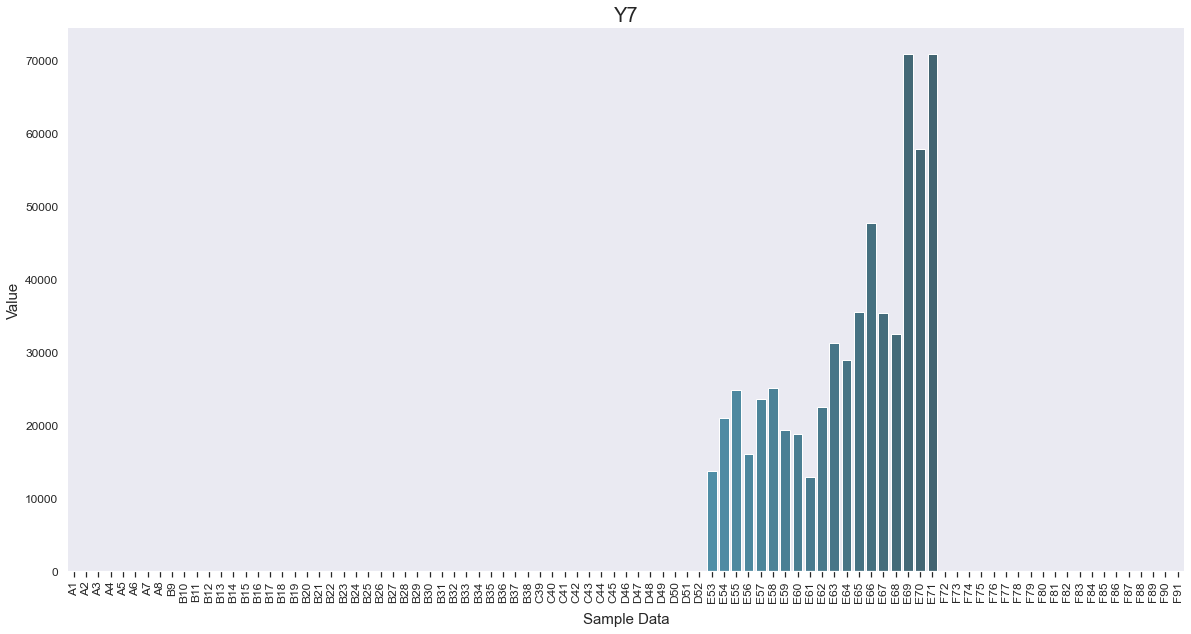

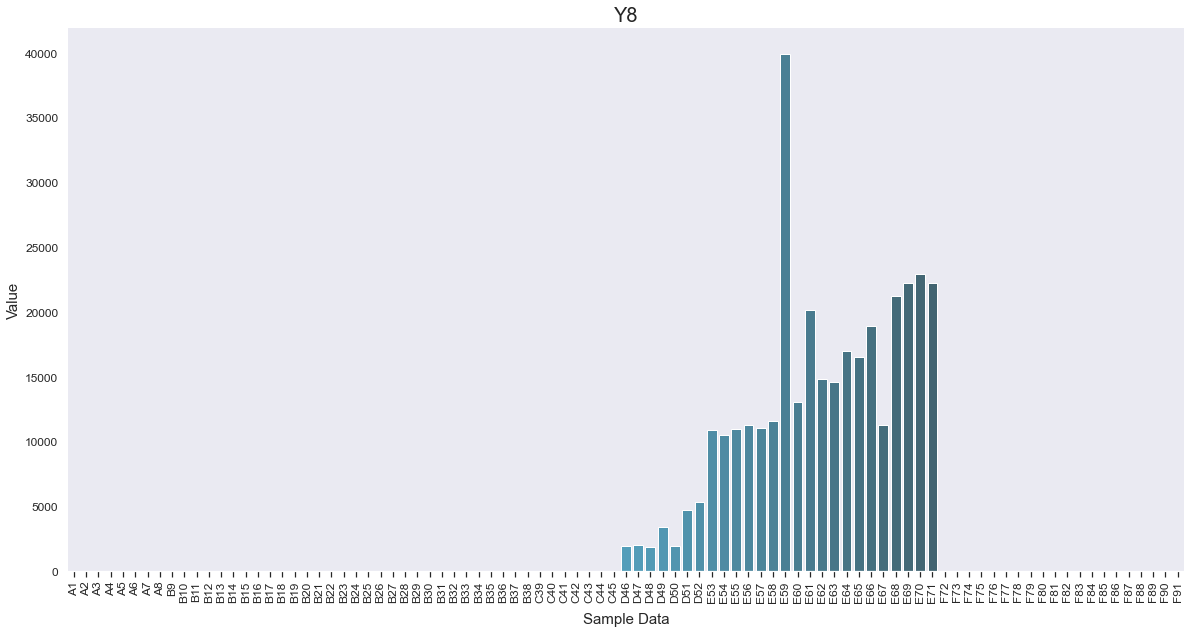

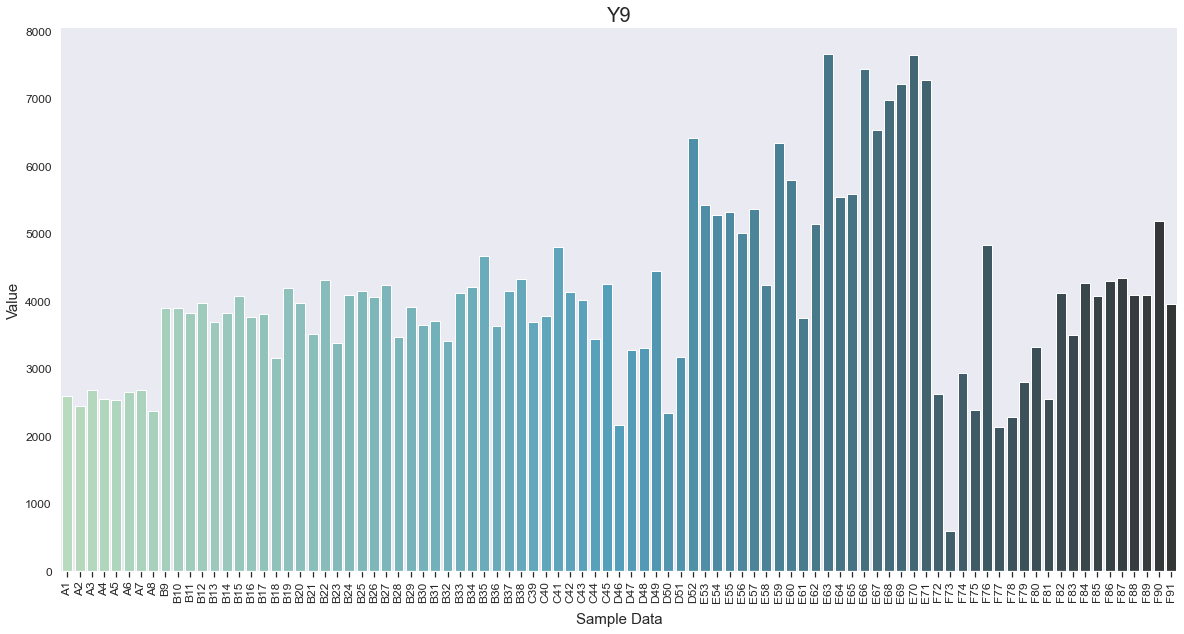

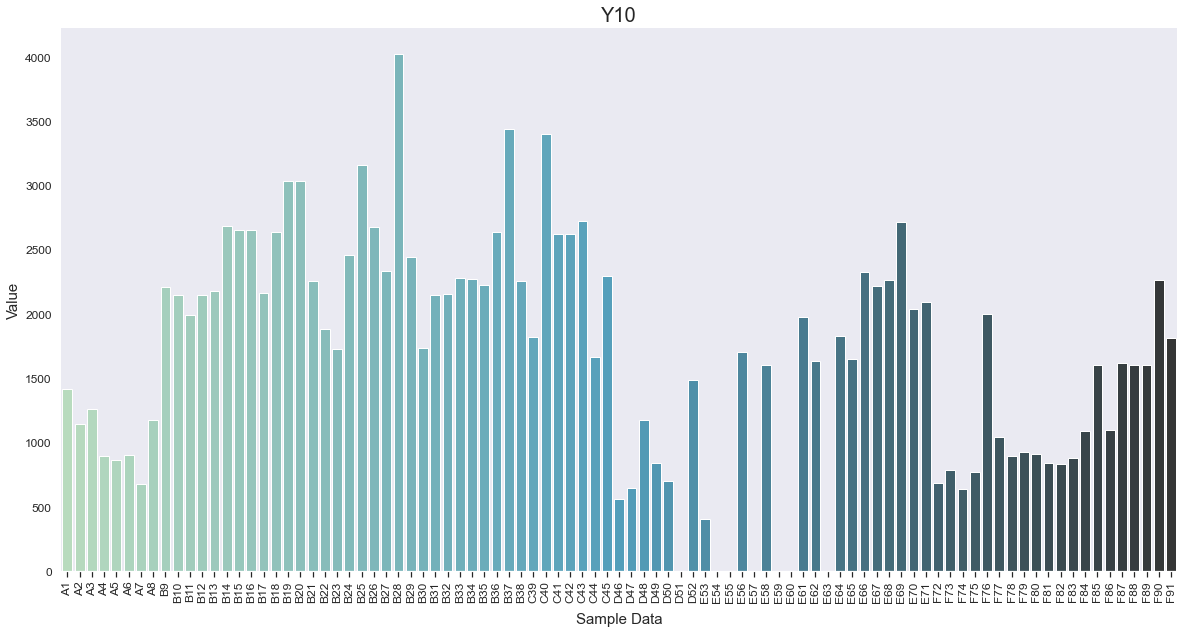

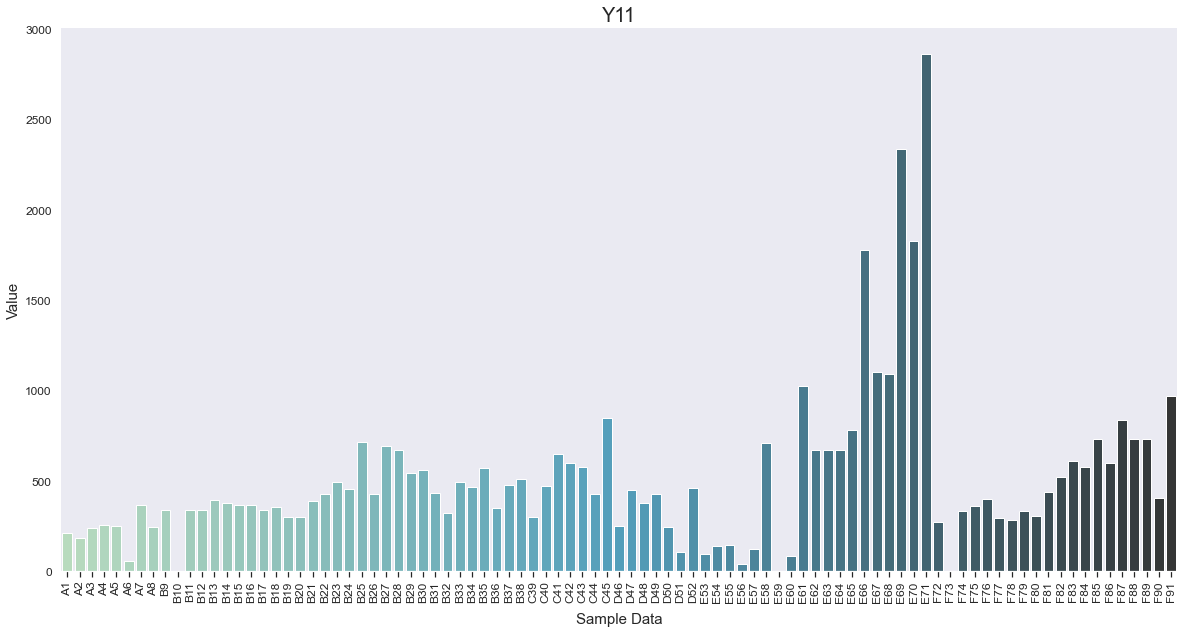

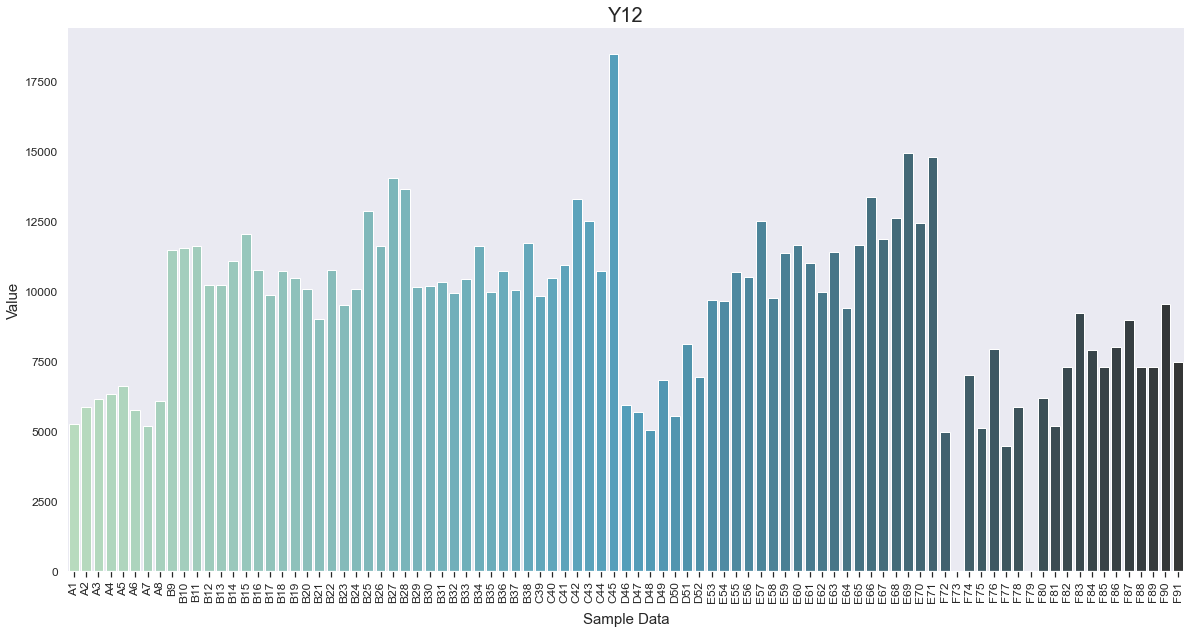

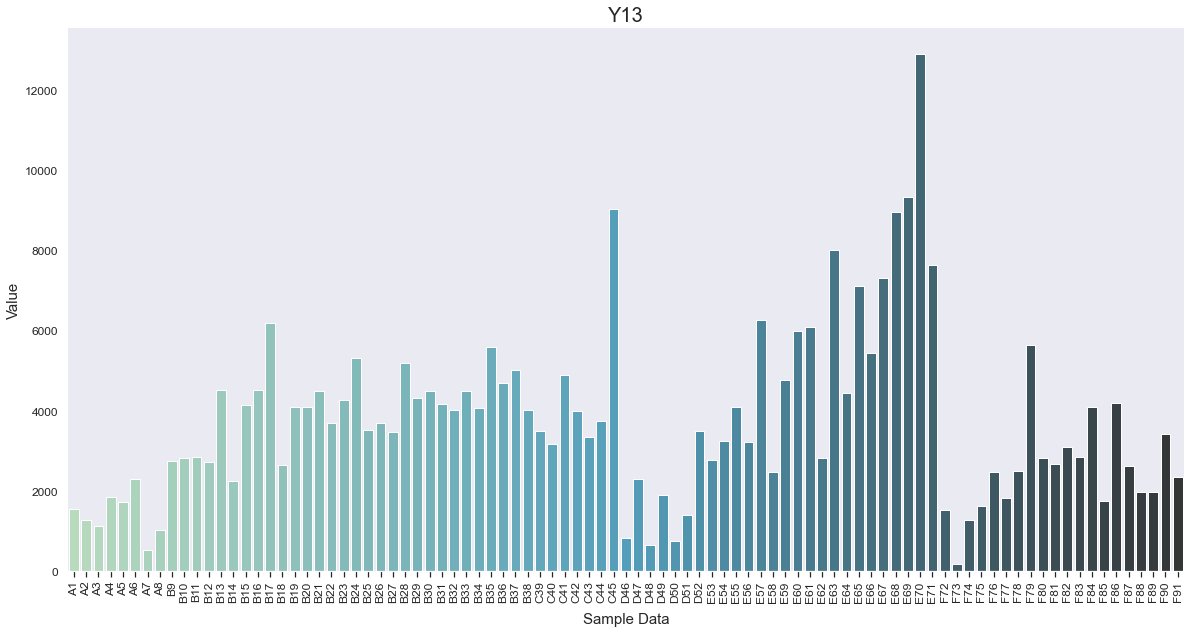

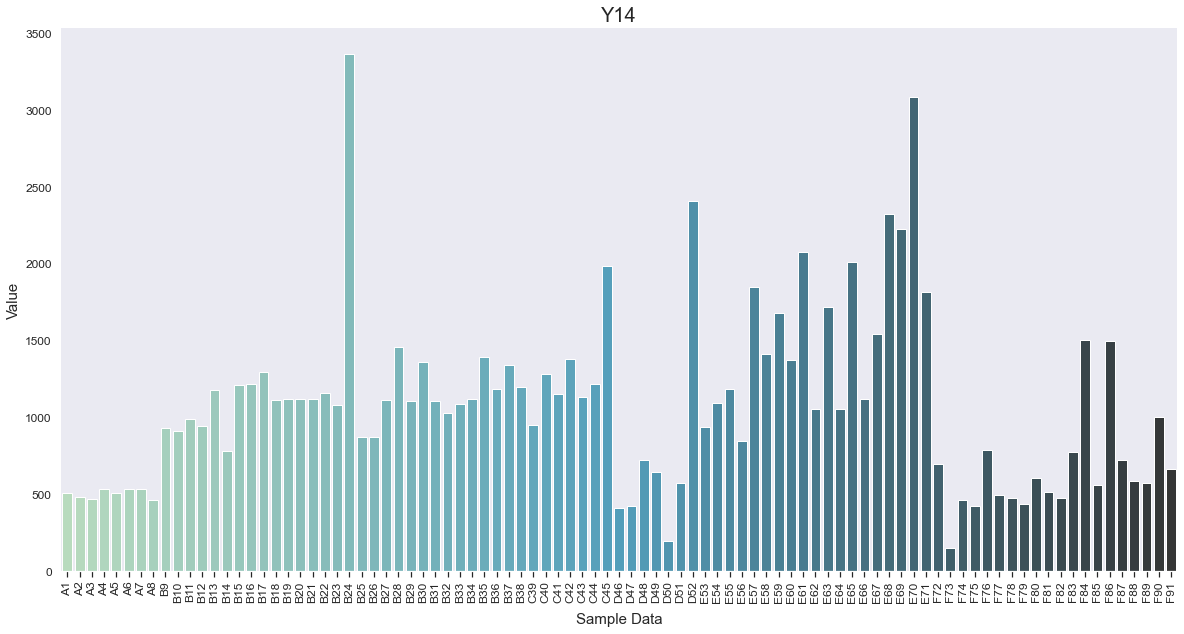

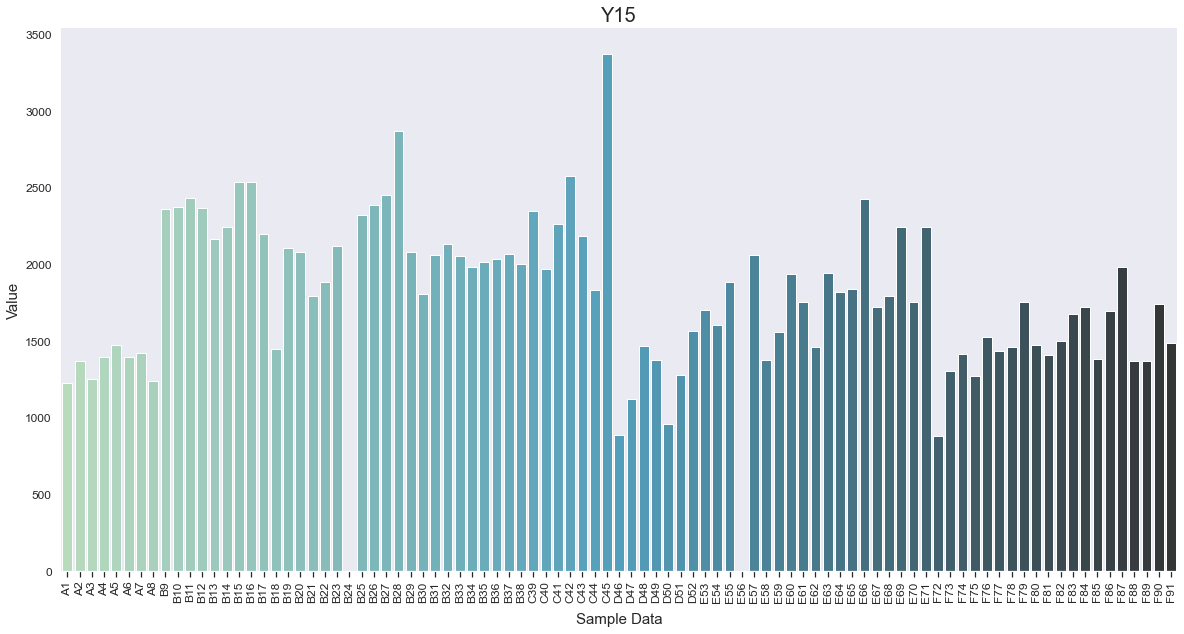

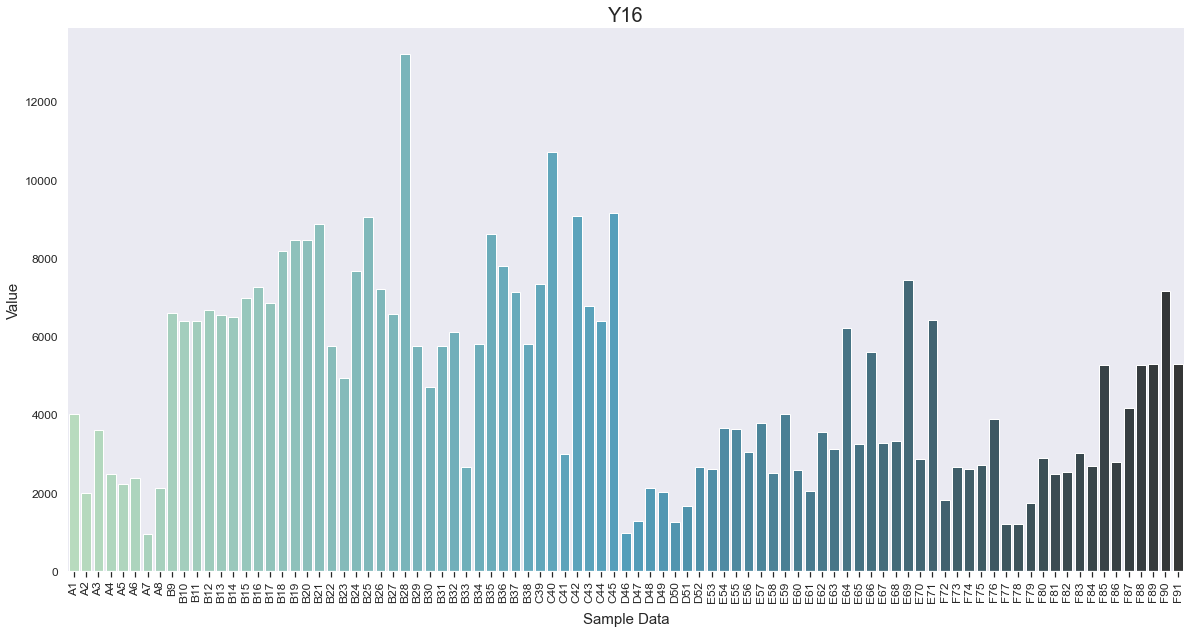

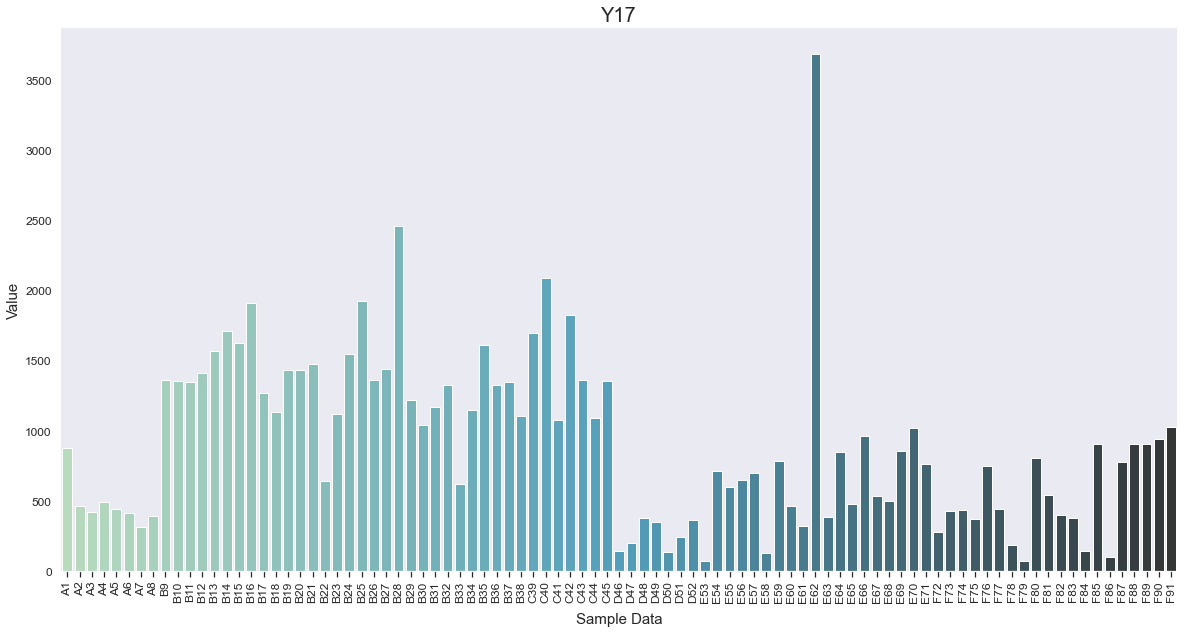

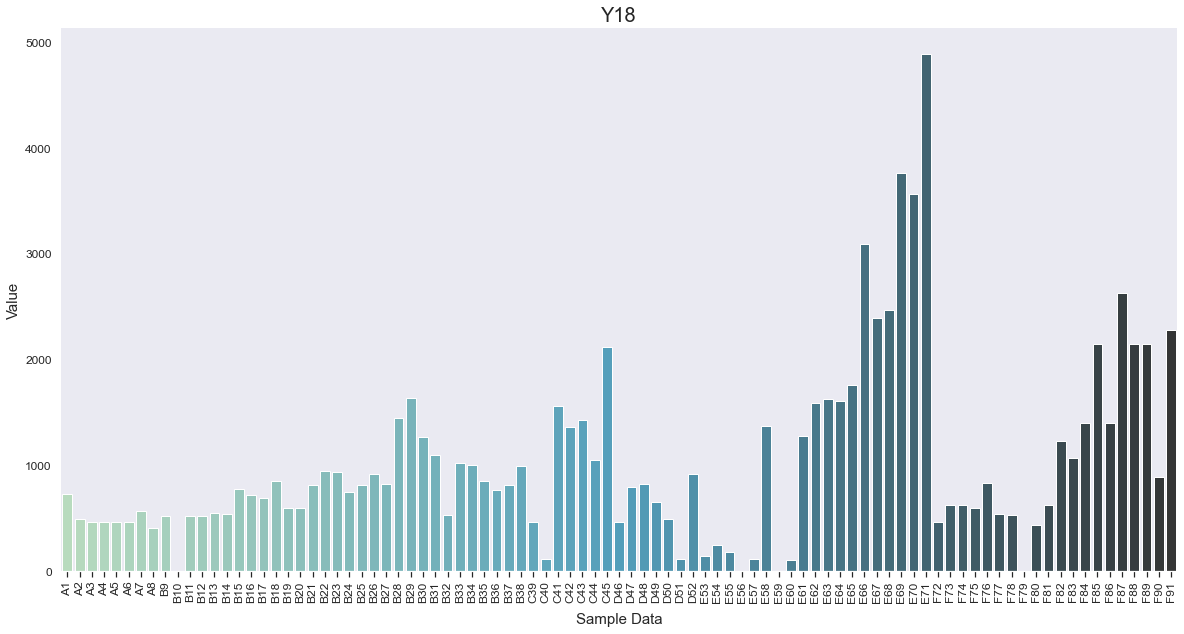

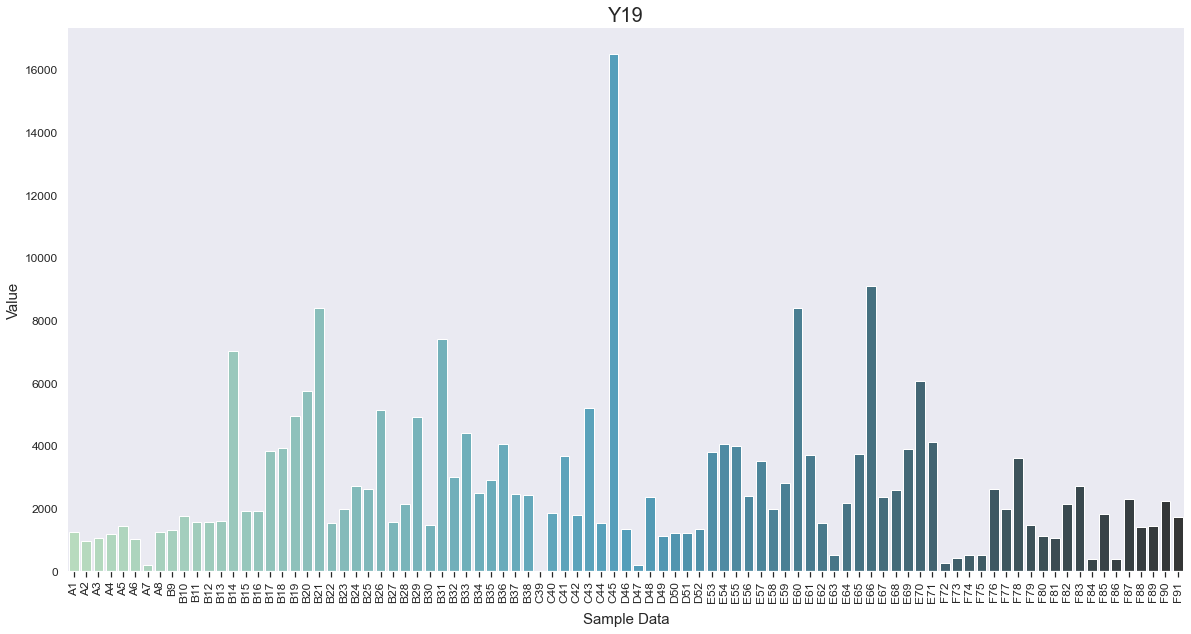

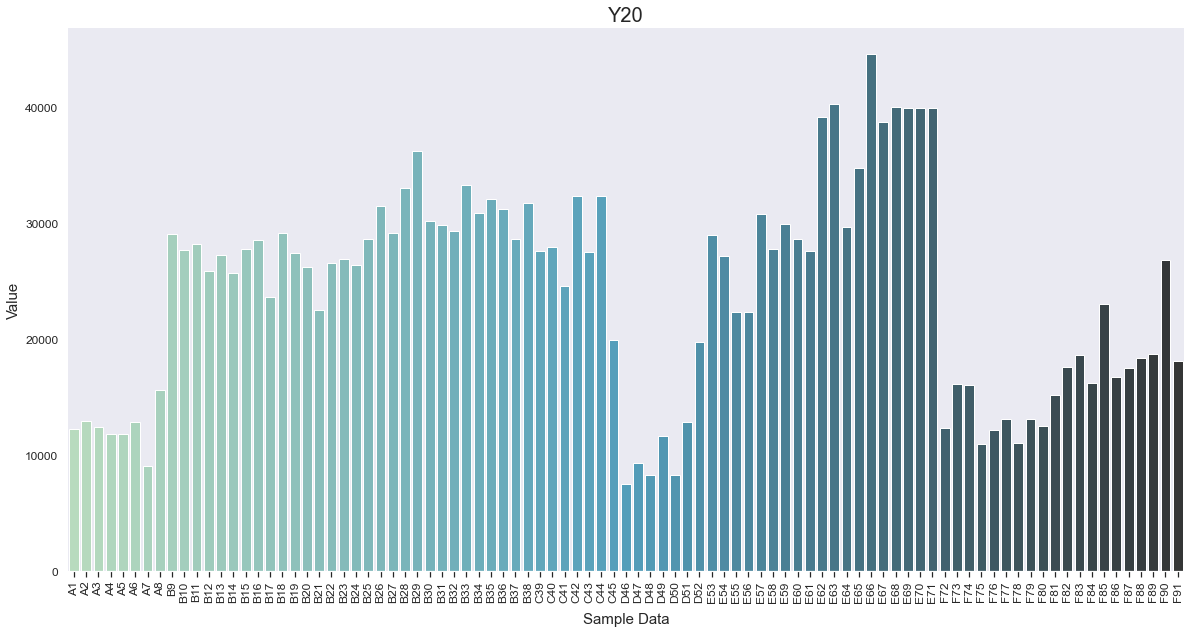

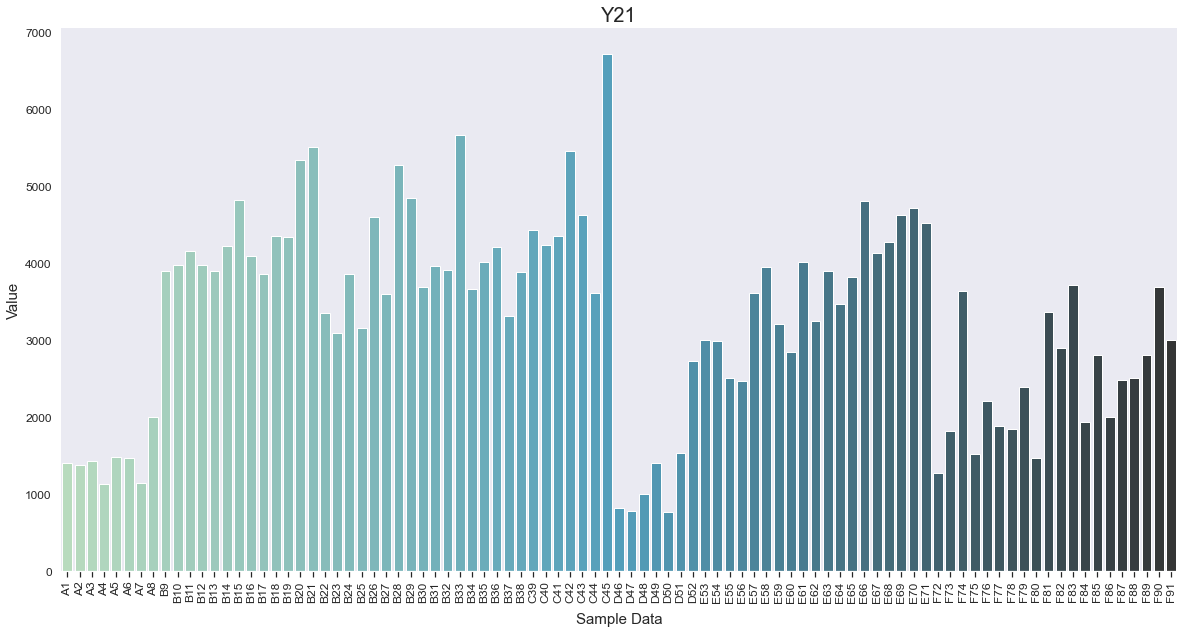

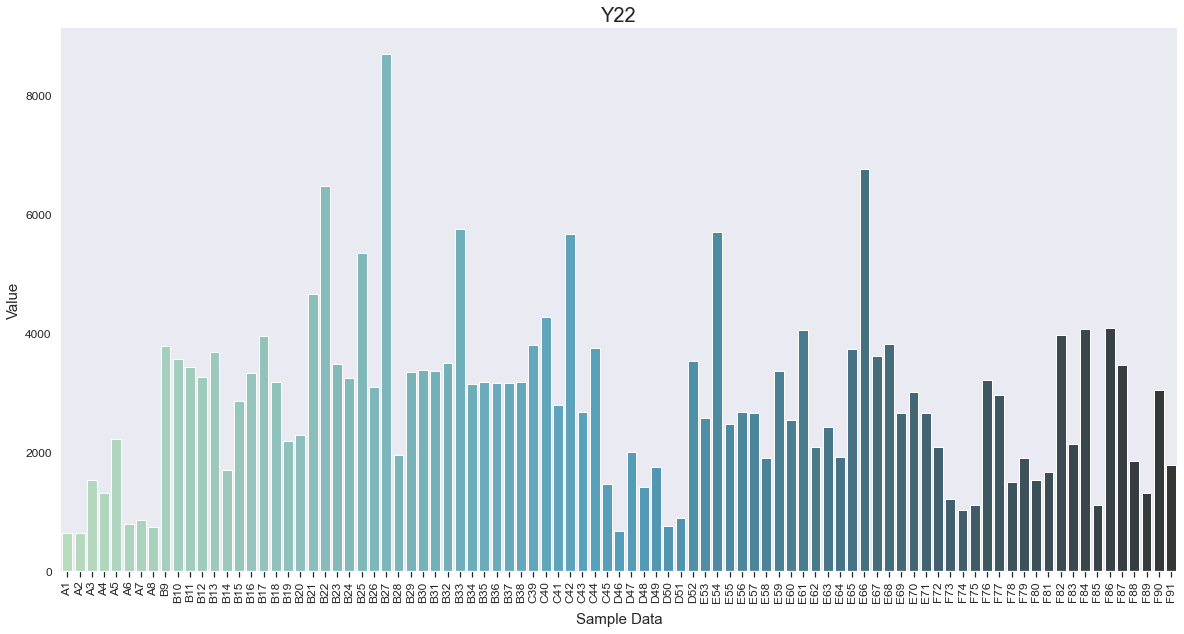

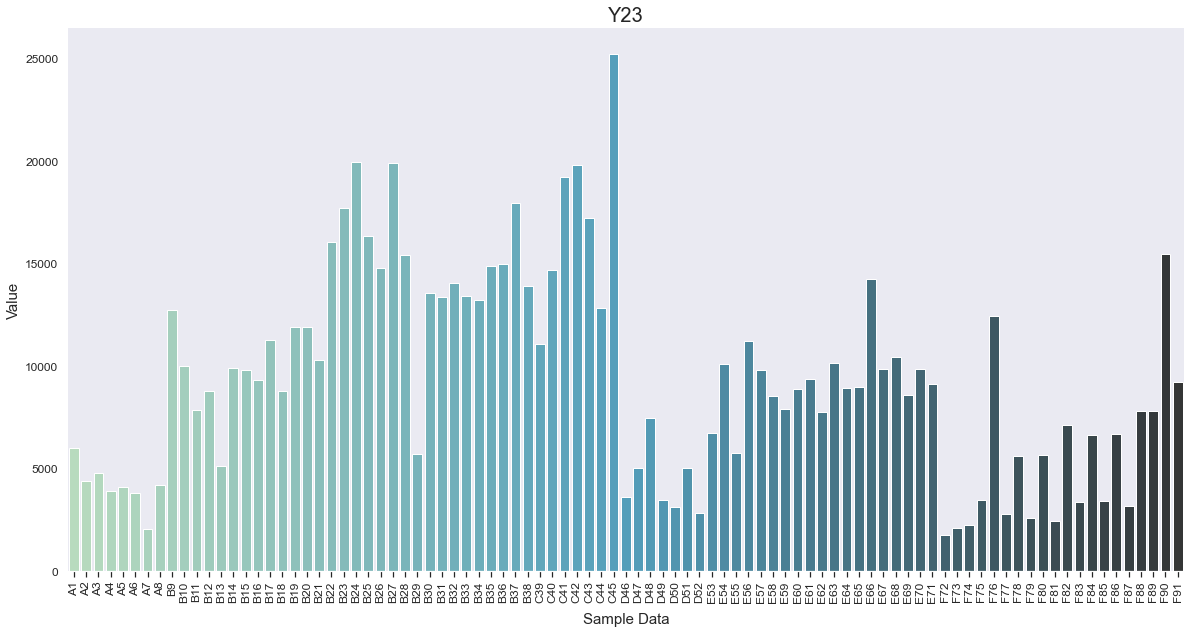

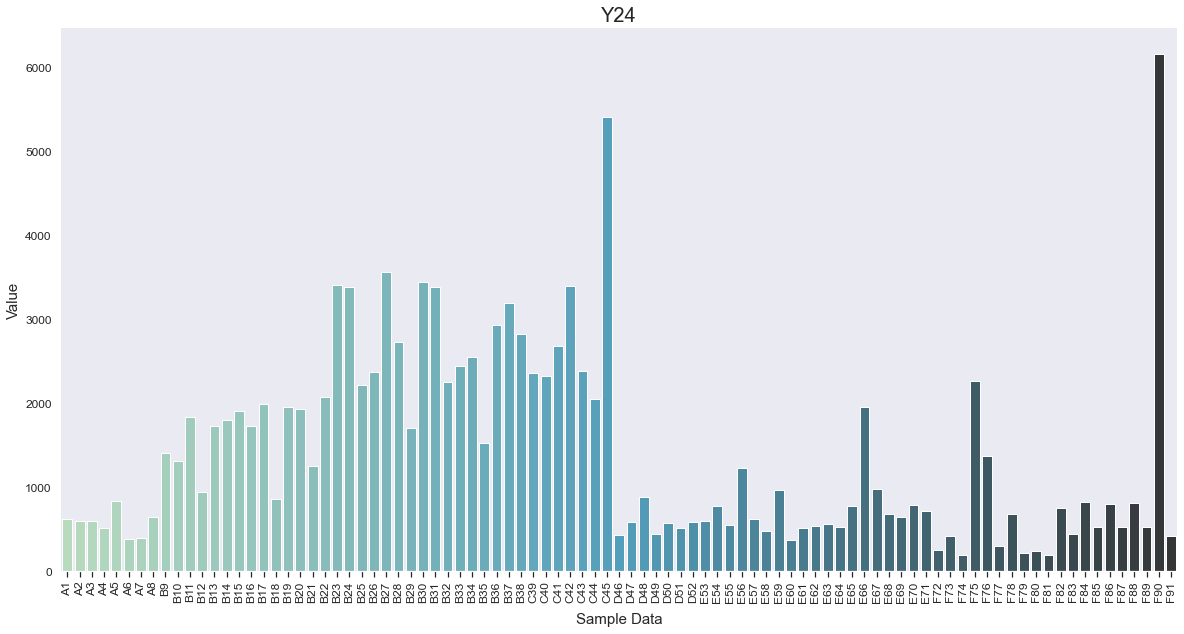

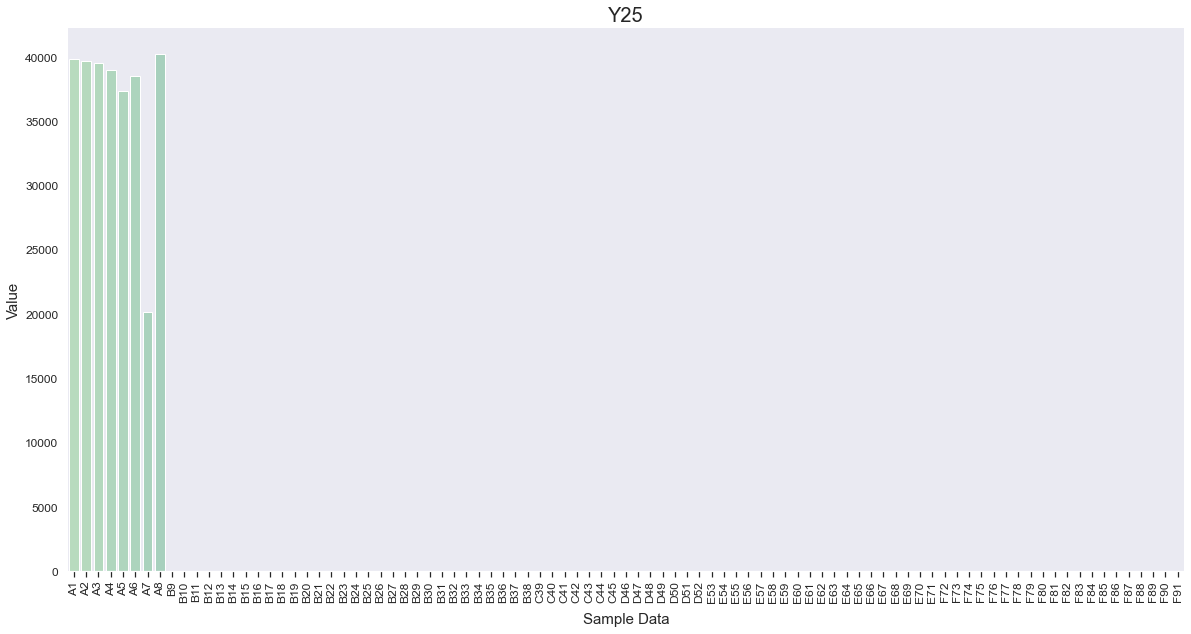

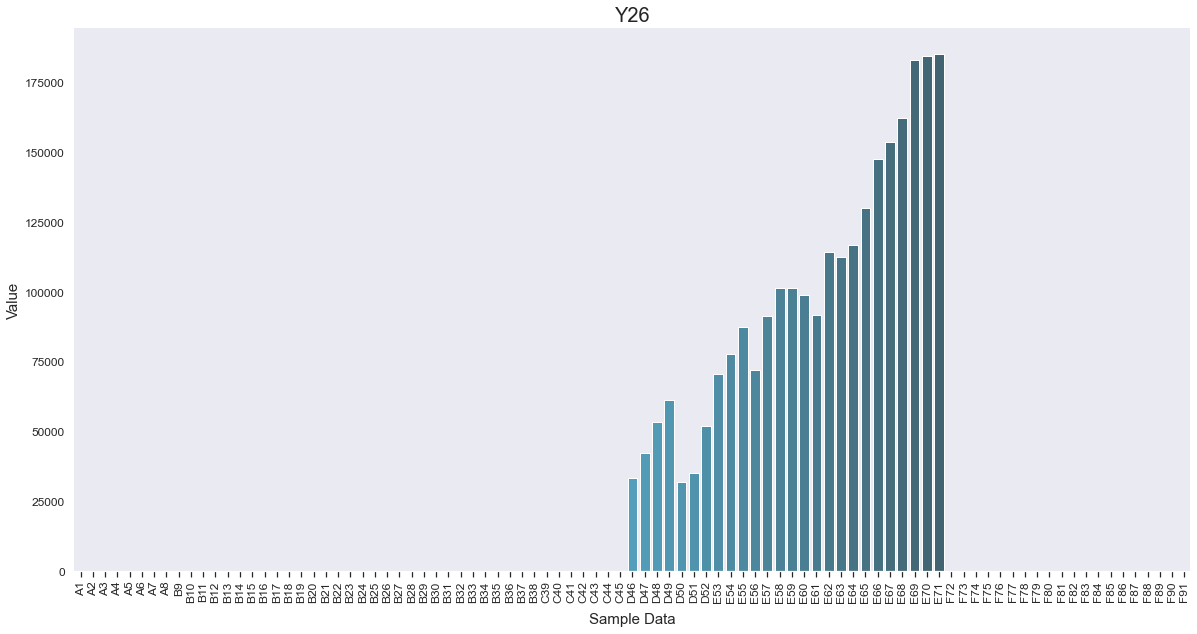

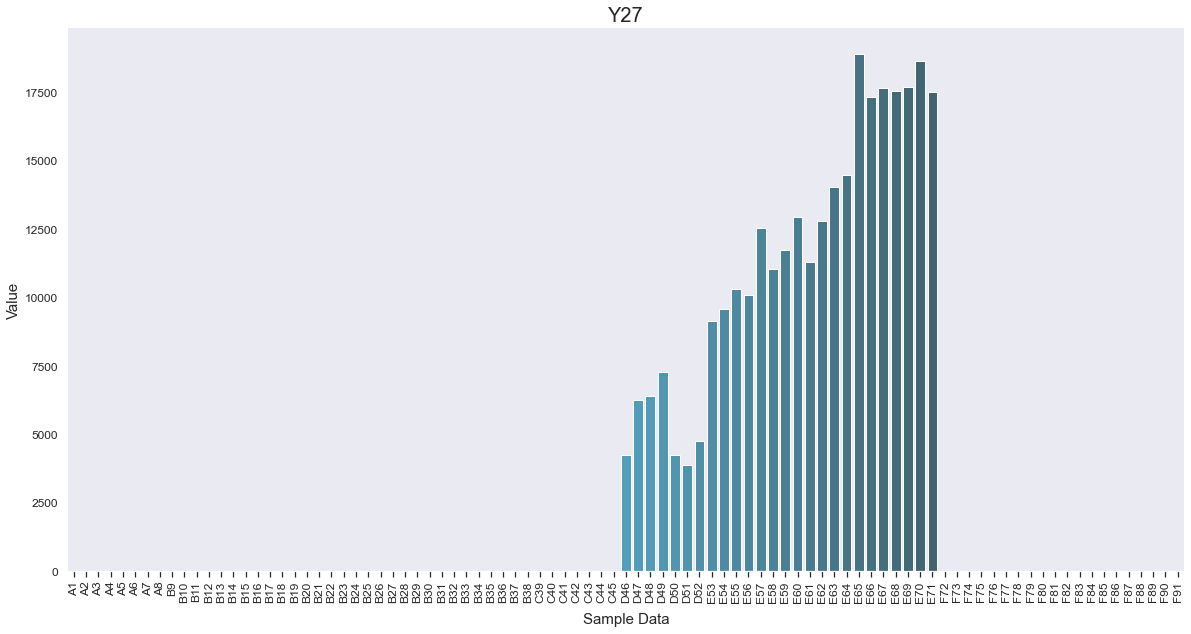

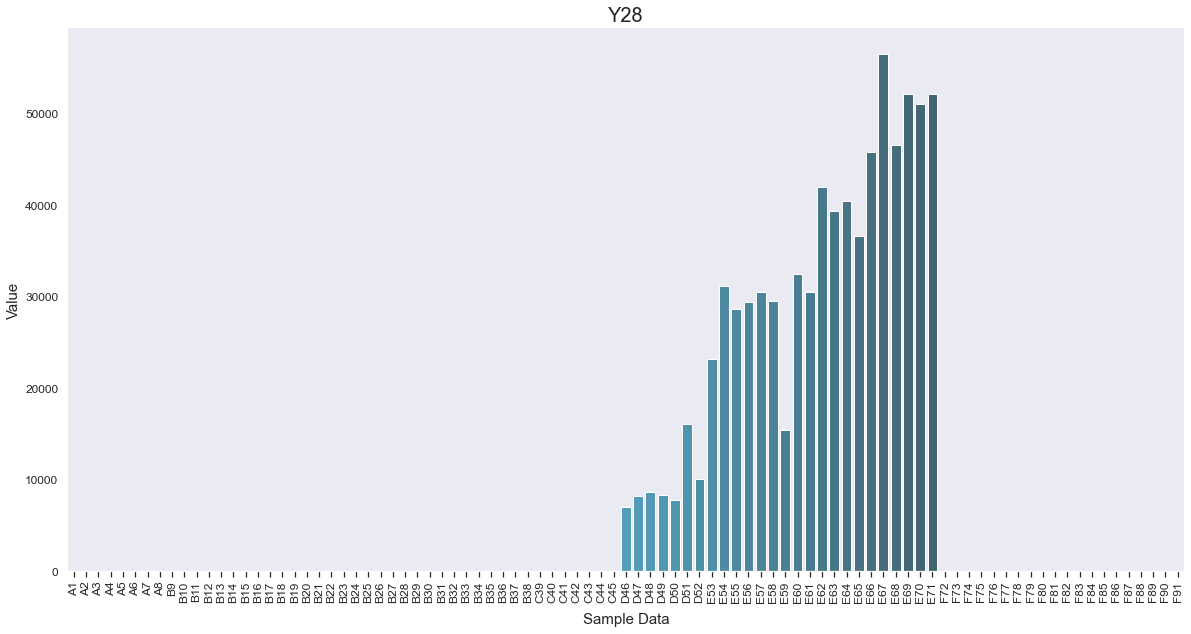

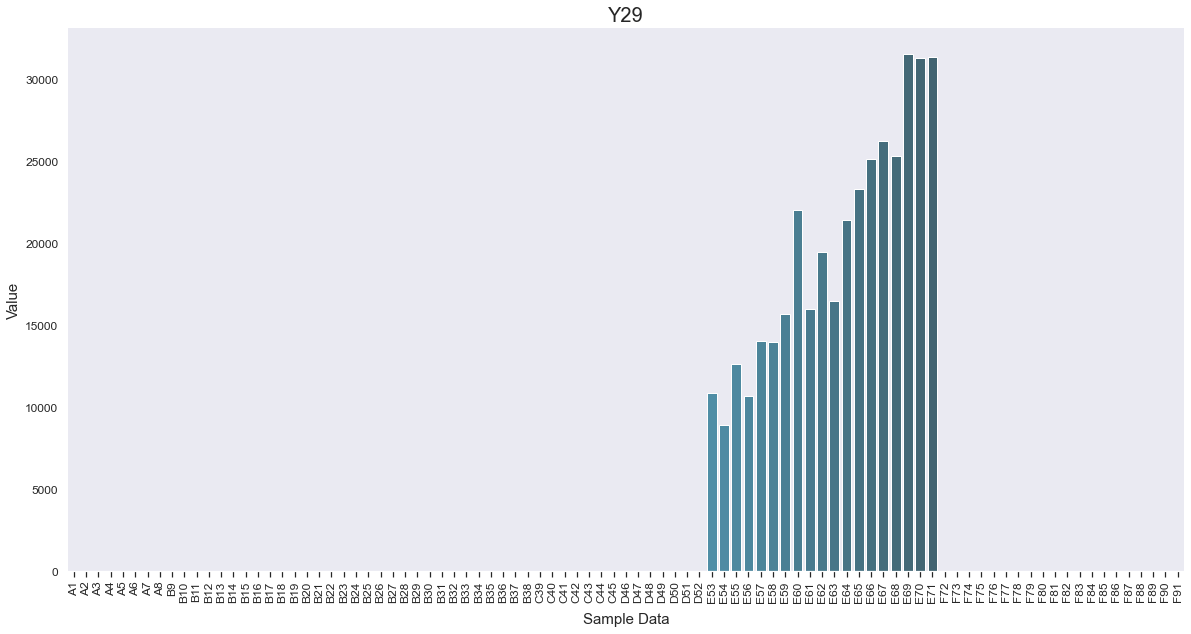

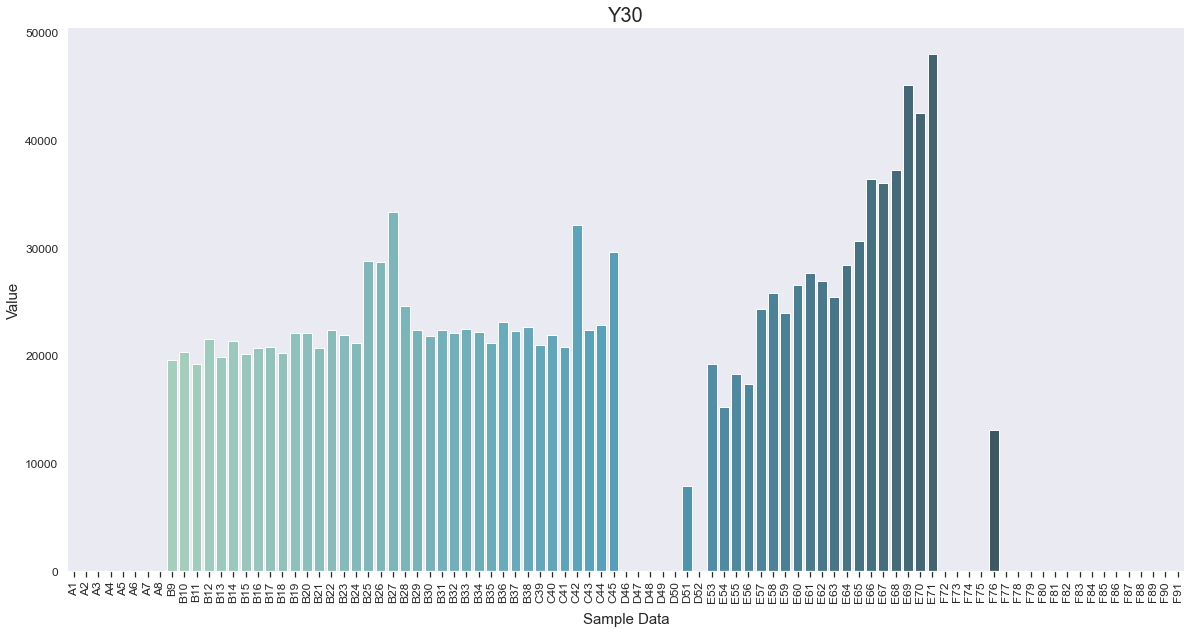

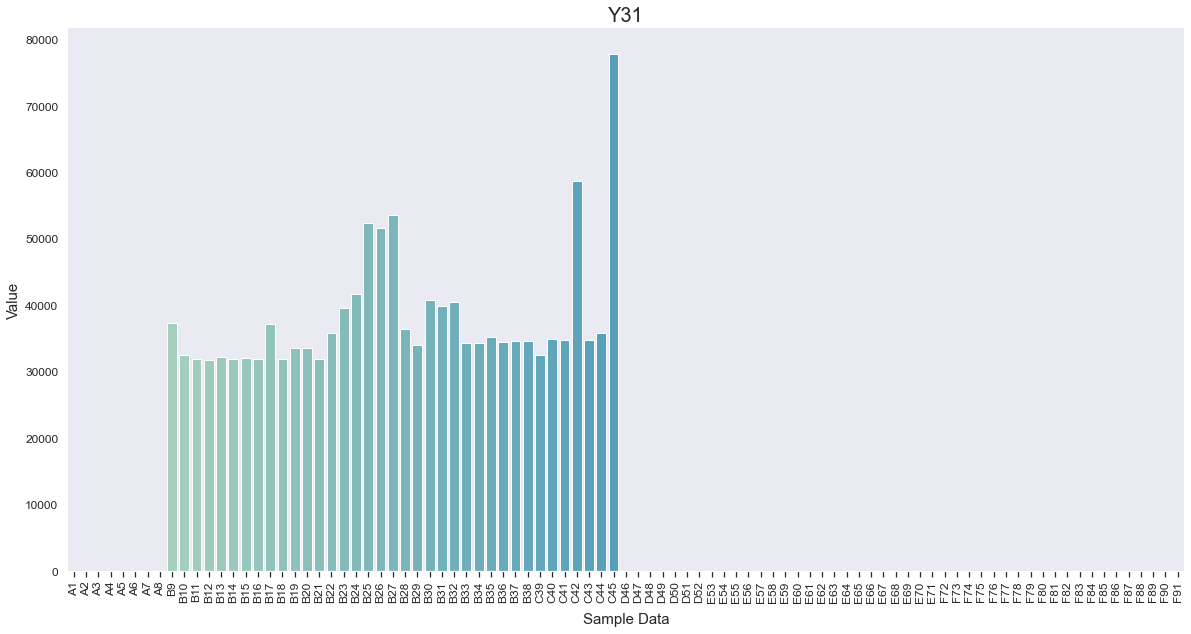

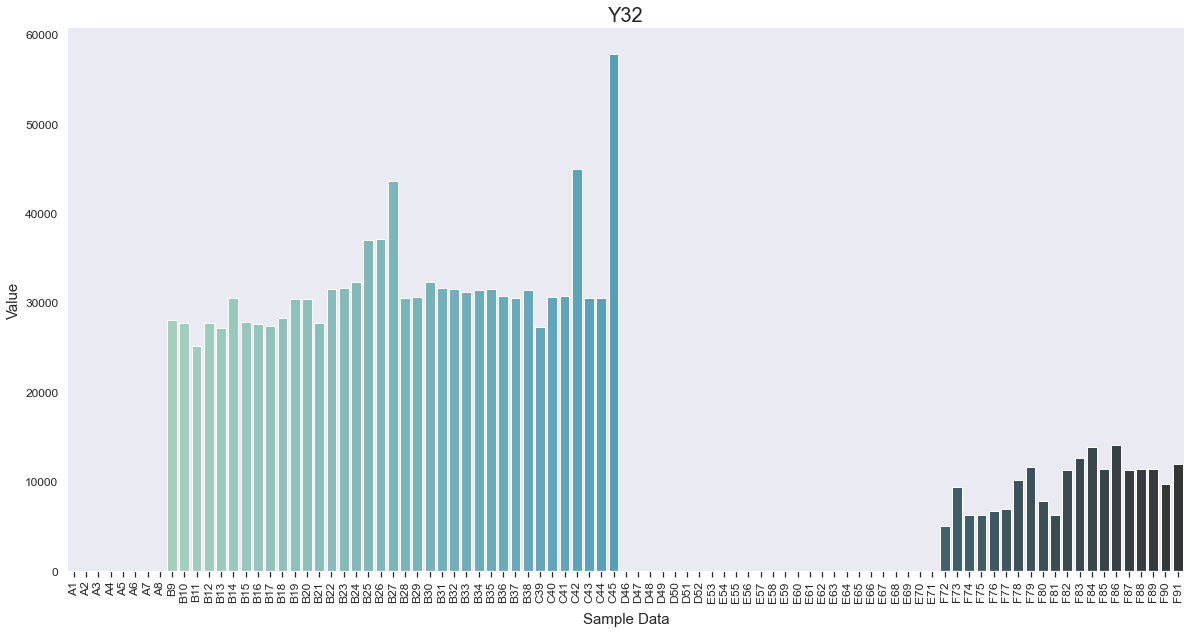

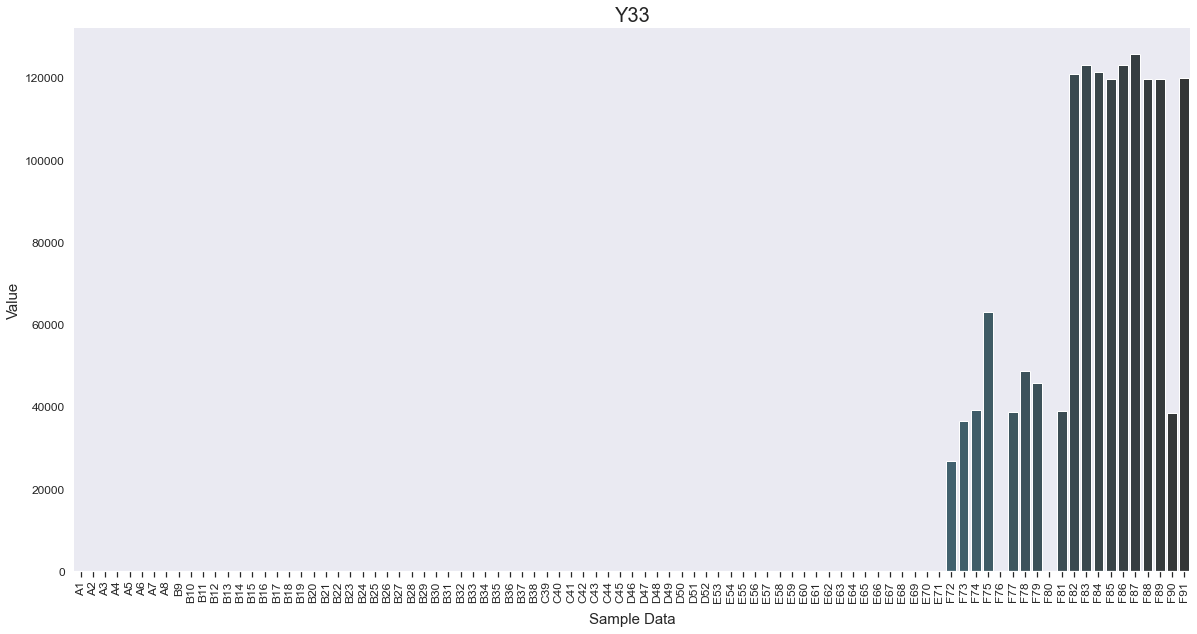

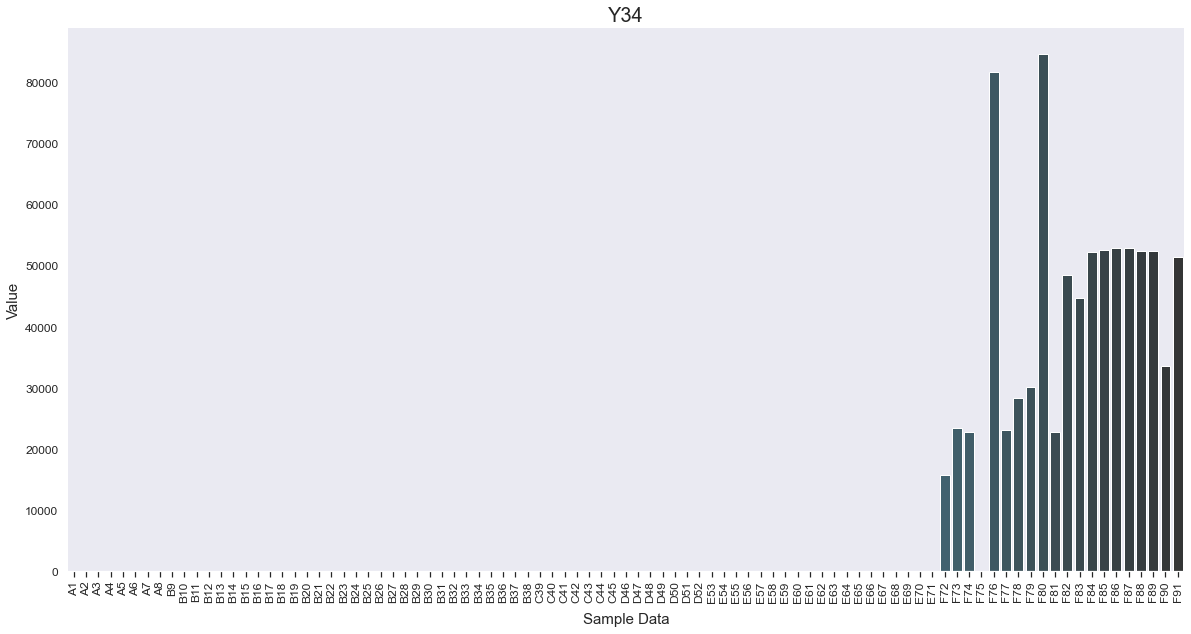

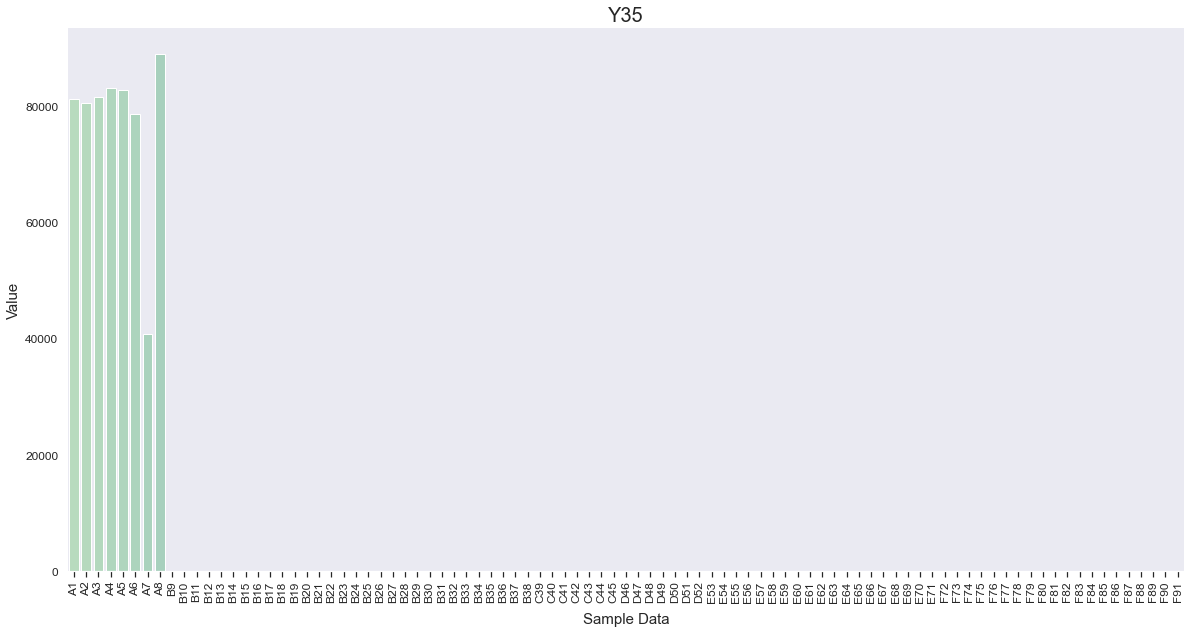

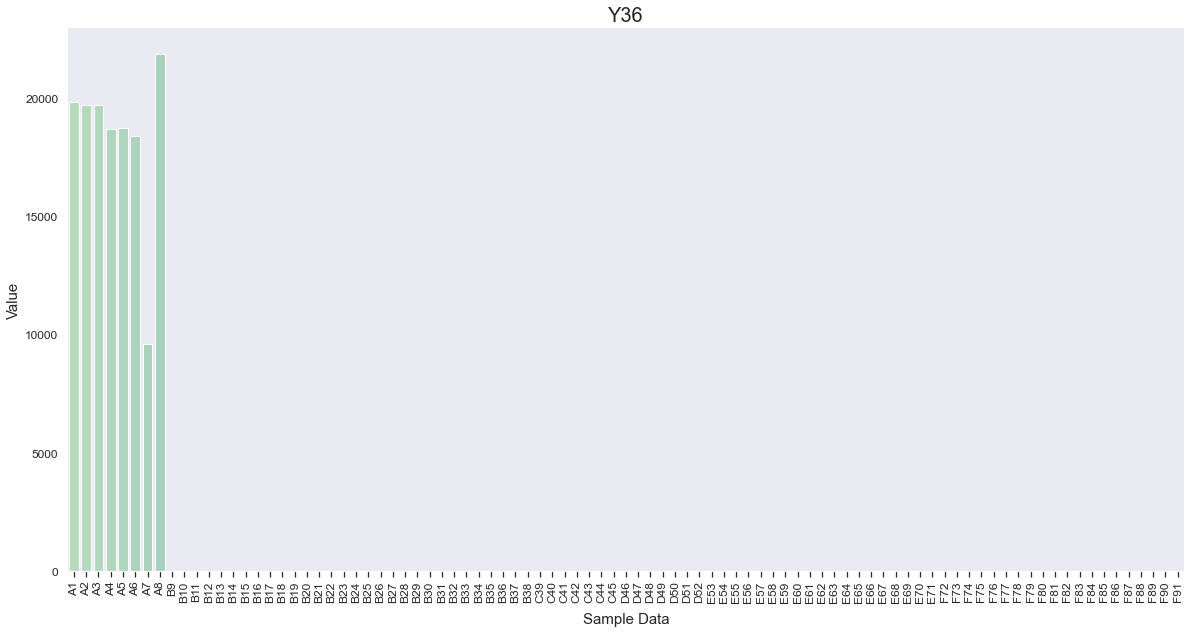

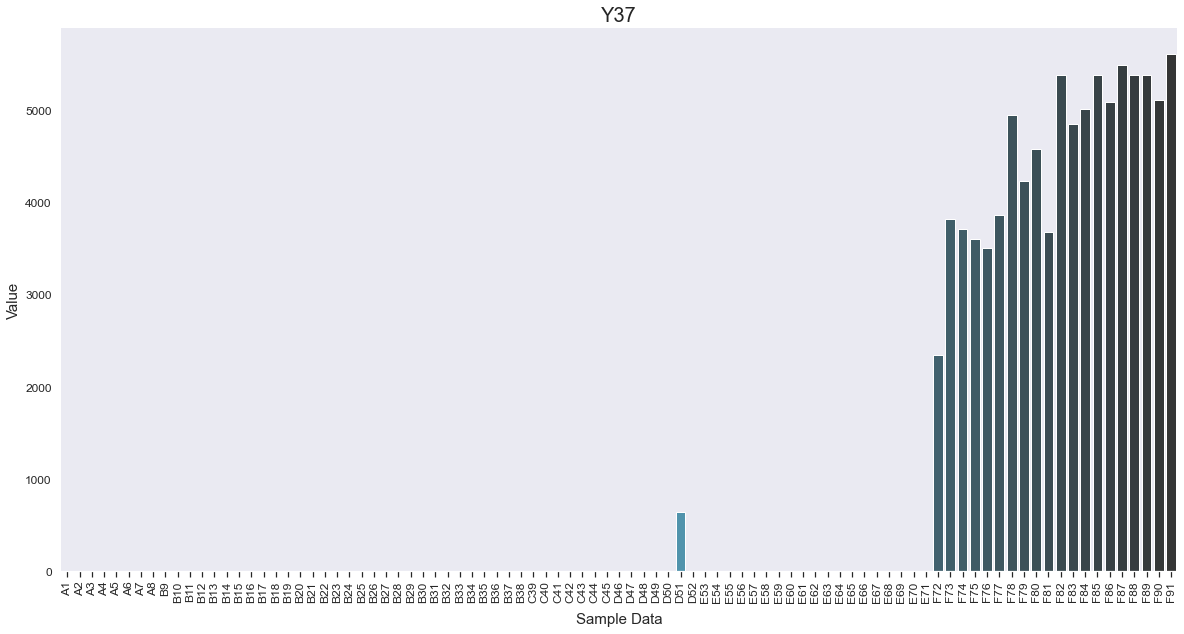

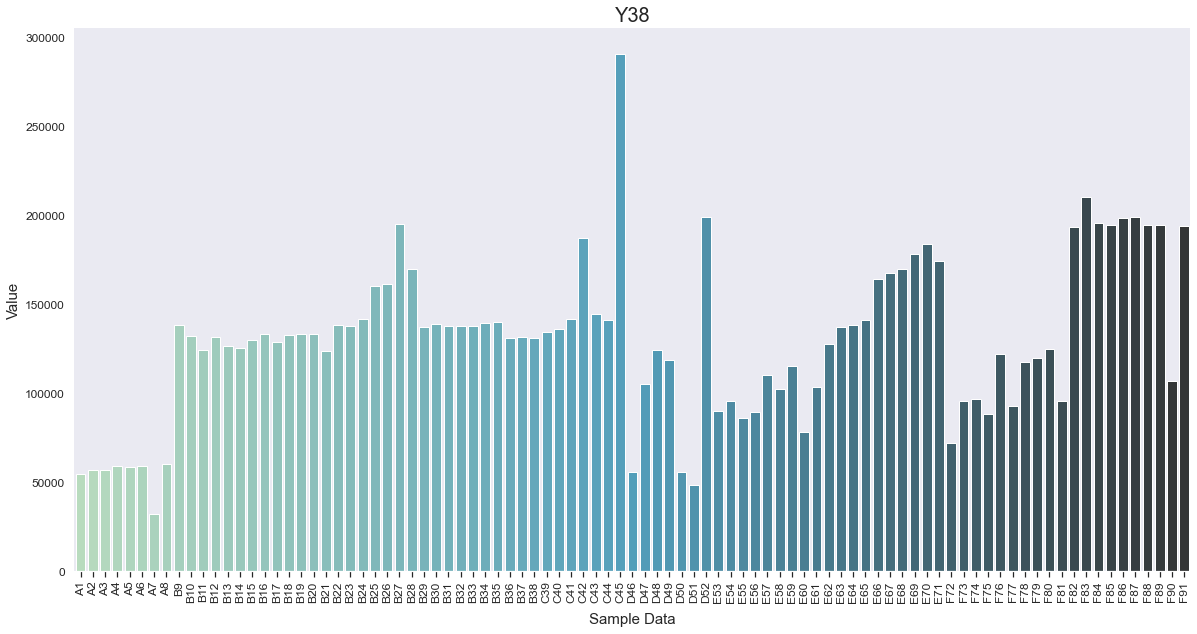

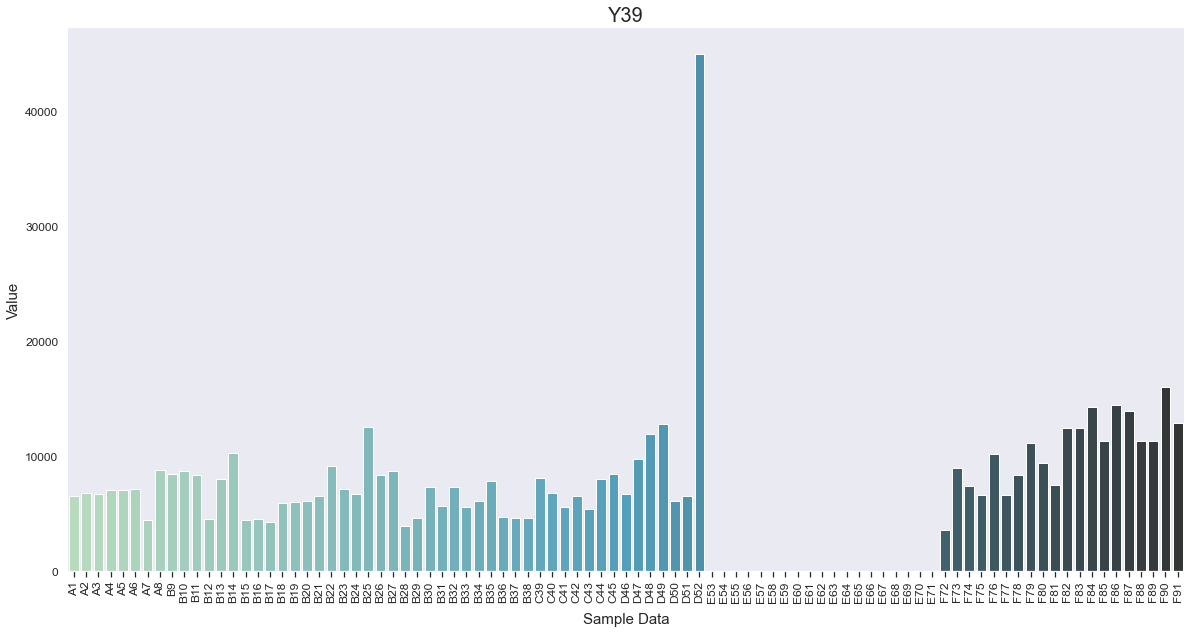

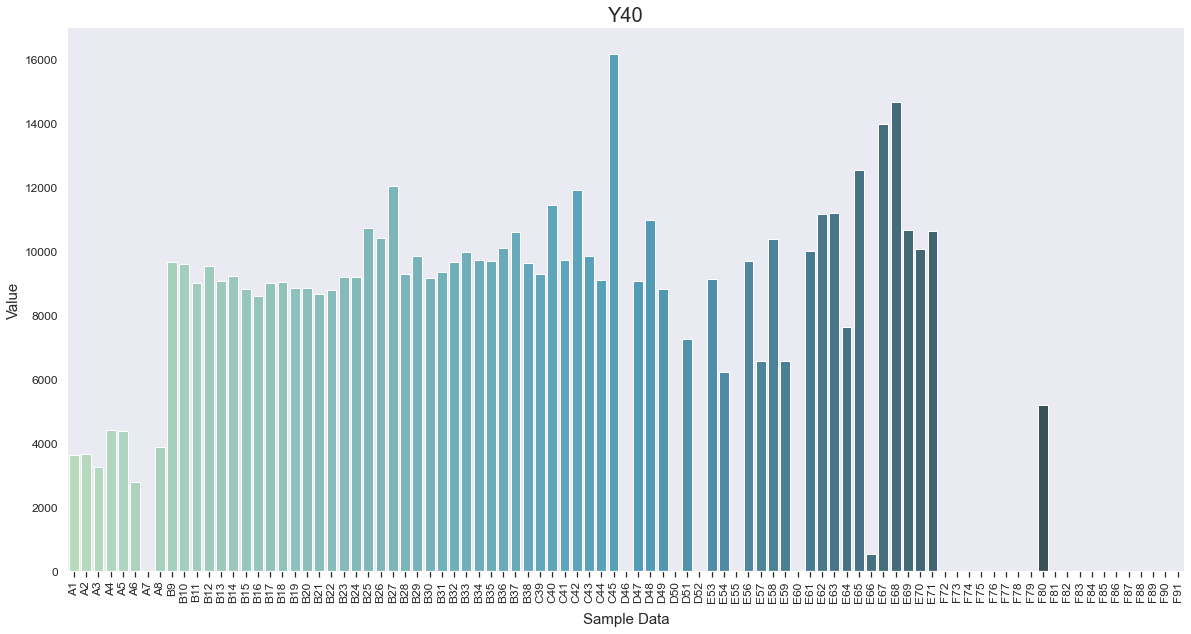

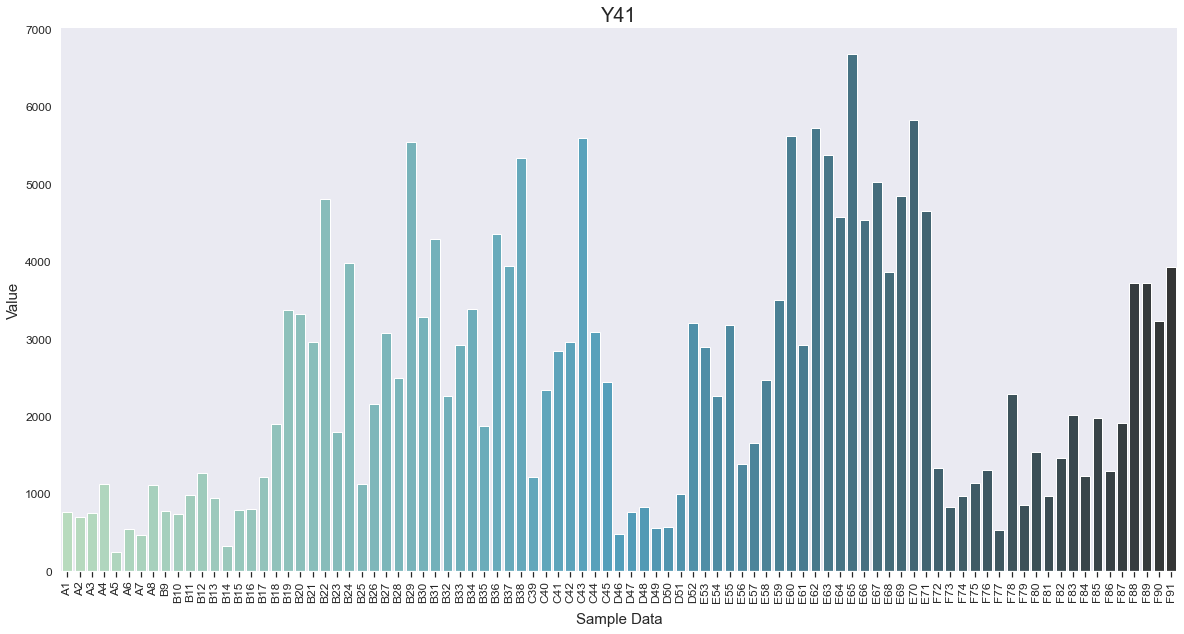

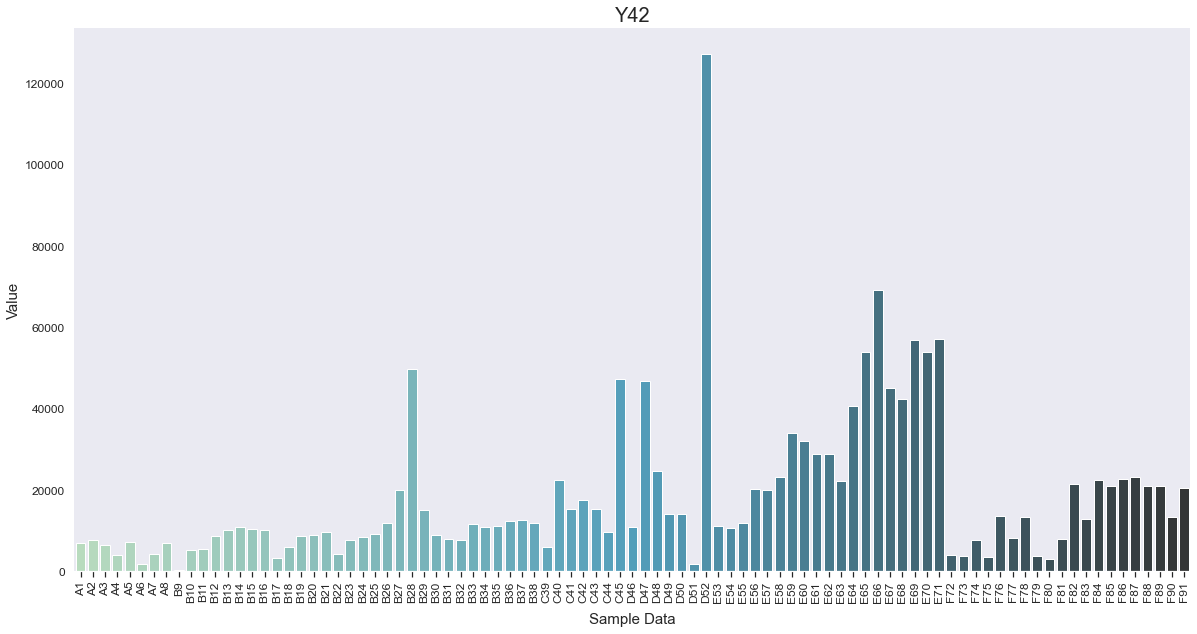

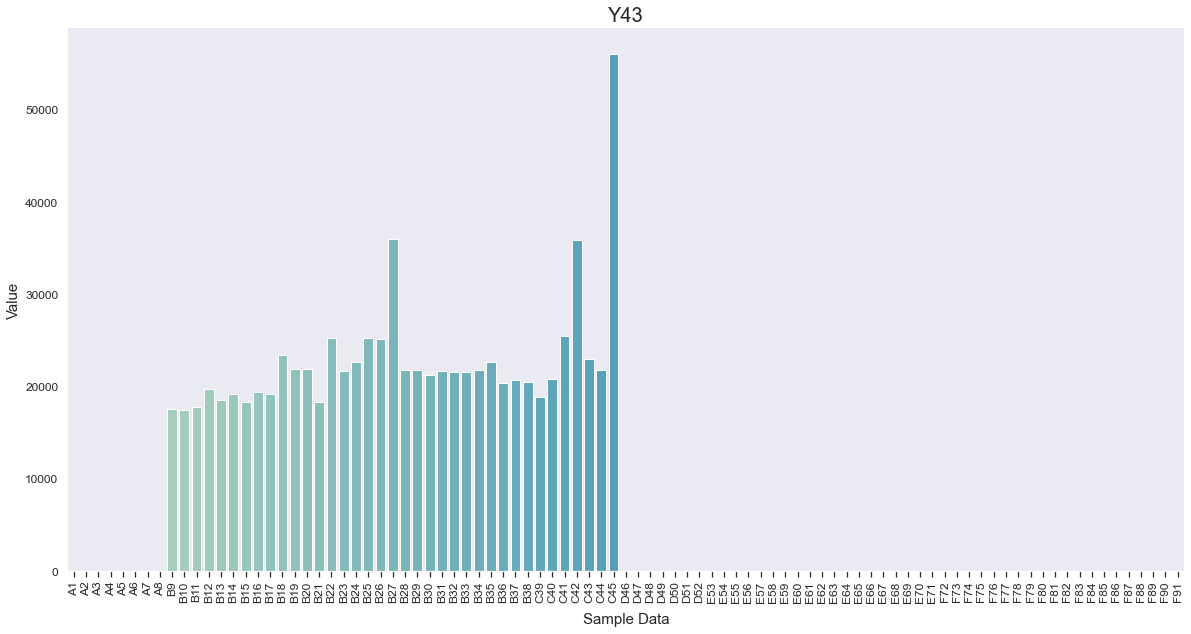

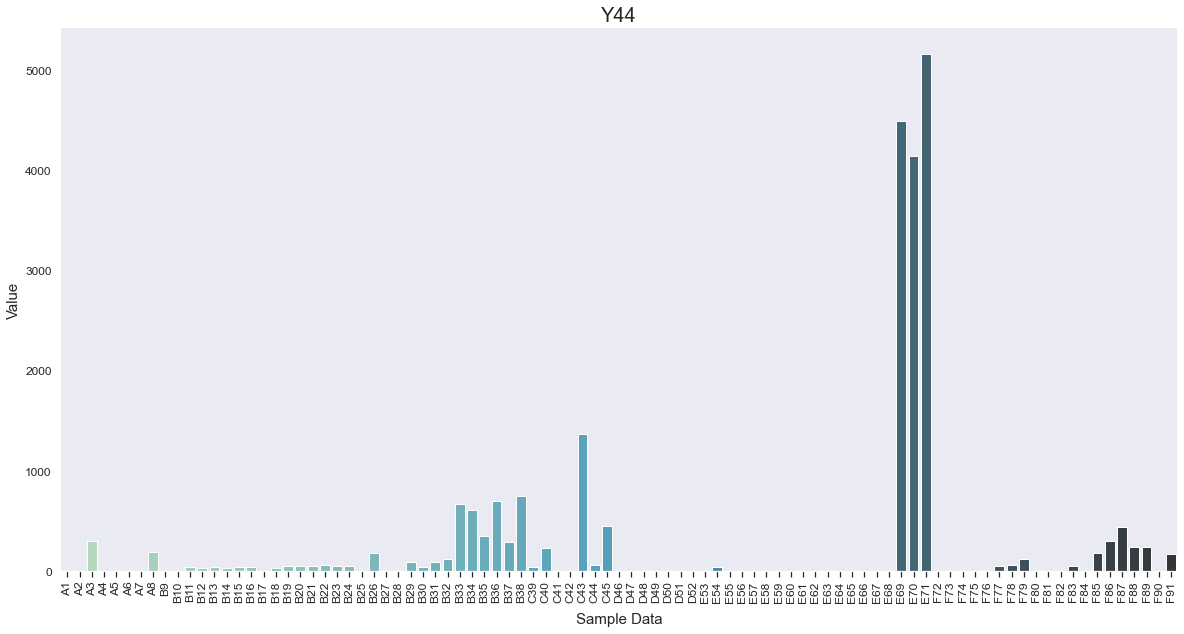

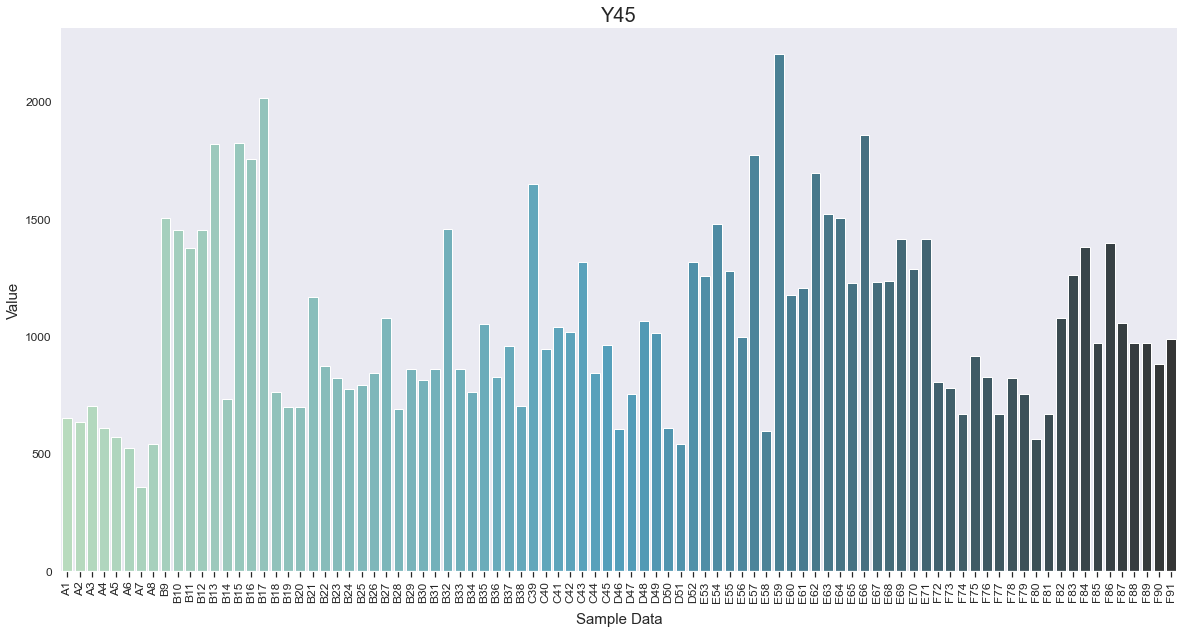

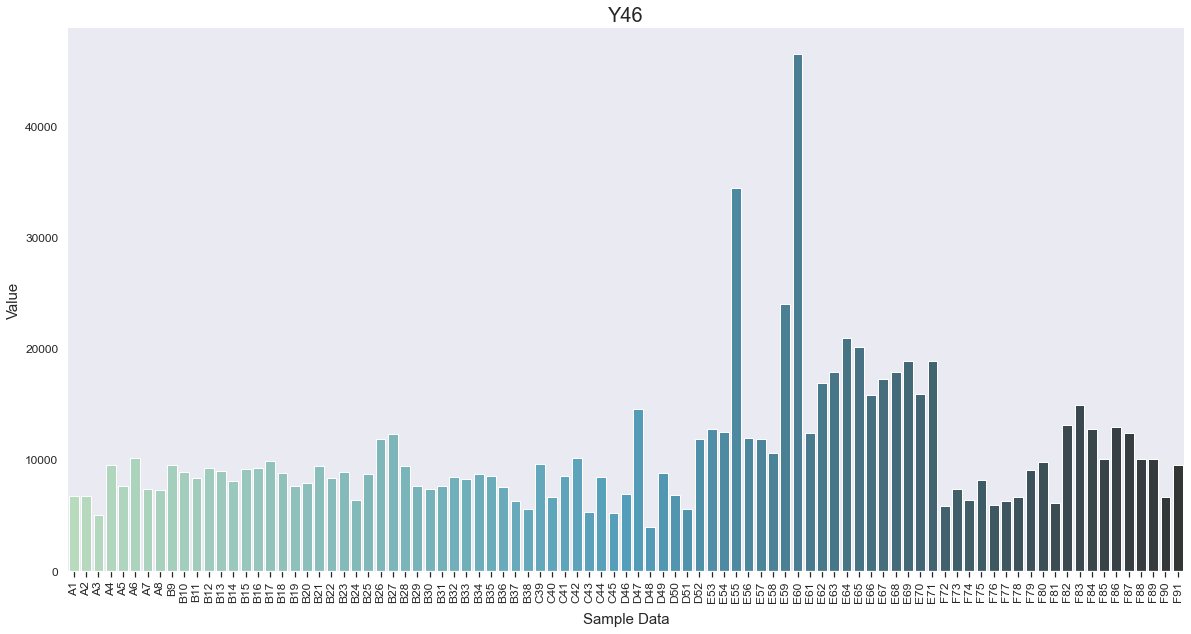

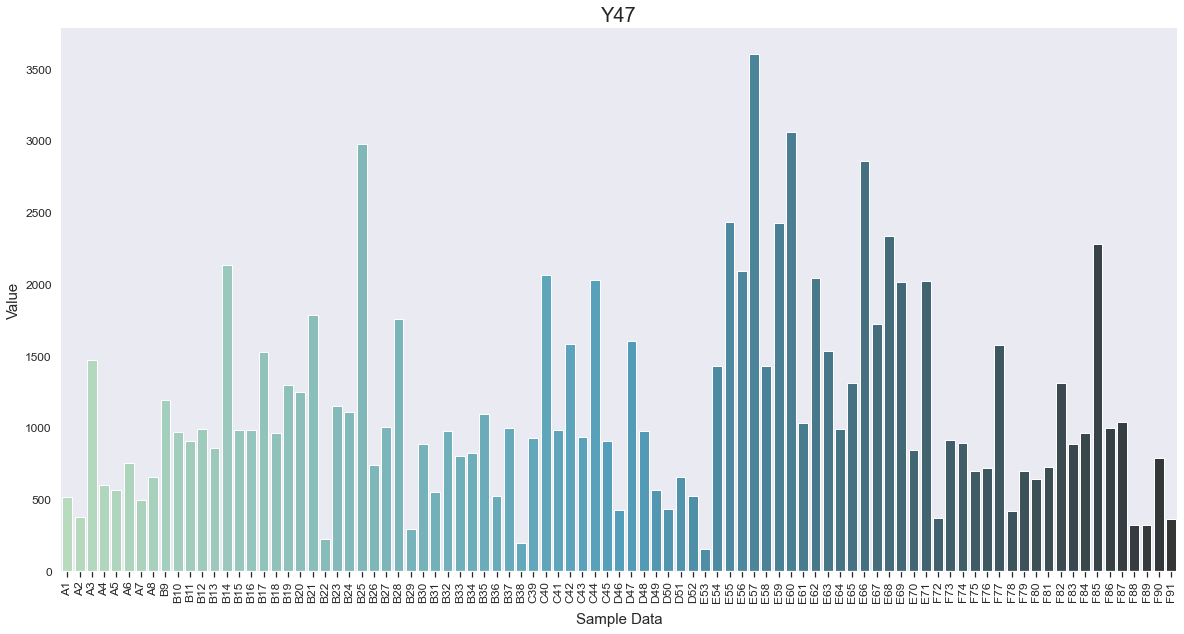

In [344]:
for idx, row in y.iterrows():
    df = pd.DataFrame(row).T
    barplot_noun(df, figsize = (20, 10), palette = "GnBu_d", title = idx)
    plt.savefig('y_histogram' + os.sep + idx + '.png')

In [355]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [356]:
file = '../data_v2/DB(R0_H_R1 211012).xlsx'
X, y = data(file)
X

A1     A2     A3     A4     A5     A6     A7     A8     B9    B10  ...  \
id                                                                        ...   
X1  226.0  226.0  226.0  226.0  226.0  224.5  178.0  229.0  285.4  285.4  ...   
X2  219.0  219.0  219.0  215.0  215.0  213.0  170.0  223.0  274.4  274.4  ...   
X3   36.6   36.6   36.6   36.6   36.6   36.0   28.0   36.6   43.4   43.4  ...   
X4   22.2   22.2   22.2   22.2   22.2   22.3   17.7   23.6   26.0   26.0  ...   
X5   11.8   11.8   11.8   11.8   11.8   11.7   10.2   12.2   12.5   12.5  ...   

      F82    F83    F84    F85    F86    F87    F88    F89    F90    F91  
id                                                                        
X1  336.0  333.0  336.0  336.0  336.0  336.0  336.0  336.0  277.0  336.0  
X2  325.0  320.0  330.0  330.0  330.0  330.0  330.0  330.0  264.5  330.0  
X3   60.0   60.0   60.0   60.0   60.0   60.0   60.0   60.0   46.0   60.0  
X4   29.5   30.5   30.5   29.5   30.5   30.5   29.5   29.5   22.9   29.5  
X5   21.6   22.5   22.5   21.6   22.5   22.5   21.6   21.6   14.9   21.7  

[5 rows x 91 columns]

In [357]:
y

A1     A2     A3       A4       A5       A6       A7       A8      B9  \
id                                                                              
Y1    5714   5842   5841   5960.9   5908.3   5845.0   3413.8   5638.0    9198   
Y2    5044   5167   5399   5143.0   5139.0   5255.0   3744.5   6021.0    7900   
Y3    4942   4932   5076   5062.0   5058.8   4635.0   2940.3   5604.0    8795   
Y4    8123   8058   7564   8704.0   8218.0   7729.0   5955.7   9256.0   11672   
Y5       0      0      0      0.0      0.0      0.0      0.0      0.0    3389   
Y6       0      0      0      0.0      0.0      0.0      0.0      0.0       0   
Y7       0      0      0      0.0      0.0      0.0      0.0      0.0       0   
Y8       0      0      0      0.0      0.0      0.0      0.0      0.0       0   
Y9    2599   2456   2688   2556.0   2544.0   2652.0   2687.9   2380.5    3903   
Y10   1421   1144   1264    896.0    869.1    902.0    683.1   1175.8    2214   
Y11    214    183    238    259.0    253.0     55.0    365.9    248.4     342   
Y12   5274   5857   6171   6348.0   6616.0   5766.1   5178.3   6105.2   11486   
Y13   1558   1274   1127   1868.0   1733.2   2311.7    524.5   1044.3    2744   
Y14    513    486    474    533.0    512.8    534.8    536.0    461.9     930   
Y15   1226   1372   1254   1398.0   1473.0   1395.6   1421.0   1244.1    2362   
Y16   4014   1997   3618   2487.0   2241.8   2397.0    958.6   2123.2    6596   
Y17    878    464    423    496.0    446.0    417.0    314.9    394.6    1368   
Y18    732    496    464    470.0    463.0    468.0    570.1    413.2     526   
Y19   1259    969   1071   1182.0   1450.8   1044.0    198.5   1250.4    1330   
Y20  12263  13025  12461  11822.0  11847.6  12921.0   9129.0  15665.8   29117   
Y21   1413   1378   1437   1138.0   1483.6   1473.0   1147.6   2010.4    3903   
Y22    648    646   1537   1312.0   2223.0    804.0    856.7    744.0    3785   
Y23   6031   4390   4813   3932.0   4125.2   3829.0   2046.3   4223.7   12760   
Y24    622    605    598    513.0    844.5    386.0    403.6    647.8    1406   
Y25  39878  39686  39535  38975.0  37351.4  38524.0  20218.4  40278.7       0   
Y26      0      0      0      0.0      0.0      0.0      0.0      0.0       0   
Y27      0      0      0      0.0      0.0      0.0      0.0      0.0       0   
Y28      0      0      0      0.0      0.0      0.0      0.0      0.0       0   
Y29      0      0      0      0.0      0.0      0.0      0.0      0.0       0   
Y30      0      0      0      0.0      0.0      0.0      0.0      0.0   19621   
Y31      0      0      0      0.0      0.0      0.0      0.0      0.0   37415   
Y32      0      0      0      0.0      0.0      0.0      0.0      0.0   28088   
Y33      0      0      0      0.0      0.0      0.0      0.0      0.0       0   
Y34      0      0      0      0.0      0.0      0.0      0.0      0.0       0   
Y35  81268  80678  81726  83166.0  82911.8  78679.0  40910.7  89129.8       0   
Y36  19867  19714  19713  18703.0  18736.1  18401.0   9603.5  21891.3       0   
Y37      0      0      0      0.0      0.0      0.0      0.0      0.0       0   
Y38  54871  56709  56769  59057.0  58867.7  59467.0  32537.2  60264.4  138381   
Y39   6583   6852   6766   7073.0   7085.0   7146.0   4466.1   8837.5    8513   
Y40   3629   3664   3274   4426.0   4381.0   2798.0      0.0   3893.9    9685   
Y41    768    702    759   1132.0    257.0    544.0    467.6   1121.7     785   
Y42   6944   7836   6412   4047.0   7272.0   1786.0   4196.1   7059.6     300   
Y43      0      0      0      0.0      0.0      0.0      0.0      0.0   17635   
Y44      0      0    300      0.0      0.0      0.0      0.0    197.5       0   
Y45    652    636    705    610.0    574.0    527.0    361.2    542.2    1504   
Y46   6789   6766   5099   9532.0   7681.5  10146.3   7408.0   7352.8    9529   
Y47    522    381   1473    602.0    565.0    757.2    494.5    660.4    1197   

          B10  ...       F82       F83

In [358]:
# scaler = StandardScaler()
# scaled = scaler.fit_transform(X)
# XX = pd.DataFrame(scaled).T
# y = pd.DataFrame(y.iloc[0,:])

In [359]:
X.shape, y.shape

((5, 91), (47, 91))

In [360]:
X = X.T
X = X.astype('int64')
X.dtypes

id
X1    int64
X2    int64
X3    int64
X4    int64
X5    int64
dtype: object

In [361]:
y = y.T
y = y.astype('int64')
y.dtypes

id
Y1     int64
Y2     int64
Y3     int64
Y4     int64
Y5     int64
Y6     int64
Y7     int64
Y8     int64
Y9     int64
Y10    int64
Y11    int64
Y12    int64
Y13    int64
Y14    int64
Y15    int64
Y16    int64
Y17    int64
Y18    int64
Y19    int64
Y20    int64
Y21    int64
Y22    int64
Y23    int64
Y24    int64
Y25    int64
Y26    int64
Y27    int64
Y28    int64
Y29    int64
Y30    int64
Y31    int64
Y32    int64
Y33    int64
Y34    int64
Y35    int64
Y36    int64
Y37    int64
Y38    int64
Y39    int64
Y40    int64
Y41    int64
Y42    int64
Y43    int64
Y44    int64
Y45    int64
Y46    int64
Y47    int64
dtype: object

In [362]:
y['Y1']

A1      5714
A2      5842
A3      5841
A4      5960
A5      5908
       ...  
F87    14204
F88    13676
F89    13676
F90     9505
F91    13459
Name: Y1, Length: 91, dtype: int64

In [363]:
df = pd.concat([X,y['Y6']], axis=1, join='inner')
print(df)
print(np.where(np.isnan(df)))

      X1   X2  X3  X4  X5  Y6
A1   226  219  36  22  11   0
A2   226  219  36  22  11   0
A3   226  219  36  22  11   0
A4   226  215  36  22  11   0
A5   226  215  36  22  11   0
..   ...  ...  ..  ..  ..  ..
F87  336  330  60  30  22   0
F88  336  330  60  29  21   0
F89  336  330  60  29  21   0
F90  277  264  46  22  14   0
F91  336  330  60  29  21   0

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


df1       X1   X2  X3  X4  X5     Y1
A1   226  219  36  22  11   5714
A2   226  219  36  22  11   5842
A3   226  219  36  22  11   5841
A4   226  215  36  22  11   5960
A5   226  215  36  22  11   5908
..   ...  ...  ..  ..  ..    ...
F87  336  330  60  30  22  14204
F88  336  330  60  29  21  13676
F89  336  330  60  29  21  13676
F90  277  264  46  22  14   9505
F91  336  330  60  29  21  13459

[91 rows x 6 columns]
corr1       X1   X2  X3  X4  X5     Y1
A1   226  219  36  22  11   5714
A2   226  219  36  22  11   5842
A3   226  219  36  22  11   5841
A4   226  215  36  22  11   5960
A5   226  215  36  22  11   5908
..   ...  ...  ..  ..  ..    ...
F87  336  330  60  30  22  14204
F88  336  330  60  29  21  13676
F89  336  330  60  29  21  13676
F90  277  264  46  22  14   9505
F91  336  330  60  29  21  13459

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


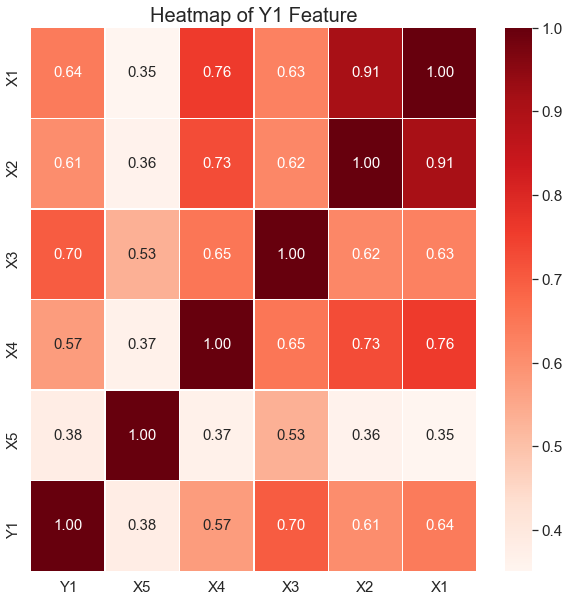

df2       X1   X2  X3  X4  X5     Y2
A1   226  219  36  22  11   5044
A2   226  219  36  22  11   5167
A3   226  219  36  22  11   5399
A4   226  215  36  22  11   5143
A5   226  215  36  22  11   5139
..   ...  ...  ..  ..  ..    ...
F87  336  330  60  30  22  16998
F88  336  330  60  29  21  16441
F89  336  330  60  29  21  16452
F90  277  264  46  22  14  11485
F91  336  330  60  29  21  16300

[91 rows x 6 columns]
corr2       X1   X2  X3  X4  X5     Y2
A1   226  219  36  22  11   5044
A2   226  219  36  22  11   5167
A3   226  219  36  22  11   5399
A4   226  215  36  22  11   5143
A5   226  215  36  22  11   5139
..   ...  ...  ..  ..  ..    ...
F87  336  330  60  30  22  16998
F88  336  330  60  29  21  16441
F89  336  330  60  29  21  16452
F90  277  264  46  22  14  11485
F91  336  330  60  29  21  16300

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


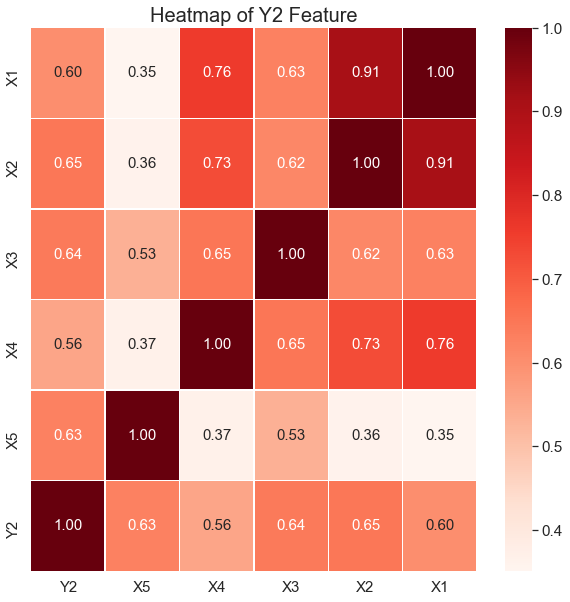

df3       X1   X2  X3  X4  X5    Y3
A1   226  219  36  22  11  4942
A2   226  219  36  22  11  4932
A3   226  219  36  22  11  5076
A4   226  215  36  22  11  5062
A5   226  215  36  22  11  5058
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  5900
F88  336  330  60  29  21  5834
F89  336  330  60  29  21  5845
F90  277  264  46  22  14  5756
F91  336  330  60  29  21  5742

[91 rows x 6 columns]
corr3       X1   X2  X3  X4  X5    Y3
A1   226  219  36  22  11  4942
A2   226  219  36  22  11  4932
A3   226  219  36  22  11  5076
A4   226  215  36  22  11  5062
A5   226  215  36  22  11  5058
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  5900
F88  336  330  60  29  21  5834
F89  336  330  60  29  21  5845
F90  277  264  46  22  14  5756
F91  336  330  60  29  21  5742

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


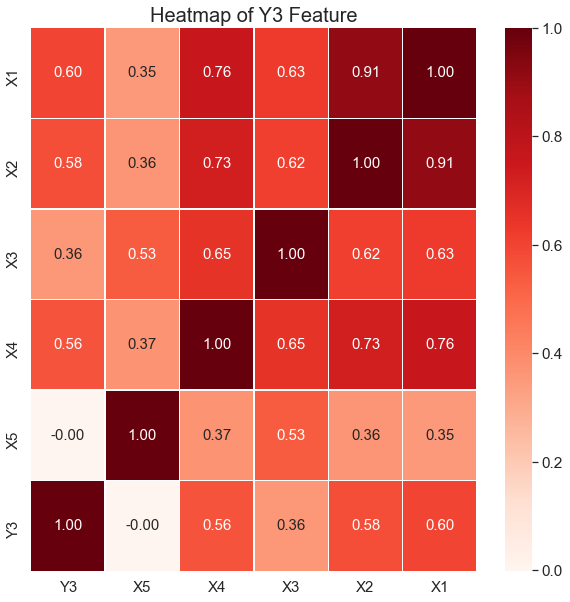

df4       X1   X2  X3  X4  X5     Y4
A1   226  219  36  22  11   8123
A2   226  219  36  22  11   8058
A3   226  219  36  22  11   7564
A4   226  215  36  22  11   8704
A5   226  215  36  22  11   8218
..   ...  ...  ..  ..  ..    ...
F87  336  330  60  30  22  17708
F88  336  330  60  29  21  17766
F89  336  330  60  29  21  17766
F90  277  264  46  22  14  15199
F91  336  330  60  29  21  17548

[91 rows x 6 columns]
corr4       X1   X2  X3  X4  X5     Y4
A1   226  219  36  22  11   8123
A2   226  219  36  22  11   8058
A3   226  219  36  22  11   7564
A4   226  215  36  22  11   8704
A5   226  215  36  22  11   8218
..   ...  ...  ..  ..  ..    ...
F87  336  330  60  30  22  17708
F88  336  330  60  29  21  17766
F89  336  330  60  29  21  17766
F90  277  264  46  22  14  15199
F91  336  330  60  29  21  17548

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


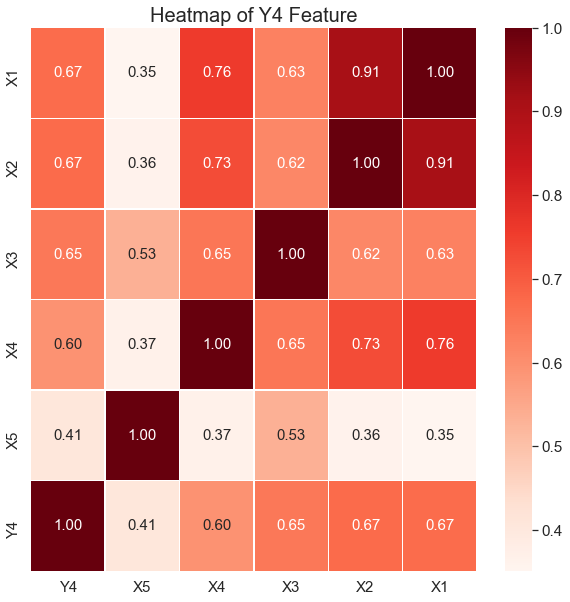

df5       X1   X2  X3  X4  X5  Y5
A1   226  219  36  22  11   0
A2   226  219  36  22  11   0
A3   226  219  36  22  11   0
A4   226  215  36  22  11   0
A5   226  215  36  22  11   0
..   ...  ...  ..  ..  ..  ..
F87  336  330  60  30  22   0
F88  336  330  60  29  21   0
F89  336  330  60  29  21   0
F90  277  264  46  22  14   0
F91  336  330  60  29  21   0

[91 rows x 6 columns]
corr5       X1   X2  X3  X4  X5  Y5
A1   226  219  36  22  11   0
A2   226  219  36  22  11   0
A3   226  219  36  22  11   0
A4   226  215  36  22  11   0
A5   226  215  36  22  11   0
..   ...  ...  ..  ..  ..  ..
F87  336  330  60  30  22   0
F88  336  330  60  29  21   0
F89  336  330  60  29  21   0
F90  277  264  46  22  14   0
F91  336  330  60  29  21   0

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


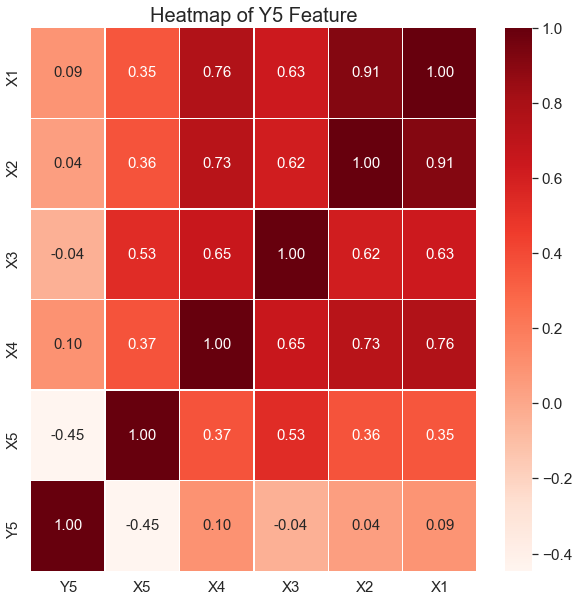

df6       X1   X2  X3  X4  X5  Y6
A1   226  219  36  22  11   0
A2   226  219  36  22  11   0
A3   226  219  36  22  11   0
A4   226  215  36  22  11   0
A5   226  215  36  22  11   0
..   ...  ...  ..  ..  ..  ..
F87  336  330  60  30  22   0
F88  336  330  60  29  21   0
F89  336  330  60  29  21   0
F90  277  264  46  22  14   0
F91  336  330  60  29  21   0

[91 rows x 6 columns]
corr6       X1   X2  X3  X4  X5  Y6
A1   226  219  36  22  11   0
A2   226  219  36  22  11   0
A3   226  219  36  22  11   0
A4   226  215  36  22  11   0
A5   226  215  36  22  11   0
..   ...  ...  ..  ..  ..  ..
F87  336  330  60  30  22   0
F88  336  330  60  29  21   0
F89  336  330  60  29  21   0
F90  277  264  46  22  14   0
F91  336  330  60  29  21   0

[91 rows x 6 columns]
(array([0, 1, 2, 3, 4, 5, 5, 5, 5, 5], dtype=int64), array([5, 5, 5, 5, 5, 0, 1, 2, 3, 4], dtype=int64))


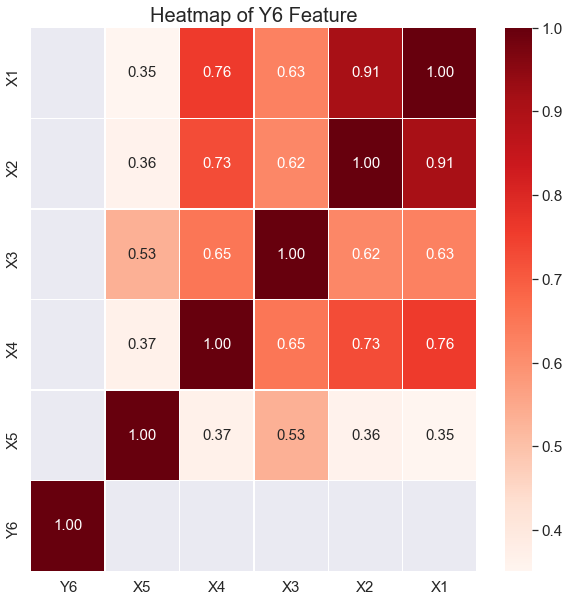

df7       X1   X2  X3  X4  X5  Y7
A1   226  219  36  22  11   0
A2   226  219  36  22  11   0
A3   226  219  36  22  11   0
A4   226  215  36  22  11   0
A5   226  215  36  22  11   0
..   ...  ...  ..  ..  ..  ..
F87  336  330  60  30  22   0
F88  336  330  60  29  21   0
F89  336  330  60  29  21   0
F90  277  264  46  22  14   0
F91  336  330  60  29  21   0

[91 rows x 6 columns]
corr7       X1   X2  X3  X4  X5  Y7
A1   226  219  36  22  11   0
A2   226  219  36  22  11   0
A3   226  219  36  22  11   0
A4   226  215  36  22  11   0
A5   226  215  36  22  11   0
..   ...  ...  ..  ..  ..  ..
F87  336  330  60  30  22   0
F88  336  330  60  29  21   0
F89  336  330  60  29  21   0
F90  277  264  46  22  14   0
F91  336  330  60  29  21   0

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


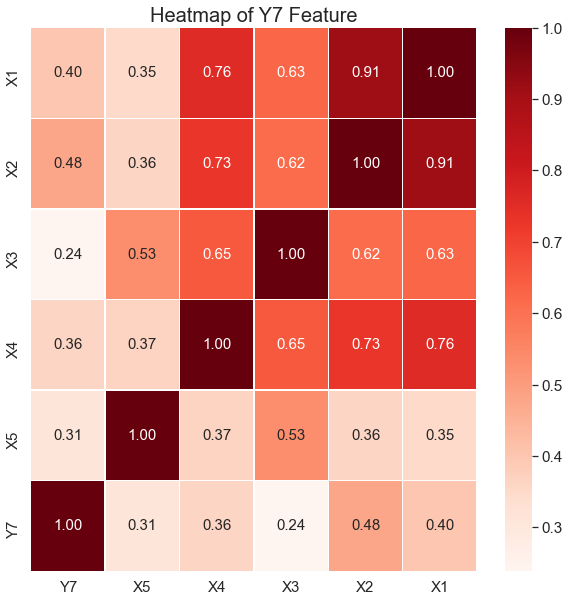

df8       X1   X2  X3  X4  X5  Y8
A1   226  219  36  22  11   0
A2   226  219  36  22  11   0
A3   226  219  36  22  11   0
A4   226  215  36  22  11   0
A5   226  215  36  22  11   0
..   ...  ...  ..  ..  ..  ..
F87  336  330  60  30  22   0
F88  336  330  60  29  21   0
F89  336  330  60  29  21   0
F90  277  264  46  22  14   0
F91  336  330  60  29  21   0

[91 rows x 6 columns]
corr8       X1   X2  X3  X4  X5  Y8
A1   226  219  36  22  11   0
A2   226  219  36  22  11   0
A3   226  219  36  22  11   0
A4   226  215  36  22  11   0
A5   226  215  36  22  11   0
..   ...  ...  ..  ..  ..  ..
F87  336  330  60  30  22   0
F88  336  330  60  29  21   0
F89  336  330  60  29  21   0
F90  277  264  46  22  14   0
F91  336  330  60  29  21   0

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


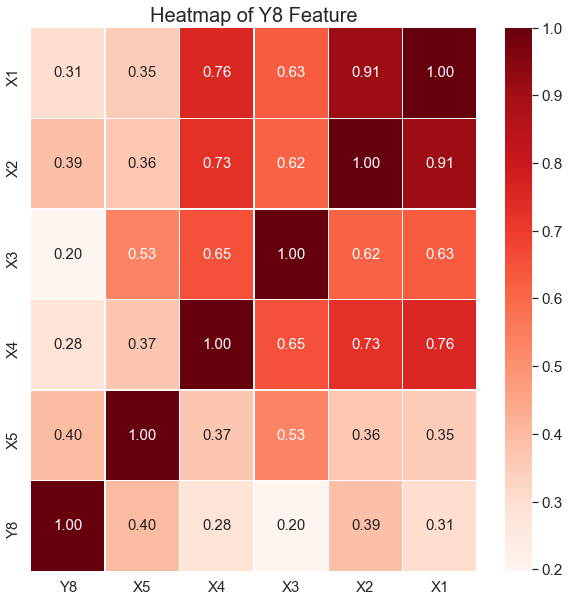

df9       X1   X2  X3  X4  X5    Y9
A1   226  219  36  22  11  2599
A2   226  219  36  22  11  2456
A3   226  219  36  22  11  2688
A4   226  215  36  22  11  2556
A5   226  215  36  22  11  2544
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  4351
F88  336  330  60  29  21  4088
F89  336  330  60  29  21  4088
F90  277  264  46  22  14  5194
F91  336  330  60  29  21  3959

[91 rows x 6 columns]
corr9       X1   X2  X3  X4  X5    Y9
A1   226  219  36  22  11  2599
A2   226  219  36  22  11  2456
A3   226  219  36  22  11  2688
A4   226  215  36  22  11  2556
A5   226  215  36  22  11  2544
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  4351
F88  336  330  60  29  21  4088
F89  336  330  60  29  21  4088
F90  277  264  46  22  14  5194
F91  336  330  60  29  21  3959

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


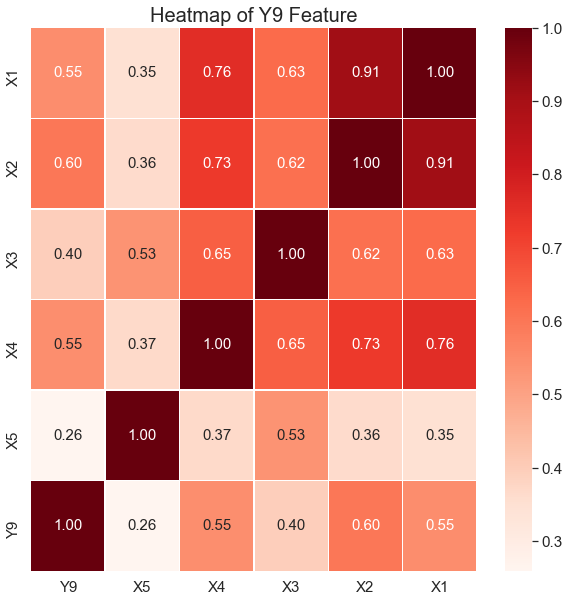

df10       X1   X2  X3  X4  X5   Y10
A1   226  219  36  22  11  1421
A2   226  219  36  22  11  1144
A3   226  219  36  22  11  1264
A4   226  215  36  22  11   896
A5   226  215  36  22  11   869
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  1619
F88  336  330  60  29  21  1606
F89  336  330  60  29  21  1606
F90  277  264  46  22  14  2265
F91  336  330  60  29  21  1813

[91 rows x 6 columns]
corr10       X1   X2  X3  X4  X5   Y10
A1   226  219  36  22  11  1421
A2   226  219  36  22  11  1144
A3   226  219  36  22  11  1264
A4   226  215  36  22  11   896
A5   226  215  36  22  11   869
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  1619
F88  336  330  60  29  21  1606
F89  336  330  60  29  21  1606
F90  277  264  46  22  14  2265
F91  336  330  60  29  21  1813

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


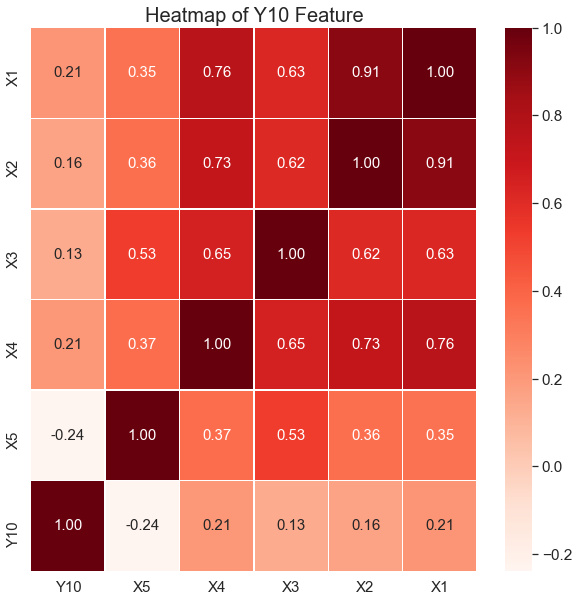

df11       X1   X2  X3  X4  X5  Y11
A1   226  219  36  22  11  214
A2   226  219  36  22  11  183
A3   226  219  36  22  11  238
A4   226  215  36  22  11  259
A5   226  215  36  22  11  253
..   ...  ...  ..  ..  ..  ...
F87  336  330  60  30  22  840
F88  336  330  60  29  21  734
F89  336  330  60  29  21  734
F90  277  264  46  22  14  405
F91  336  330  60  29  21  973

[91 rows x 6 columns]
corr11       X1   X2  X3  X4  X5  Y11
A1   226  219  36  22  11  214
A2   226  219  36  22  11  183
A3   226  219  36  22  11  238
A4   226  215  36  22  11  259
A5   226  215  36  22  11  253
..   ...  ...  ..  ..  ..  ...
F87  336  330  60  30  22  840
F88  336  330  60  29  21  734
F89  336  330  60  29  21  734
F90  277  264  46  22  14  405
F91  336  330  60  29  21  973

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


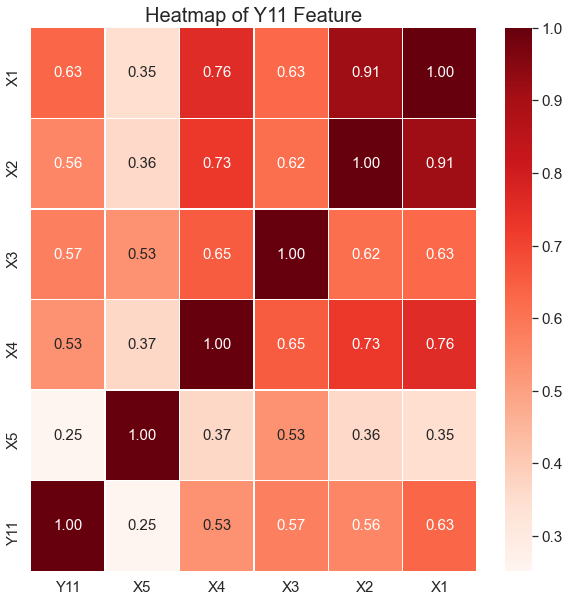

df12       X1   X2  X3  X4  X5   Y12
A1   226  219  36  22  11  5274
A2   226  219  36  22  11  5857
A3   226  219  36  22  11  6171
A4   226  215  36  22  11  6348
A5   226  215  36  22  11  6616
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  8975
F88  336  330  60  29  21  7304
F89  336  330  60  29  21  7304
F90  277  264  46  22  14  9549
F91  336  330  60  29  21  7491

[91 rows x 6 columns]
corr12       X1   X2  X3  X4  X5   Y12
A1   226  219  36  22  11  5274
A2   226  219  36  22  11  5857
A3   226  219  36  22  11  6171
A4   226  215  36  22  11  6348
A5   226  215  36  22  11  6616
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  8975
F88  336  330  60  29  21  7304
F89  336  330  60  29  21  7304
F90  277  264  46  22  14  9549
F91  336  330  60  29  21  7491

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


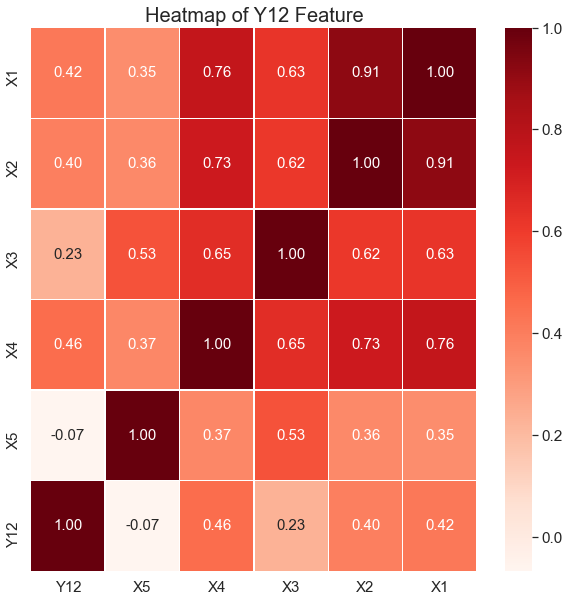

df13       X1   X2  X3  X4  X5   Y13
A1   226  219  36  22  11  1558
A2   226  219  36  22  11  1274
A3   226  219  36  22  11  1127
A4   226  215  36  22  11  1868
A5   226  215  36  22  11  1733
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  2619
F88  336  330  60  29  21  1971
F89  336  330  60  29  21  1971
F90  277  264  46  22  14  3426
F91  336  330  60  29  21  2367

[91 rows x 6 columns]
corr13       X1   X2  X3  X4  X5   Y13
A1   226  219  36  22  11  1558
A2   226  219  36  22  11  1274
A3   226  219  36  22  11  1127
A4   226  215  36  22  11  1868
A5   226  215  36  22  11  1733
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  2619
F88  336  330  60  29  21  1971
F89  336  330  60  29  21  1971
F90  277  264  46  22  14  3426
F91  336  330  60  29  21  2367

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


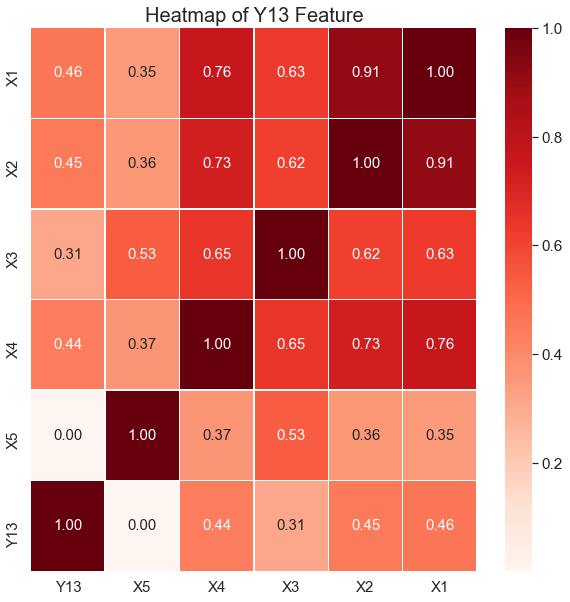

df14       X1   X2  X3  X4  X5   Y14
A1   226  219  36  22  11   513
A2   226  219  36  22  11   486
A3   226  219  36  22  11   474
A4   226  215  36  22  11   533
A5   226  215  36  22  11   512
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22   726
F88  336  330  60  29  21   587
F89  336  330  60  29  21   572
F90  277  264  46  22  14  1005
F91  336  330  60  29  21   669

[91 rows x 6 columns]
corr14       X1   X2  X3  X4  X5   Y14
A1   226  219  36  22  11   513
A2   226  219  36  22  11   486
A3   226  219  36  22  11   474
A4   226  215  36  22  11   533
A5   226  215  36  22  11   512
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22   726
F88  336  330  60  29  21   587
F89  336  330  60  29  21   572
F90  277  264  46  22  14  1005
F91  336  330  60  29  21   669

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


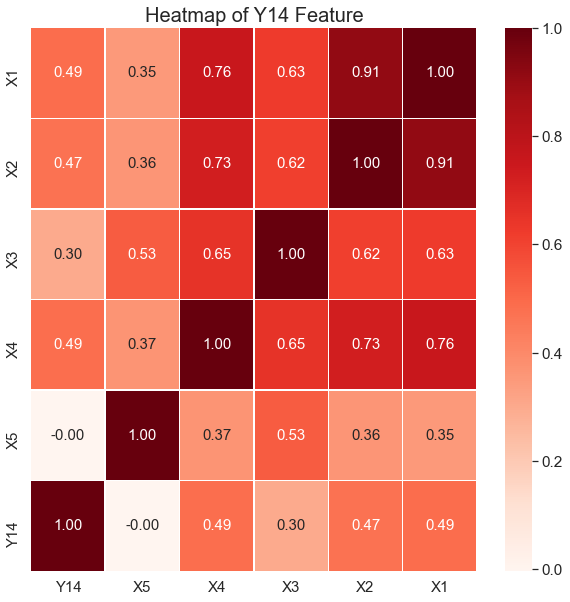

df15       X1   X2  X3  X4  X5   Y15
A1   226  219  36  22  11  1226
A2   226  219  36  22  11  1372
A3   226  219  36  22  11  1254
A4   226  215  36  22  11  1398
A5   226  215  36  22  11  1473
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  1986
F88  336  330  60  29  21  1374
F89  336  330  60  29  21  1374
F90  277  264  46  22  14  1741
F91  336  330  60  29  21  1488

[91 rows x 6 columns]
corr15       X1   X2  X3  X4  X5   Y15
A1   226  219  36  22  11  1226
A2   226  219  36  22  11  1372
A3   226  219  36  22  11  1254
A4   226  215  36  22  11  1398
A5   226  215  36  22  11  1473
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  1986
F88  336  330  60  29  21  1374
F89  336  330  60  29  21  1374
F90  277  264  46  22  14  1741
F91  336  330  60  29  21  1488

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


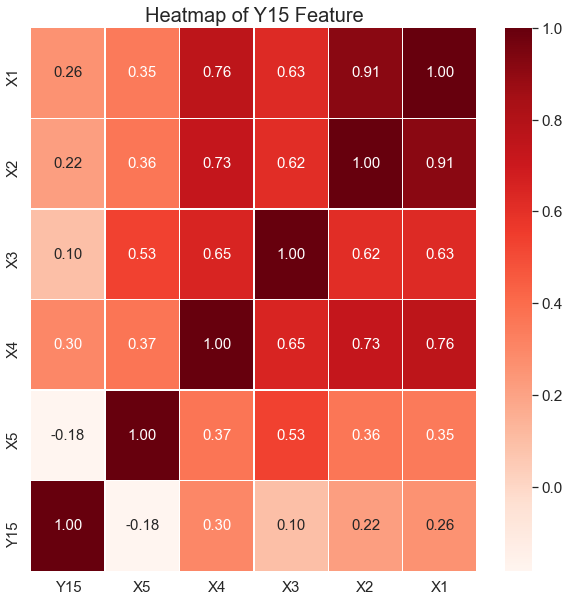

df16       X1   X2  X3  X4  X5   Y16
A1   226  219  36  22  11  4014
A2   226  219  36  22  11  1997
A3   226  219  36  22  11  3618
A4   226  215  36  22  11  2487
A5   226  215  36  22  11  2241
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  4175
F88  336  330  60  29  21  5287
F89  336  330  60  29  21  5291
F90  277  264  46  22  14  7161
F91  336  330  60  29  21  5290

[91 rows x 6 columns]
corr16       X1   X2  X3  X4  X5   Y16
A1   226  219  36  22  11  4014
A2   226  219  36  22  11  1997
A3   226  219  36  22  11  3618
A4   226  215  36  22  11  2487
A5   226  215  36  22  11  2241
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  4175
F88  336  330  60  29  21  5287
F89  336  330  60  29  21  5291
F90  277  264  46  22  14  7161
F91  336  330  60  29  21  5290

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


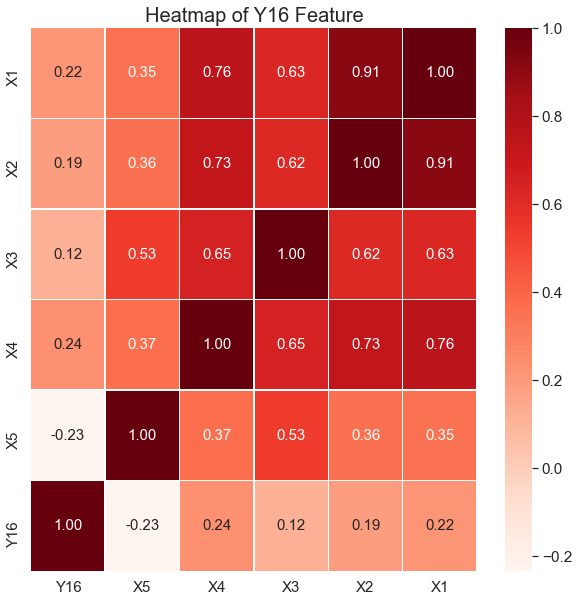

df17       X1   X2  X3  X4  X5   Y17
A1   226  219  36  22  11   878
A2   226  219  36  22  11   464
A3   226  219  36  22  11   423
A4   226  215  36  22  11   496
A5   226  215  36  22  11   446
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22   778
F88  336  330  60  29  21   912
F89  336  330  60  29  21   912
F90  277  264  46  22  14   946
F91  336  330  60  29  21  1027

[91 rows x 6 columns]
corr17       X1   X2  X3  X4  X5   Y17
A1   226  219  36  22  11   878
A2   226  219  36  22  11   464
A3   226  219  36  22  11   423
A4   226  215  36  22  11   496
A5   226  215  36  22  11   446
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22   778
F88  336  330  60  29  21   912
F89  336  330  60  29  21   912
F90  277  264  46  22  14   946
F91  336  330  60  29  21  1027

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


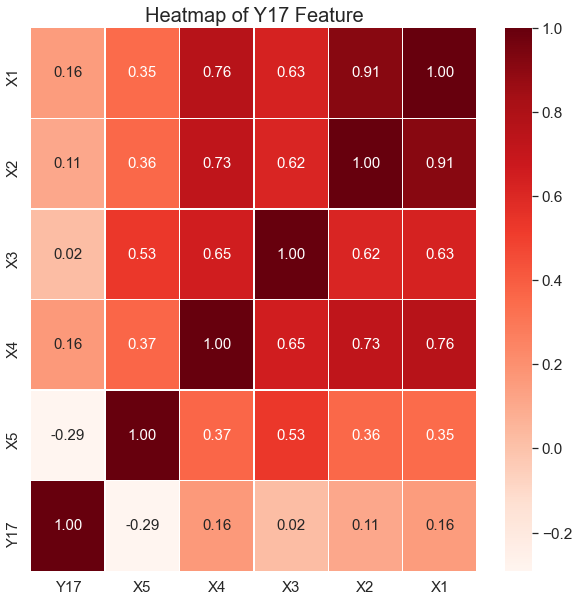

df18       X1   X2  X3  X4  X5   Y18
A1   226  219  36  22  11   732
A2   226  219  36  22  11   496
A3   226  219  36  22  11   464
A4   226  215  36  22  11   470
A5   226  215  36  22  11   463
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  2630
F88  336  330  60  29  21  2151
F89  336  330  60  29  21  2151
F90  277  264  46  22  14   888
F91  336  330  60  29  21  2284

[91 rows x 6 columns]
corr18       X1   X2  X3  X4  X5   Y18
A1   226  219  36  22  11   732
A2   226  219  36  22  11   496
A3   226  219  36  22  11   464
A4   226  215  36  22  11   470
A5   226  215  36  22  11   463
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  2630
F88  336  330  60  29  21  2151
F89  336  330  60  29  21  2151
F90  277  264  46  22  14   888
F91  336  330  60  29  21  2284

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


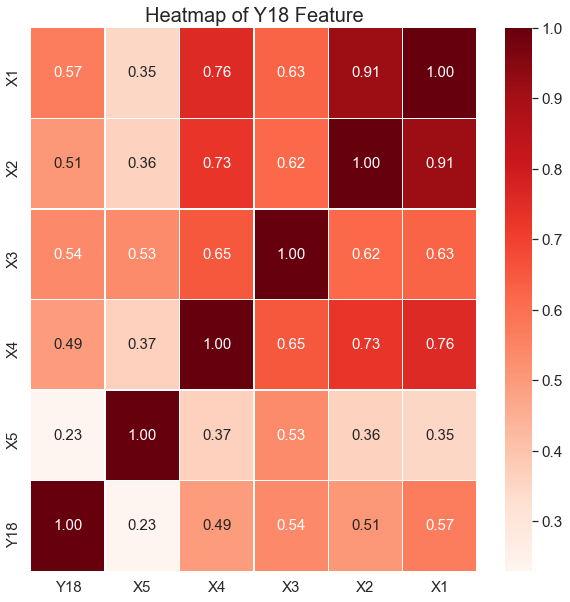

df19       X1   X2  X3  X4  X5   Y19
A1   226  219  36  22  11  1259
A2   226  219  36  22  11   969
A3   226  219  36  22  11  1071
A4   226  215  36  22  11  1182
A5   226  215  36  22  11  1450
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  2295
F88  336  330  60  29  21  1427
F89  336  330  60  29  21  1440
F90  277  264  46  22  14  2247
F91  336  330  60  29  21  1739

[91 rows x 6 columns]
corr19       X1   X2  X3  X4  X5   Y19
A1   226  219  36  22  11  1259
A2   226  219  36  22  11   969
A3   226  219  36  22  11  1071
A4   226  215  36  22  11  1182
A5   226  215  36  22  11  1450
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  2295
F88  336  330  60  29  21  1427
F89  336  330  60  29  21  1440
F90  277  264  46  22  14  2247
F91  336  330  60  29  21  1739

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


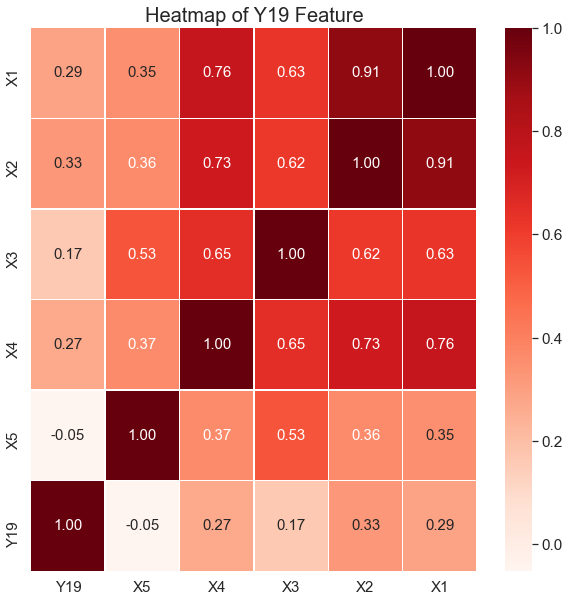

df20       X1   X2  X3  X4  X5    Y20
A1   226  219  36  22  11  12263
A2   226  219  36  22  11  13025
A3   226  219  36  22  11  12461
A4   226  215  36  22  11  11822
A5   226  215  36  22  11  11847
..   ...  ...  ..  ..  ..    ...
F87  336  330  60  30  22  17518
F88  336  330  60  29  21  18411
F89  336  330  60  29  21  18805
F90  277  264  46  22  14  26851
F91  336  330  60  29  21  18145

[91 rows x 6 columns]
corr20       X1   X2  X3  X4  X5    Y20
A1   226  219  36  22  11  12263
A2   226  219  36  22  11  13025
A3   226  219  36  22  11  12461
A4   226  215  36  22  11  11822
A5   226  215  36  22  11  11847
..   ...  ...  ..  ..  ..    ...
F87  336  330  60  30  22  17518
F88  336  330  60  29  21  18411
F89  336  330  60  29  21  18805
F90  277  264  46  22  14  26851
F91  336  330  60  29  21  18145

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


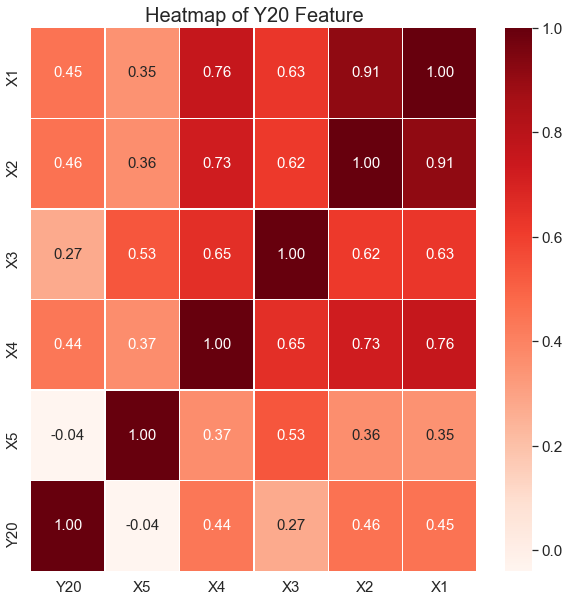

df21       X1   X2  X3  X4  X5   Y21
A1   226  219  36  22  11  1413
A2   226  219  36  22  11  1378
A3   226  219  36  22  11  1437
A4   226  215  36  22  11  1138
A5   226  215  36  22  11  1483
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  2490
F88  336  330  60  29  21  2510
F89  336  330  60  29  21  2813
F90  277  264  46  22  14  3689
F91  336  330  60  29  21  3004

[91 rows x 6 columns]
corr21       X1   X2  X3  X4  X5   Y21
A1   226  219  36  22  11  1413
A2   226  219  36  22  11  1378
A3   226  219  36  22  11  1437
A4   226  215  36  22  11  1138
A5   226  215  36  22  11  1483
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  2490
F88  336  330  60  29  21  2510
F89  336  330  60  29  21  2813
F90  277  264  46  22  14  3689
F91  336  330  60  29  21  3004

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


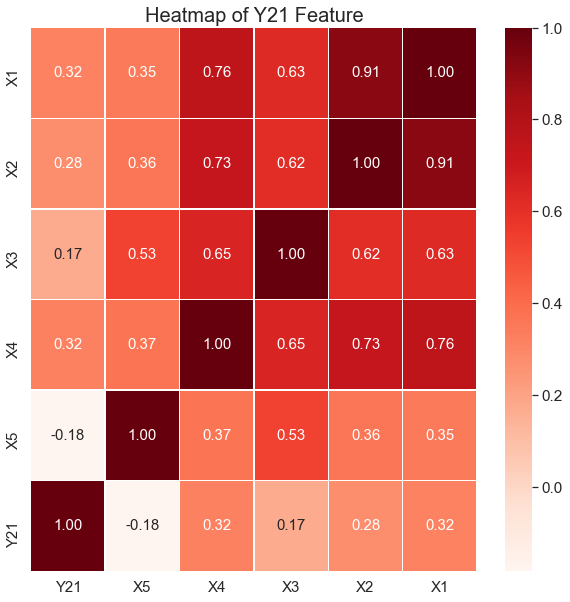

df22       X1   X2  X3  X4  X5   Y22
A1   226  219  36  22  11   648
A2   226  219  36  22  11   646
A3   226  219  36  22  11  1537
A4   226  215  36  22  11  1312
A5   226  215  36  22  11  2223
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  3476
F88  336  330  60  29  21  1858
F89  336  330  60  29  21  1313
F90  277  264  46  22  14  3044
F91  336  330  60  29  21  1794

[91 rows x 6 columns]
corr22       X1   X2  X3  X4  X5   Y22
A1   226  219  36  22  11   648
A2   226  219  36  22  11   646
A3   226  219  36  22  11  1537
A4   226  215  36  22  11  1312
A5   226  215  36  22  11  2223
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  3476
F88  336  330  60  29  21  1858
F89  336  330  60  29  21  1313
F90  277  264  46  22  14  3044
F91  336  330  60  29  21  1794

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


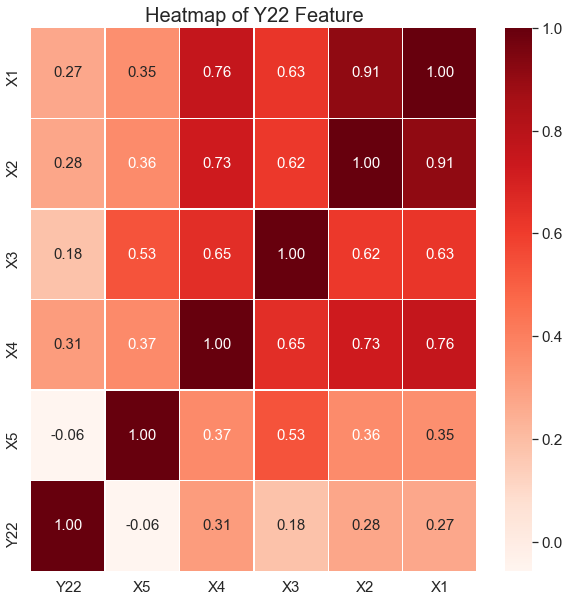

df23       X1   X2  X3  X4  X5    Y23
A1   226  219  36  22  11   6031
A2   226  219  36  22  11   4390
A3   226  219  36  22  11   4813
A4   226  215  36  22  11   3932
A5   226  215  36  22  11   4125
..   ...  ...  ..  ..  ..    ...
F87  336  330  60  30  22   3175
F88  336  330  60  29  21   7804
F89  336  330  60  29  21   7803
F90  277  264  46  22  14  15481
F91  336  330  60  29  21   9238

[91 rows x 6 columns]
corr23       X1   X2  X3  X4  X5    Y23
A1   226  219  36  22  11   6031
A2   226  219  36  22  11   4390
A3   226  219  36  22  11   4813
A4   226  215  36  22  11   3932
A5   226  215  36  22  11   4125
..   ...  ...  ..  ..  ..    ...
F87  336  330  60  30  22   3175
F88  336  330  60  29  21   7804
F89  336  330  60  29  21   7803
F90  277  264  46  22  14  15481
F91  336  330  60  29  21   9238

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


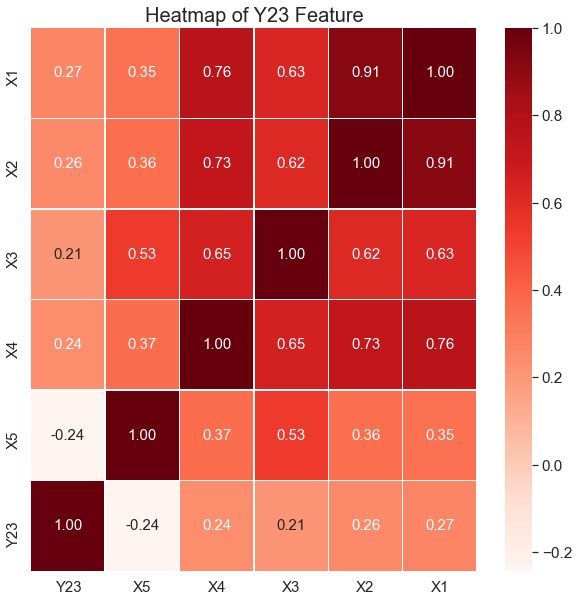

df24       X1   X2  X3  X4  X5   Y24
A1   226  219  36  22  11   622
A2   226  219  36  22  11   605
A3   226  219  36  22  11   598
A4   226  215  36  22  11   513
A5   226  215  36  22  11   844
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22   526
F88  336  330  60  29  21   816
F89  336  330  60  29  21   530
F90  277  264  46  22  14  6170
F91  336  330  60  29  21   423

[91 rows x 6 columns]
corr24       X1   X2  X3  X4  X5   Y24
A1   226  219  36  22  11   622
A2   226  219  36  22  11   605
A3   226  219  36  22  11   598
A4   226  215  36  22  11   513
A5   226  215  36  22  11   844
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22   526
F88  336  330  60  29  21   816
F89  336  330  60  29  21   530
F90  277  264  46  22  14  6170
F91  336  330  60  29  21   423

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


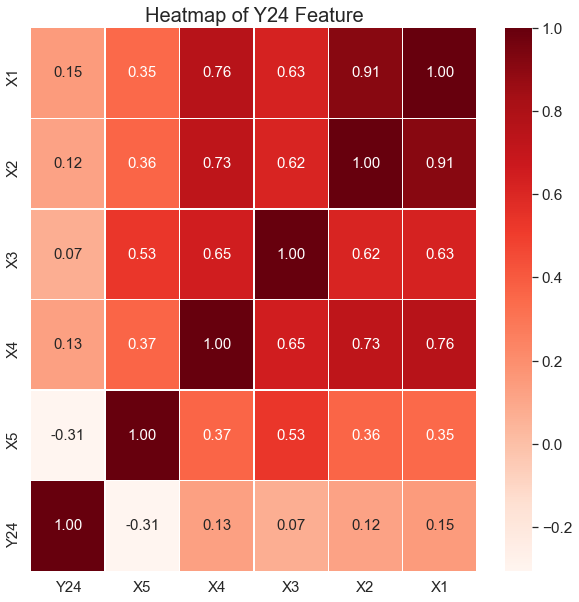

df25       X1   X2  X3  X4  X5    Y25
A1   226  219  36  22  11  39878
A2   226  219  36  22  11  39686
A3   226  219  36  22  11  39535
A4   226  215  36  22  11  38975
A5   226  215  36  22  11  37351
..   ...  ...  ..  ..  ..    ...
F87  336  330  60  30  22      0
F88  336  330  60  29  21      0
F89  336  330  60  29  21      0
F90  277  264  46  22  14      0
F91  336  330  60  29  21      0

[91 rows x 6 columns]
corr25       X1   X2  X3  X4  X5    Y25
A1   226  219  36  22  11  39878
A2   226  219  36  22  11  39686
A3   226  219  36  22  11  39535
A4   226  215  36  22  11  38975
A5   226  215  36  22  11  37351
..   ...  ...  ..  ..  ..    ...
F87  336  330  60  30  22      0
F88  336  330  60  29  21      0
F89  336  330  60  29  21      0
F90  277  264  46  22  14      0
F91  336  330  60  29  21      0

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


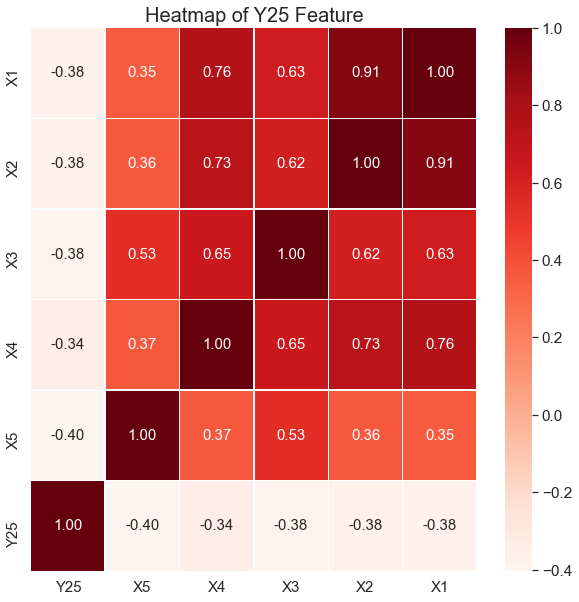

df26       X1   X2  X3  X4  X5  Y26
A1   226  219  36  22  11    0
A2   226  219  36  22  11    0
A3   226  219  36  22  11    0
A4   226  215  36  22  11    0
A5   226  215  36  22  11    0
..   ...  ...  ..  ..  ..  ...
F87  336  330  60  30  22    0
F88  336  330  60  29  21    0
F89  336  330  60  29  21    0
F90  277  264  46  22  14    0
F91  336  330  60  29  21    0

[91 rows x 6 columns]
corr26       X1   X2  X3  X4  X5  Y26
A1   226  219  36  22  11    0
A2   226  219  36  22  11    0
A3   226  219  36  22  11    0
A4   226  215  36  22  11    0
A5   226  215  36  22  11    0
..   ...  ...  ..  ..  ..  ...
F87  336  330  60  30  22    0
F88  336  330  60  29  21    0
F89  336  330  60  29  21    0
F90  277  264  46  22  14    0
F91  336  330  60  29  21    0

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


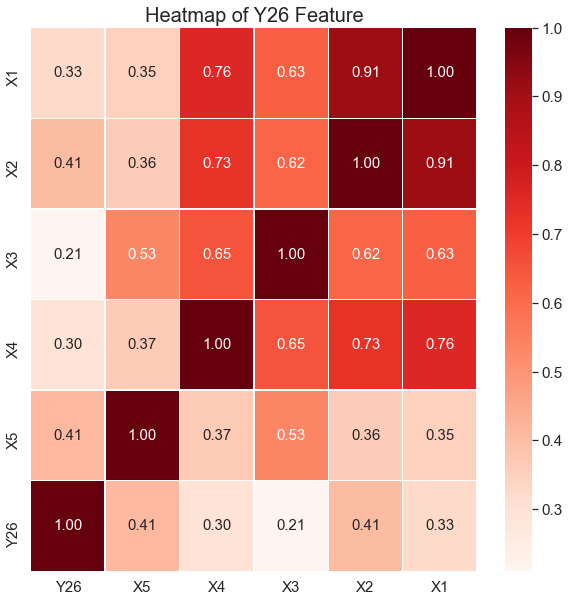

df27       X1   X2  X3  X4  X5  Y27
A1   226  219  36  22  11    0
A2   226  219  36  22  11    0
A3   226  219  36  22  11    0
A4   226  215  36  22  11    0
A5   226  215  36  22  11    0
..   ...  ...  ..  ..  ..  ...
F87  336  330  60  30  22    0
F88  336  330  60  29  21    0
F89  336  330  60  29  21    0
F90  277  264  46  22  14    0
F91  336  330  60  29  21    0

[91 rows x 6 columns]
corr27       X1   X2  X3  X4  X5  Y27
A1   226  219  36  22  11    0
A2   226  219  36  22  11    0
A3   226  219  36  22  11    0
A4   226  215  36  22  11    0
A5   226  215  36  22  11    0
..   ...  ...  ..  ..  ..  ...
F87  336  330  60  30  22    0
F88  336  330  60  29  21    0
F89  336  330  60  29  21    0
F90  277  264  46  22  14    0
F91  336  330  60  29  21    0

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


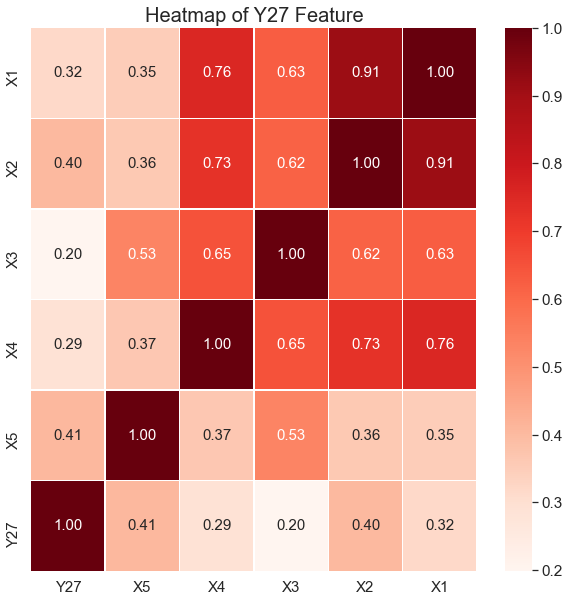

df28       X1   X2  X3  X4  X5  Y28
A1   226  219  36  22  11    0
A2   226  219  36  22  11    0
A3   226  219  36  22  11    0
A4   226  215  36  22  11    0
A5   226  215  36  22  11    0
..   ...  ...  ..  ..  ..  ...
F87  336  330  60  30  22    0
F88  336  330  60  29  21    0
F89  336  330  60  29  21    0
F90  277  264  46  22  14    0
F91  336  330  60  29  21    0

[91 rows x 6 columns]
corr28       X1   X2  X3  X4  X5  Y28
A1   226  219  36  22  11    0
A2   226  219  36  22  11    0
A3   226  219  36  22  11    0
A4   226  215  36  22  11    0
A5   226  215  36  22  11    0
..   ...  ...  ..  ..  ..  ...
F87  336  330  60  30  22    0
F88  336  330  60  29  21    0
F89  336  330  60  29  21    0
F90  277  264  46  22  14    0
F91  336  330  60  29  21    0

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


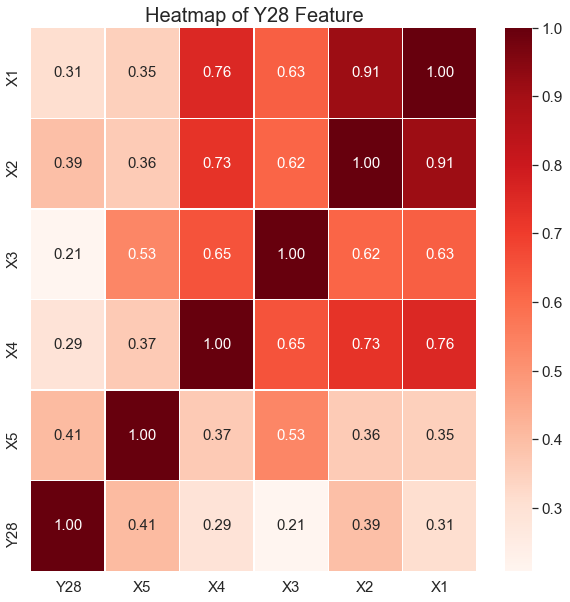

df29       X1   X2  X3  X4  X5  Y29
A1   226  219  36  22  11    0
A2   226  219  36  22  11    0
A3   226  219  36  22  11    0
A4   226  215  36  22  11    0
A5   226  215  36  22  11    0
..   ...  ...  ..  ..  ..  ...
F87  336  330  60  30  22    0
F88  336  330  60  29  21    0
F89  336  330  60  29  21    0
F90  277  264  46  22  14    0
F91  336  330  60  29  21    0

[91 rows x 6 columns]
corr29       X1   X2  X3  X4  X5  Y29
A1   226  219  36  22  11    0
A2   226  219  36  22  11    0
A3   226  219  36  22  11    0
A4   226  215  36  22  11    0
A5   226  215  36  22  11    0
..   ...  ...  ..  ..  ..  ...
F87  336  330  60  30  22    0
F88  336  330  60  29  21    0
F89  336  330  60  29  21    0
F90  277  264  46  22  14    0
F91  336  330  60  29  21    0

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


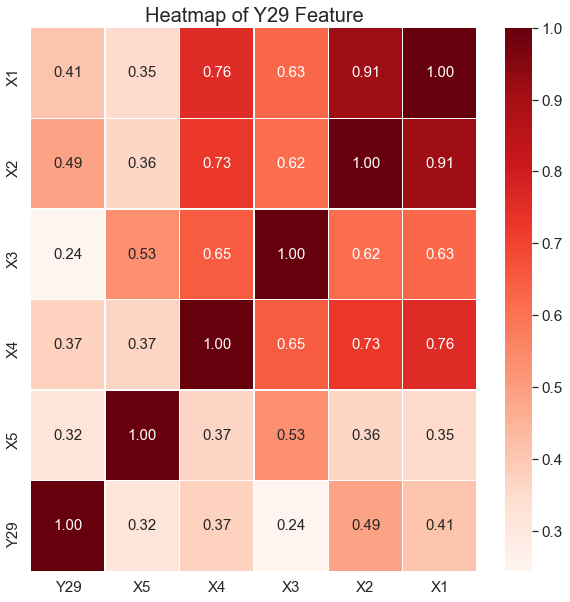

df30       X1   X2  X3  X4  X5  Y30
A1   226  219  36  22  11    0
A2   226  219  36  22  11    0
A3   226  219  36  22  11    0
A4   226  215  36  22  11    0
A5   226  215  36  22  11    0
..   ...  ...  ..  ..  ..  ...
F87  336  330  60  30  22    0
F88  336  330  60  29  21    0
F89  336  330  60  29  21    0
F90  277  264  46  22  14    0
F91  336  330  60  29  21    0

[91 rows x 6 columns]
corr30       X1   X2  X3  X4  X5  Y30
A1   226  219  36  22  11    0
A2   226  219  36  22  11    0
A3   226  219  36  22  11    0
A4   226  215  36  22  11    0
A5   226  215  36  22  11    0
..   ...  ...  ..  ..  ..  ...
F87  336  330  60  30  22    0
F88  336  330  60  29  21    0
F89  336  330  60  29  21    0
F90  277  264  46  22  14    0
F91  336  330  60  29  21    0

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


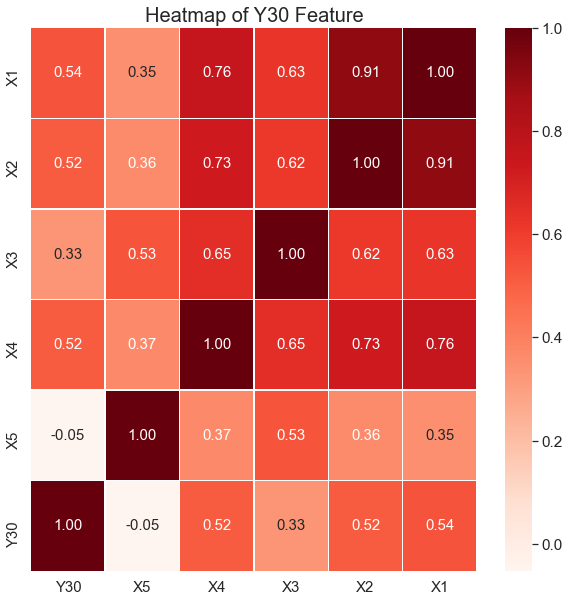

df31       X1   X2  X3  X4  X5  Y31
A1   226  219  36  22  11    0
A2   226  219  36  22  11    0
A3   226  219  36  22  11    0
A4   226  215  36  22  11    0
A5   226  215  36  22  11    0
..   ...  ...  ..  ..  ..  ...
F87  336  330  60  30  22    0
F88  336  330  60  29  21    0
F89  336  330  60  29  21    0
F90  277  264  46  22  14    0
F91  336  330  60  29  21    0

[91 rows x 6 columns]
corr31       X1   X2  X3  X4  X5  Y31
A1   226  219  36  22  11    0
A2   226  219  36  22  11    0
A3   226  219  36  22  11    0
A4   226  215  36  22  11    0
A5   226  215  36  22  11    0
..   ...  ...  ..  ..  ..  ...
F87  336  330  60  30  22    0
F88  336  330  60  29  21    0
F89  336  330  60  29  21    0
F90  277  264  46  22  14    0
F91  336  330  60  29  21    0

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


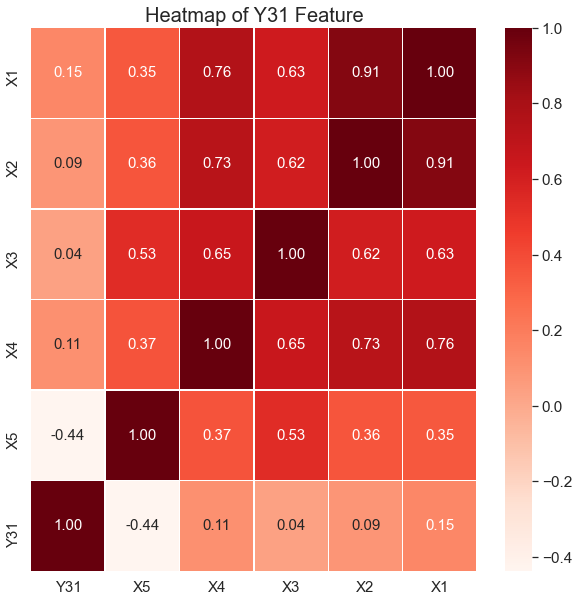

df32       X1   X2  X3  X4  X5    Y32
A1   226  219  36  22  11      0
A2   226  219  36  22  11      0
A3   226  219  36  22  11      0
A4   226  215  36  22  11      0
A5   226  215  36  22  11      0
..   ...  ...  ..  ..  ..    ...
F87  336  330  60  30  22  11366
F88  336  330  60  29  21  11445
F89  336  330  60  29  21  11445
F90  277  264  46  22  14   9727
F91  336  330  60  29  21  12031

[91 rows x 6 columns]
corr32       X1   X2  X3  X4  X5    Y32
A1   226  219  36  22  11      0
A2   226  219  36  22  11      0
A3   226  219  36  22  11      0
A4   226  215  36  22  11      0
A5   226  215  36  22  11      0
..   ...  ...  ..  ..  ..    ...
F87  336  330  60  30  22  11366
F88  336  330  60  29  21  11445
F89  336  330  60  29  21  11445
F90  277  264  46  22  14   9727
F91  336  330  60  29  21  12031

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


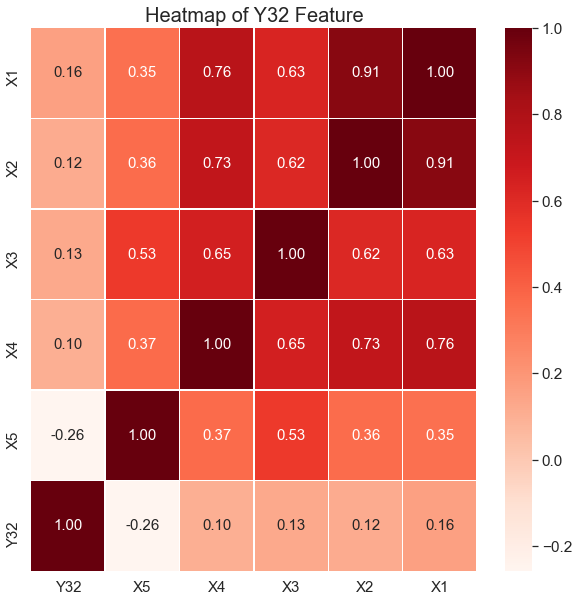

df33       X1   X2  X3  X4  X5     Y33
A1   226  219  36  22  11       0
A2   226  219  36  22  11       0
A3   226  219  36  22  11       0
A4   226  215  36  22  11       0
A5   226  215  36  22  11       0
..   ...  ...  ..  ..  ..     ...
F87  336  330  60  30  22  125897
F88  336  330  60  29  21  119718
F89  336  330  60  29  21  119718
F90  277  264  46  22  14   38615
F91  336  330  60  29  21  120105

[91 rows x 6 columns]
corr33       X1   X2  X3  X4  X5     Y33
A1   226  219  36  22  11       0
A2   226  219  36  22  11       0
A3   226  219  36  22  11       0
A4   226  215  36  22  11       0
A5   226  215  36  22  11       0
..   ...  ...  ..  ..  ..     ...
F87  336  330  60  30  22  125897
F88  336  330  60  29  21  119718
F89  336  330  60  29  21  119718
F90  277  264  46  22  14   38615
F91  336  330  60  29  21  120105

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


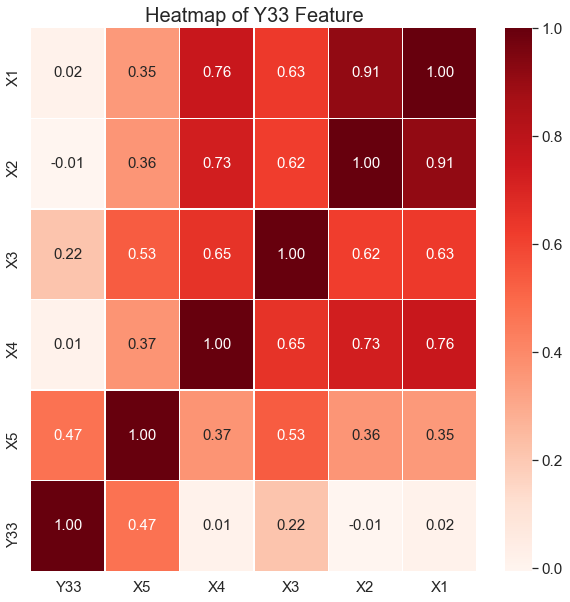

df34       X1   X2  X3  X4  X5    Y34
A1   226  219  36  22  11      0
A2   226  219  36  22  11      0
A3   226  219  36  22  11      0
A4   226  215  36  22  11      0
A5   226  215  36  22  11      0
..   ...  ...  ..  ..  ..    ...
F87  336  330  60  30  22  53022
F88  336  330  60  29  21  52390
F89  336  330  60  29  21  52390
F90  277  264  46  22  14  33711
F91  336  330  60  29  21  51456

[91 rows x 6 columns]
corr34       X1   X2  X3  X4  X5    Y34
A1   226  219  36  22  11      0
A2   226  219  36  22  11      0
A3   226  219  36  22  11      0
A4   226  215  36  22  11      0
A5   226  215  36  22  11      0
..   ...  ...  ..  ..  ..    ...
F87  336  330  60  30  22  53022
F88  336  330  60  29  21  52390
F89  336  330  60  29  21  52390
F90  277  264  46  22  14  33711
F91  336  330  60  29  21  51456

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


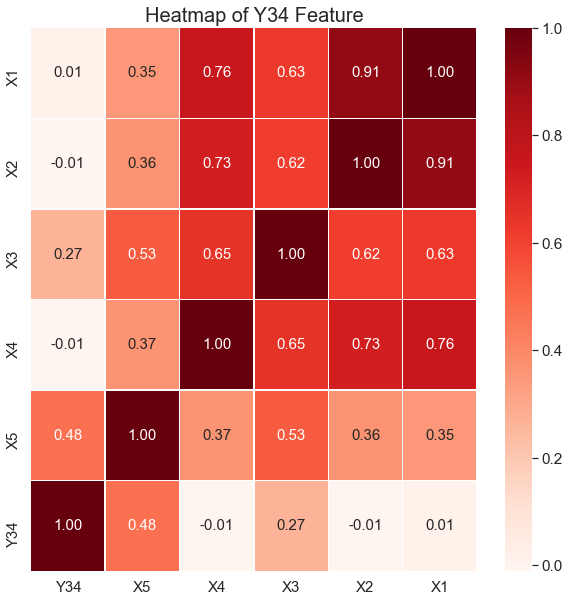

df35       X1   X2  X3  X4  X5    Y35
A1   226  219  36  22  11  81268
A2   226  219  36  22  11  80678
A3   226  219  36  22  11  81726
A4   226  215  36  22  11  83166
A5   226  215  36  22  11  82911
..   ...  ...  ..  ..  ..    ...
F87  336  330  60  30  22      0
F88  336  330  60  29  21      0
F89  336  330  60  29  21      0
F90  277  264  46  22  14      0
F91  336  330  60  29  21      0

[91 rows x 6 columns]
corr35       X1   X2  X3  X4  X5    Y35
A1   226  219  36  22  11  81268
A2   226  219  36  22  11  80678
A3   226  219  36  22  11  81726
A4   226  215  36  22  11  83166
A5   226  215  36  22  11  82911
..   ...  ...  ..  ..  ..    ...
F87  336  330  60  30  22      0
F88  336  330  60  29  21      0
F89  336  330  60  29  21      0
F90  277  264  46  22  14      0
F91  336  330  60  29  21      0

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


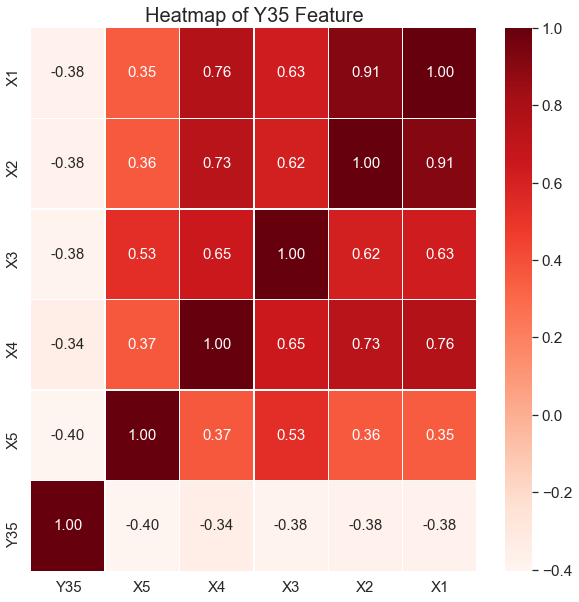

df36       X1   X2  X3  X4  X5    Y36
A1   226  219  36  22  11  19867
A2   226  219  36  22  11  19714
A3   226  219  36  22  11  19713
A4   226  215  36  22  11  18703
A5   226  215  36  22  11  18736
..   ...  ...  ..  ..  ..    ...
F87  336  330  60  30  22      0
F88  336  330  60  29  21      0
F89  336  330  60  29  21      0
F90  277  264  46  22  14      0
F91  336  330  60  29  21      0

[91 rows x 6 columns]
corr36       X1   X2  X3  X4  X5    Y36
A1   226  219  36  22  11  19867
A2   226  219  36  22  11  19714
A3   226  219  36  22  11  19713
A4   226  215  36  22  11  18703
A5   226  215  36  22  11  18736
..   ...  ...  ..  ..  ..    ...
F87  336  330  60  30  22      0
F88  336  330  60  29  21      0
F89  336  330  60  29  21      0
F90  277  264  46  22  14      0
F91  336  330  60  29  21      0

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


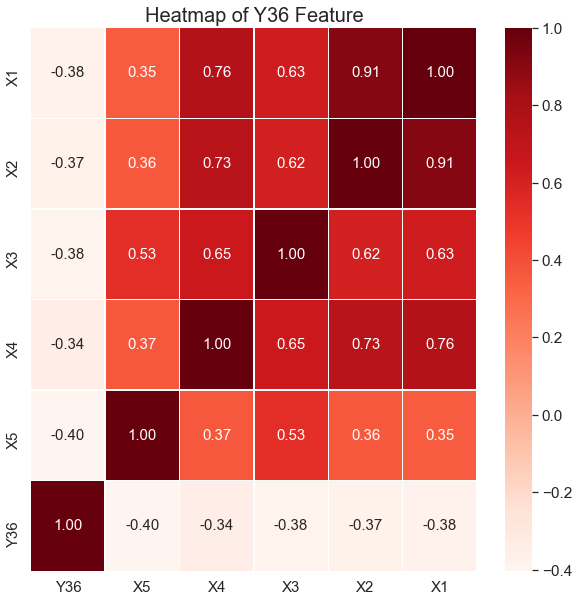

df37       X1   X2  X3  X4  X5   Y37
A1   226  219  36  22  11     0
A2   226  219  36  22  11     0
A3   226  219  36  22  11     0
A4   226  215  36  22  11     0
A5   226  215  36  22  11     0
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  5492
F88  336  330  60  29  21  5393
F89  336  330  60  29  21  5393
F90  277  264  46  22  14  5119
F91  336  330  60  29  21  5619

[91 rows x 6 columns]
corr37       X1   X2  X3  X4  X5   Y37
A1   226  219  36  22  11     0
A2   226  219  36  22  11     0
A3   226  219  36  22  11     0
A4   226  215  36  22  11     0
A5   226  215  36  22  11     0
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  5492
F88  336  330  60  29  21  5393
F89  336  330  60  29  21  5393
F90  277  264  46  22  14  5119
F91  336  330  60  29  21  5619

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


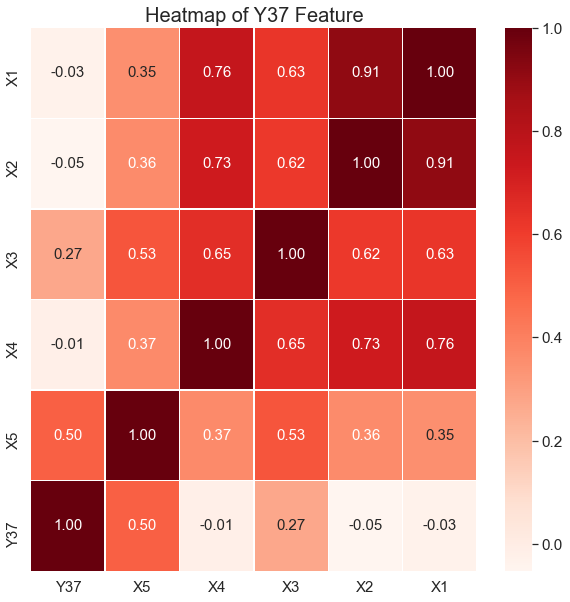

df38       X1   X2  X3  X4  X5     Y38
A1   226  219  36  22  11   54871
A2   226  219  36  22  11   56709
A3   226  219  36  22  11   56769
A4   226  215  36  22  11   59057
A5   226  215  36  22  11   58867
..   ...  ...  ..  ..  ..     ...
F87  336  330  60  30  22  199331
F88  336  330  60  29  21  194437
F89  336  330  60  29  21  194764
F90  277  264  46  22  14  107234
F91  336  330  60  29  21  193776

[91 rows x 6 columns]
corr38       X1   X2  X3  X4  X5     Y38
A1   226  219  36  22  11   54871
A2   226  219  36  22  11   56709
A3   226  219  36  22  11   56769
A4   226  215  36  22  11   59057
A5   226  215  36  22  11   58867
..   ...  ...  ..  ..  ..     ...
F87  336  330  60  30  22  199331
F88  336  330  60  29  21  194437
F89  336  330  60  29  21  194764
F90  277  264  46  22  14  107234
F91  336  330  60  29  21  193776

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


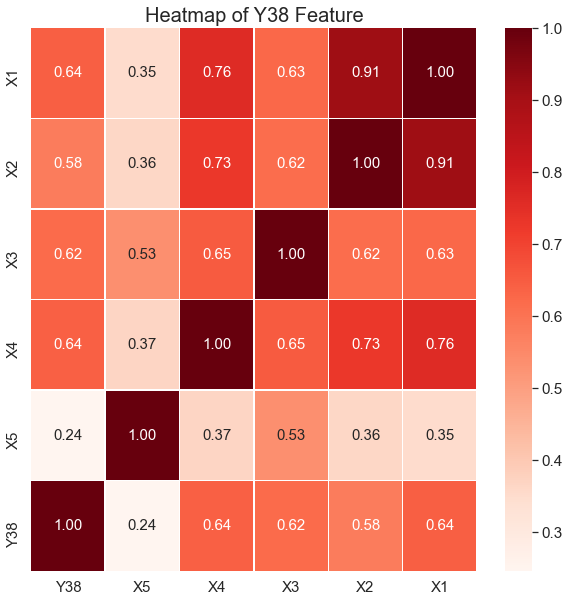

df39       X1   X2  X3  X4  X5    Y39
A1   226  219  36  22  11   6583
A2   226  219  36  22  11   6852
A3   226  219  36  22  11   6766
A4   226  215  36  22  11   7073
A5   226  215  36  22  11   7085
..   ...  ...  ..  ..  ..    ...
F87  336  330  60  30  22  13927
F88  336  330  60  29  21  11368
F89  336  330  60  29  21  11370
F90  277  264  46  22  14  16009
F91  336  330  60  29  21  12930

[91 rows x 6 columns]
corr39       X1   X2  X3  X4  X5    Y39
A1   226  219  36  22  11   6583
A2   226  219  36  22  11   6852
A3   226  219  36  22  11   6766
A4   226  215  36  22  11   7073
A5   226  215  36  22  11   7085
..   ...  ...  ..  ..  ..    ...
F87  336  330  60  30  22  13927
F88  336  330  60  29  21  11368
F89  336  330  60  29  21  11370
F90  277  264  46  22  14  16009
F91  336  330  60  29  21  12930

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


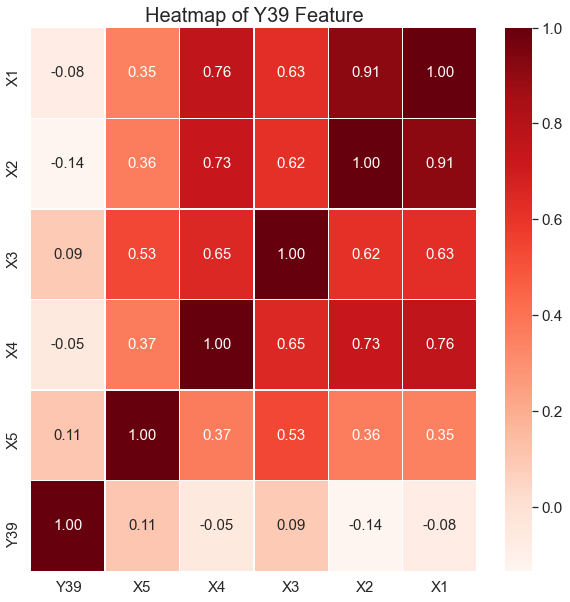

df40       X1   X2  X3  X4  X5   Y40
A1   226  219  36  22  11  3629
A2   226  219  36  22  11  3664
A3   226  219  36  22  11  3274
A4   226  215  36  22  11  4426
A5   226  215  36  22  11  4381
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22     0
F88  336  330  60  29  21     0
F89  336  330  60  29  21     0
F90  277  264  46  22  14     0
F91  336  330  60  29  21     0

[91 rows x 6 columns]
corr40       X1   X2  X3  X4  X5   Y40
A1   226  219  36  22  11  3629
A2   226  219  36  22  11  3664
A3   226  219  36  22  11  3274
A4   226  215  36  22  11  4426
A5   226  215  36  22  11  4381
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22     0
F88  336  330  60  29  21     0
F89  336  330  60  29  21     0
F90  277  264  46  22  14     0
F91  336  330  60  29  21     0

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


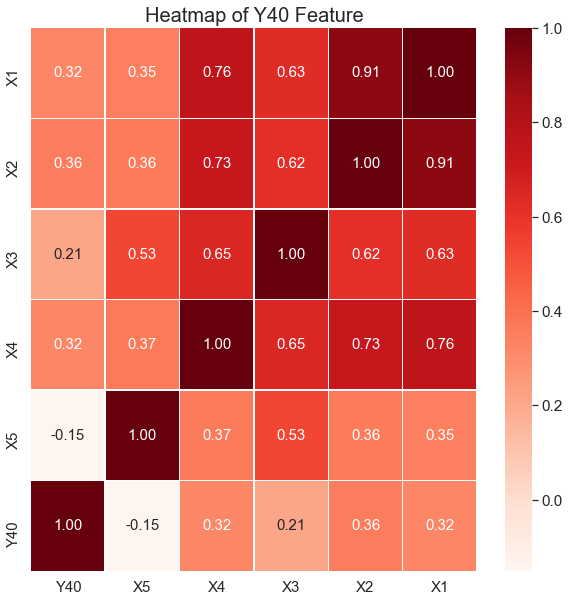

df41       X1   X2  X3  X4  X5   Y41
A1   226  219  36  22  11   768
A2   226  219  36  22  11   702
A3   226  219  36  22  11   759
A4   226  215  36  22  11  1132
A5   226  215  36  22  11   257
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  1918
F88  336  330  60  29  21  3724
F89  336  330  60  29  21  3724
F90  277  264  46  22  14  3231
F91  336  330  60  29  21  3935

[91 rows x 6 columns]
corr41       X1   X2  X3  X4  X5   Y41
A1   226  219  36  22  11   768
A2   226  219  36  22  11   702
A3   226  219  36  22  11   759
A4   226  215  36  22  11  1132
A5   226  215  36  22  11   257
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  1918
F88  336  330  60  29  21  3724
F89  336  330  60  29  21  3724
F90  277  264  46  22  14  3231
F91  336  330  60  29  21  3935

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


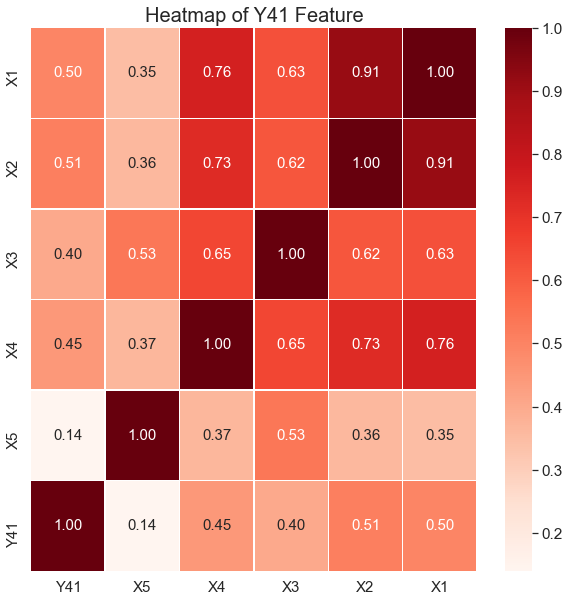

df42       X1   X2  X3  X4  X5    Y42
A1   226  219  36  22  11   6944
A2   226  219  36  22  11   7836
A3   226  219  36  22  11   6412
A4   226  215  36  22  11   4047
A5   226  215  36  22  11   7272
..   ...  ...  ..  ..  ..    ...
F87  336  330  60  30  22  23167
F88  336  330  60  29  21  20921
F89  336  330  60  29  21  20933
F90  277  264  46  22  14  13364
F91  336  330  60  29  21  20634

[91 rows x 6 columns]
corr42       X1   X2  X3  X4  X5    Y42
A1   226  219  36  22  11   6944
A2   226  219  36  22  11   7836
A3   226  219  36  22  11   6412
A4   226  215  36  22  11   4047
A5   226  215  36  22  11   7272
..   ...  ...  ..  ..  ..    ...
F87  336  330  60  30  22  23167
F88  336  330  60  29  21  20921
F89  336  330  60  29  21  20933
F90  277  264  46  22  14  13364
F91  336  330  60  29  21  20634

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


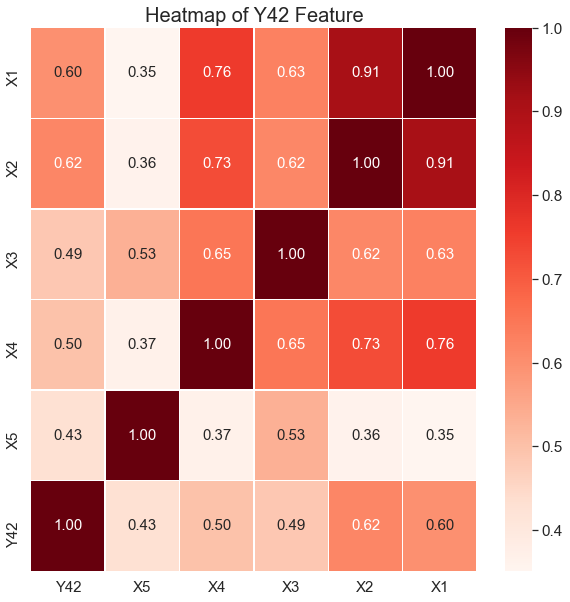

df43       X1   X2  X3  X4  X5  Y43
A1   226  219  36  22  11    0
A2   226  219  36  22  11    0
A3   226  219  36  22  11    0
A4   226  215  36  22  11    0
A5   226  215  36  22  11    0
..   ...  ...  ..  ..  ..  ...
F87  336  330  60  30  22    0
F88  336  330  60  29  21    0
F89  336  330  60  29  21    0
F90  277  264  46  22  14    0
F91  336  330  60  29  21    0

[91 rows x 6 columns]
corr43       X1   X2  X3  X4  X5  Y43
A1   226  219  36  22  11    0
A2   226  219  36  22  11    0
A3   226  219  36  22  11    0
A4   226  215  36  22  11    0
A5   226  215  36  22  11    0
..   ...  ...  ..  ..  ..  ...
F87  336  330  60  30  22    0
F88  336  330  60  29  21    0
F89  336  330  60  29  21    0
F90  277  264  46  22  14    0
F91  336  330  60  29  21    0

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


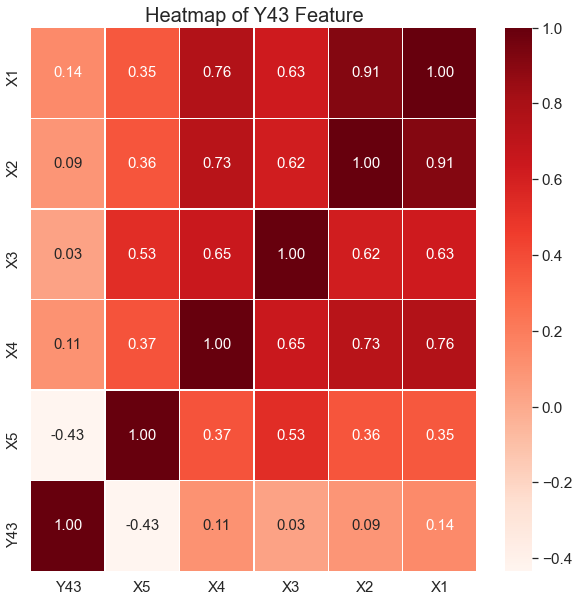

df44       X1   X2  X3  X4  X5  Y44
A1   226  219  36  22  11    0
A2   226  219  36  22  11    0
A3   226  219  36  22  11  300
A4   226  215  36  22  11    0
A5   226  215  36  22  11    0
..   ...  ...  ..  ..  ..  ...
F87  336  330  60  30  22  443
F88  336  330  60  29  21  241
F89  336  330  60  29  21  241
F90  277  264  46  22  14    0
F91  336  330  60  29  21  175

[91 rows x 6 columns]
corr44       X1   X2  X3  X4  X5  Y44
A1   226  219  36  22  11    0
A2   226  219  36  22  11    0
A3   226  219  36  22  11  300
A4   226  215  36  22  11    0
A5   226  215  36  22  11    0
..   ...  ...  ..  ..  ..  ...
F87  336  330  60  30  22  443
F88  336  330  60  29  21  241
F89  336  330  60  29  21  241
F90  277  264  46  22  14    0
F91  336  330  60  29  21  175

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


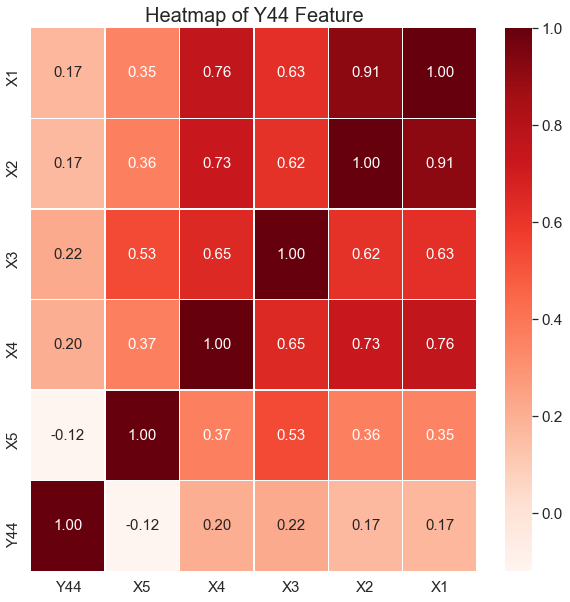

df45       X1   X2  X3  X4  X5   Y45
A1   226  219  36  22  11   652
A2   226  219  36  22  11   636
A3   226  219  36  22  11   705
A4   226  215  36  22  11   610
A5   226  215  36  22  11   574
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  1060
F88  336  330  60  29  21   974
F89  336  330  60  29  21   974
F90  277  264  46  22  14   882
F91  336  330  60  29  21   990

[91 rows x 6 columns]
corr45       X1   X2  X3  X4  X5   Y45
A1   226  219  36  22  11   652
A2   226  219  36  22  11   636
A3   226  219  36  22  11   705
A4   226  215  36  22  11   610
A5   226  215  36  22  11   574
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  1060
F88  336  330  60  29  21   974
F89  336  330  60  29  21   974
F90  277  264  46  22  14   882
F91  336  330  60  29  21   990

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


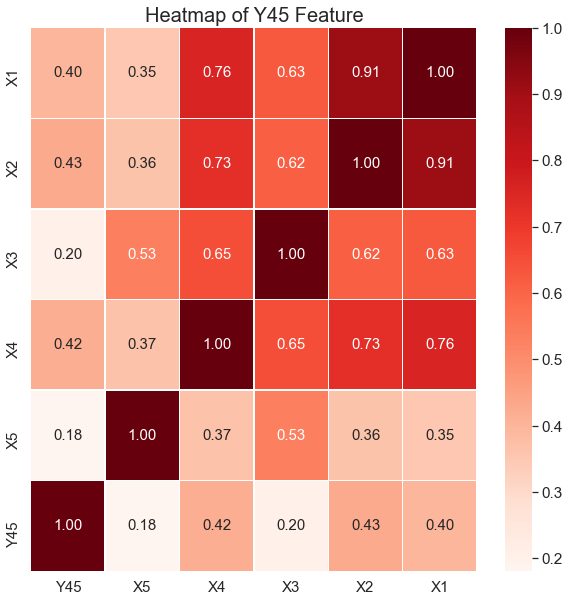

df46       X1   X2  X3  X4  X5    Y46
A1   226  219  36  22  11   6789
A2   226  219  36  22  11   6766
A3   226  219  36  22  11   5099
A4   226  215  36  22  11   9532
A5   226  215  36  22  11   7681
..   ...  ...  ..  ..  ..    ...
F87  336  330  60  30  22  12397
F88  336  330  60  29  21  10114
F89  336  330  60  29  21  10115
F90  277  264  46  22  14   6679
F91  336  330  60  29  21   9575

[91 rows x 6 columns]
corr46       X1   X2  X3  X4  X5    Y46
A1   226  219  36  22  11   6789
A2   226  219  36  22  11   6766
A3   226  219  36  22  11   5099
A4   226  215  36  22  11   9532
A5   226  215  36  22  11   7681
..   ...  ...  ..  ..  ..    ...
F87  336  330  60  30  22  12397
F88  336  330  60  29  21  10114
F89  336  330  60  29  21  10115
F90  277  264  46  22  14   6679
F91  336  330  60  29  21   9575

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


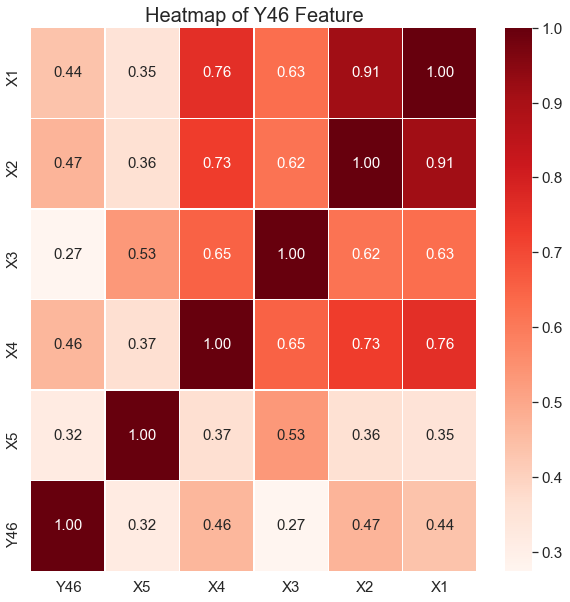

df47       X1   X2  X3  X4  X5   Y47
A1   226  219  36  22  11   522
A2   226  219  36  22  11   381
A3   226  219  36  22  11  1473
A4   226  215  36  22  11   602
A5   226  215  36  22  11   565
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  1038
F88  336  330  60  29  21   326
F89  336  330  60  29  21   326
F90  277  264  46  22  14   793
F91  336  330  60  29  21   368

[91 rows x 6 columns]
corr47       X1   X2  X3  X4  X5   Y47
A1   226  219  36  22  11   522
A2   226  219  36  22  11   381
A3   226  219  36  22  11  1473
A4   226  215  36  22  11   602
A5   226  215  36  22  11   565
..   ...  ...  ..  ..  ..   ...
F87  336  330  60  30  22  1038
F88  336  330  60  29  21   326
F89  336  330  60  29  21   326
F90  277  264  46  22  14   793
F91  336  330  60  29  21   368

[91 rows x 6 columns]
(array([], dtype=int64), array([], dtype=int64))


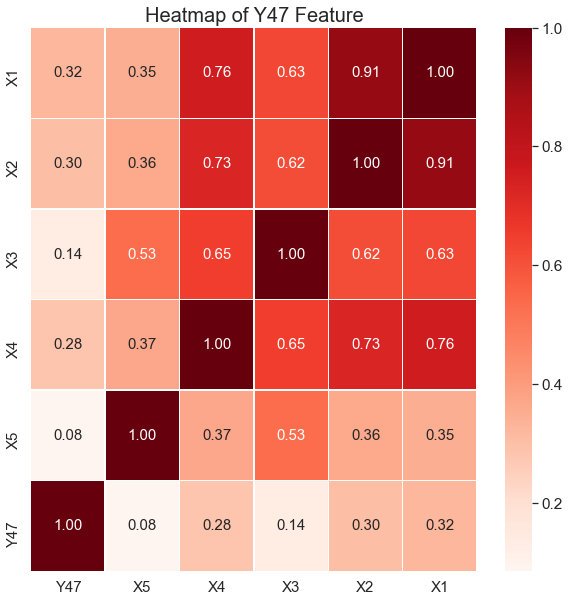

In [368]:
for i in range(1, y.shape[1]+1):
    df = pd.concat([X,y['Y' + str(i)]], axis=1)
    df['Y' + str(i)] = pd.to_numeric(df['Y' + str(i)])
    
    plt.figure(figsize=(10,10))
    
    print('df' + str(i), df)
    correlation = df.corr(method='kendall')
#     correlation = np.corrcoef(df, rowvar = False)
    print('corr' + str(i), df)
    print(np.where(np.isnan(correlation)))
    
    sns.set(font_scale=1.4)
    res = sns.heatmap(correlation, 
                annot=True, 
                cmap=plt.cm.Reds, 
                linewidths=.5, 
                fmt='.2f',
                annot_kws={"size": 15})
    plt.title('Heatmap of ' 'Y' + str(i) + ' Feature', fontsize=20)
    
    res.invert_xaxis()
    res.set_xticklabels(res.get_xmajorticklabels(), fontsize=15)
    res.set_yticklabels(res.get_ymajorticklabels(), fontsize=15)
    plt.savefig('y_heatmap' + os.sep + 'Y' + str(i) + '.png')
    plt.show()